In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_vor = pd.read_csv('Crime_analysis_victims_of_rape.csv')

In [ ]:
r,c = df_vor.shape
print('Number of rows : ',r,'\nNumber of columns : ',c)

Number of rows :  1050 
Number of columns :  11


In [ ]:
cols = df_vor.columns
cols

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Upto_10_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Above_50_Yrs',
       'Victims_of_Rape_Total'],
      dtype='object')

In [ ]:
df_vor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Upto_10_Yrs        1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_Above_50_Yrs       1050 non-null   int64 
 10  Victims_of_Rape_Total      1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [ ]:
df_vor.head()

Area_Name  Year  ... Victims_Above_50_Yrs  Victims_of_Rape_Total
0  Andaman & Nicobar Islands  2001  ...                    0                      3
1  Andaman & Nicobar Islands  2001  ...                    0                      1
2  Andaman & Nicobar Islands  2001  ...                    0                      2
3  Andaman & Nicobar Islands  2002  ...                    0                      2
4  Andaman & Nicobar Islands  2002  ...                    0                      0

[5 rows x 11 columns]

In [ ]:
df_vor.tail()

Area_Name  Year  ... Victims_Above_50_Yrs  Victims_of_Rape_Total
1045  West Bengal  2009  ...                    0                      3
1046  West Bengal  2009  ...                    0                   2333
1047  West Bengal  2010  ...                    0                   2311
1048  West Bengal  2010  ...                    0                      4
1049  West Bengal  2010  ...                    0                   2307

[5 rows x 11 columns]

**DATA CLEANING**

In [ ]:
df_vor=df_vor.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [ ]:
df_vor.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Upto_10_Yrs          0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_Above_50_Yrs         0
Victims_of_Rape_Total        0
dtype: int64

In [ ]:
df_vor.loc[:,'Subgroup'].unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [ ]:
states = df_vor.loc[:,'Area_Name'].unique()
states

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [ ]:
n_states = len(states)
n_states

35

In [ ]:
year = df_vor.loc[:,'Year'].unique()
year

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [ ]:
n_year = len(year)
n_year

10

In [ ]:
df_vor.describe(include='all')

Area_Name        Year  ... Victims_Above_50_Yrs  Victims_of_Rape_Total
count          1050  1050.00000  ...          1050.000000            1050.000000
unique           35         NaN  ...                  NaN                    NaN
top     Daman & Diu         NaN  ...                  NaN                    NaN
freq             30         NaN  ...                  NaN                    NaN
mean            NaN  2005.50000  ...             1.866667             362.198095
std             NaN     2.87365  ...             4.640286             592.418089
min             NaN  2001.00000  ...             0.000000               0.000000
25%             NaN  2003.00000  ...             0.000000               4.000000
50%             NaN  2005.50000  ...             0.000000              37.000000
75%             NaN  2008.00000  ...             1.000000             531.500000
max             NaN  2010.00000  ...            43.000000            3136.000000

[11 rows x 11 columns]

**Exploratory Data analysis**

*Correlation*

In [ ]:
df_corr=df_vor.corr()
df_corr
#positive correlation - both the values increase together

Year  ...  Victims_of_Rape_Total
Year                       1.000000  ...               0.071121
Rape_Cases_Reported        0.070944  ...               0.999998
Victims_Upto_10_Yrs        0.066608  ...               0.666310
Victims_Between_10-14_Yrs  0.057081  ...               0.763069
Victims_Between_14-18_Yrs  0.060579  ...               0.780669
Victims_Between_18-30_Yrs  0.069109  ...               0.966303
Victims_Between_30-50_Yrs  0.053460  ...               0.925359
Victims_Above_50_Yrs       0.095368  ...               0.652482
Victims_of_Rape_Total      0.071121  ...               1.000000

[9 rows x 9 columns]

*Heat map*

Text(0.5, 1.0, 'Relationship between all kinds and age groups')

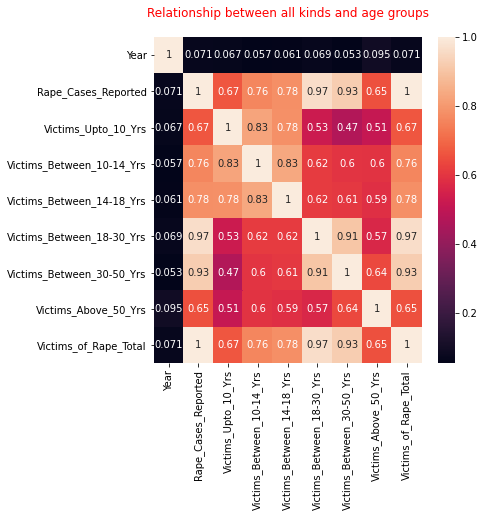

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values,annot=True)
plt.title('Relationship between all kinds and age groups',pad=20,color='red')

**Data visualisation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9869fc2d30>,
      dtype=object)

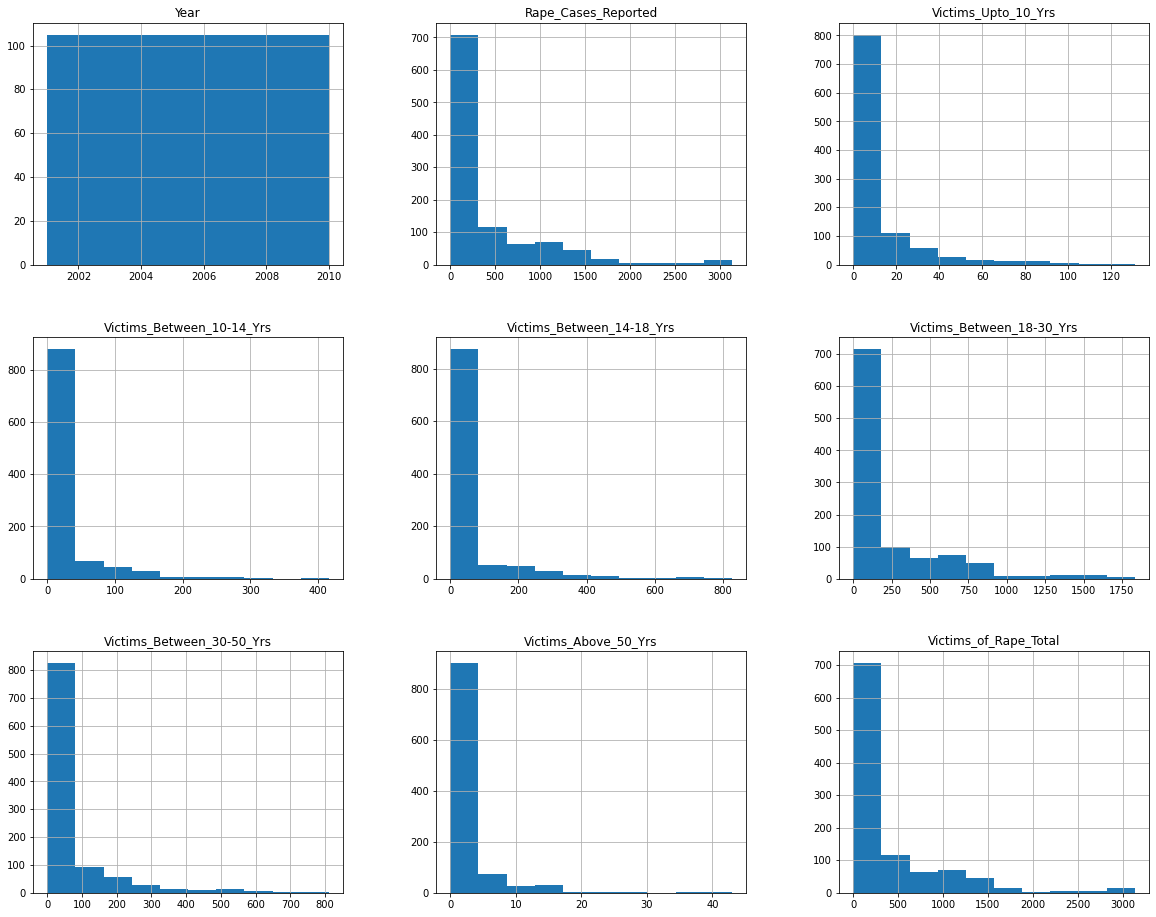

In [ ]:
df_vor.hist(figsize=(20,16))
#for eg : rape_cases_reported - 0 to 200 we have 700 values

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

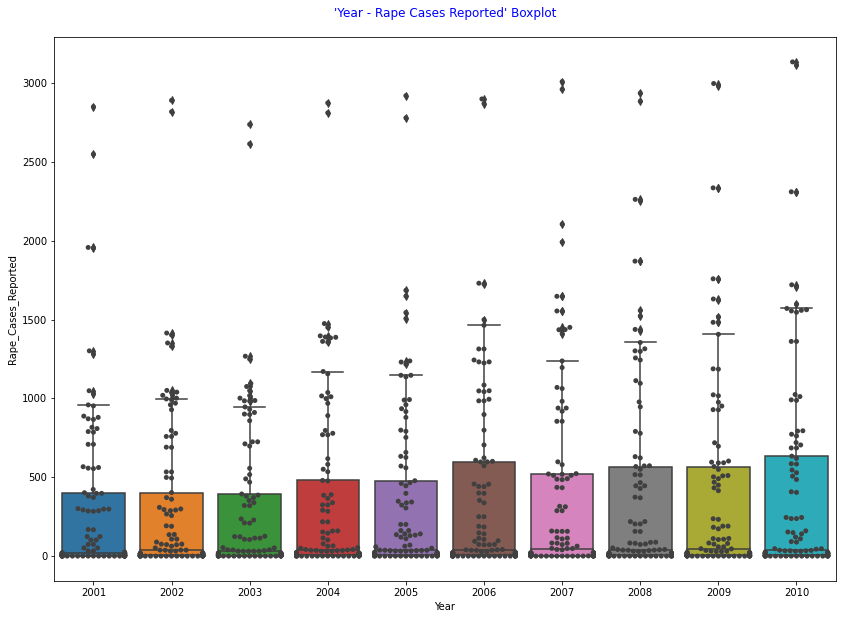

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Year - Rape Cases Reported' Boxplot",pad=20,color='blue')
sns.boxplot(x='Year',y='Rape_Cases_Reported',data=df_vor)
sns.swarmplot(x='Year',y='Rape_Cases_Reported',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

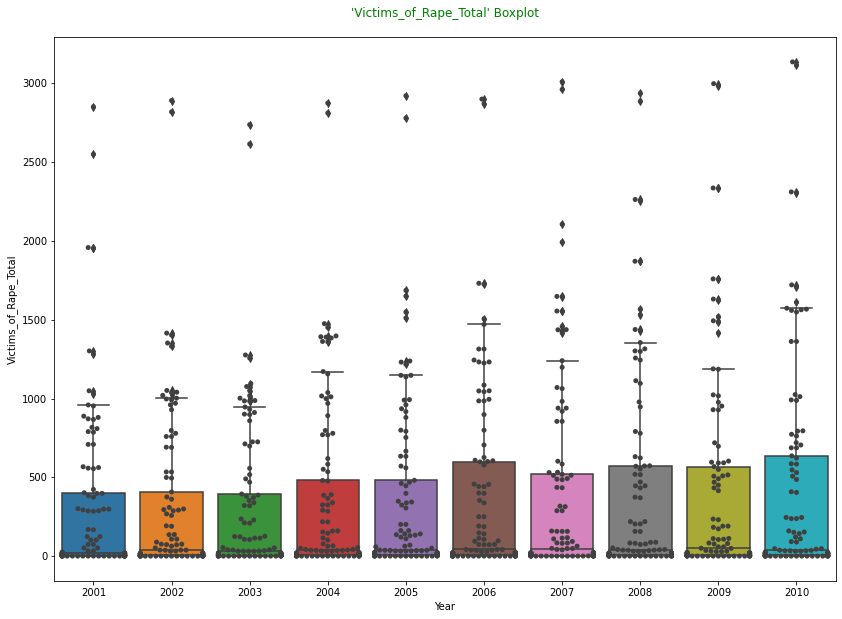

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_of_Rape_Total' Boxplot",pad=20,color='green')
sns.boxplot(x='Year',y='Victims_of_Rape_Total',data=df_vor)
sns.swarmplot(x='Year',y='Victims_of_Rape_Total',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

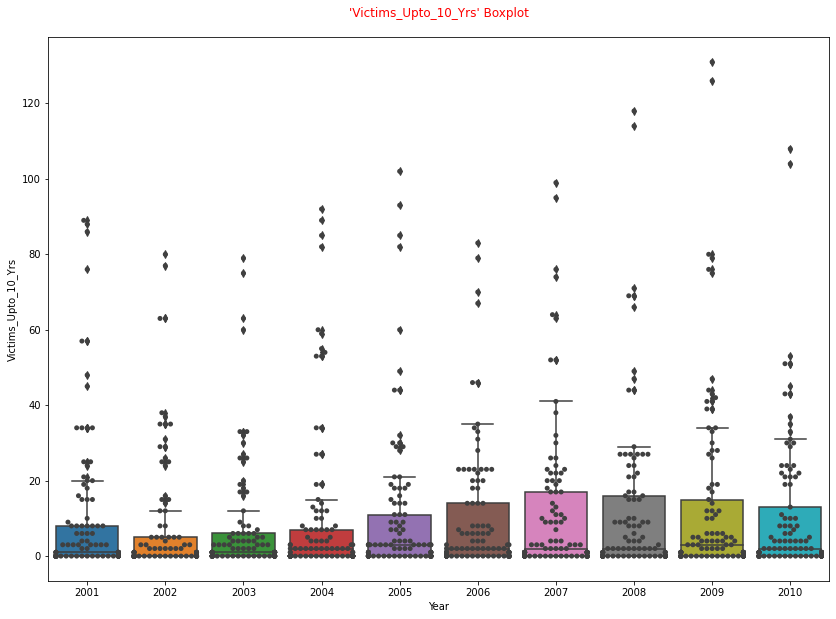

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Upto_10_Yrs' Boxplot",pad=20,color='red')
sns.boxplot(x='Year',y='Victims_Upto_10_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Upto_10_Yrs',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

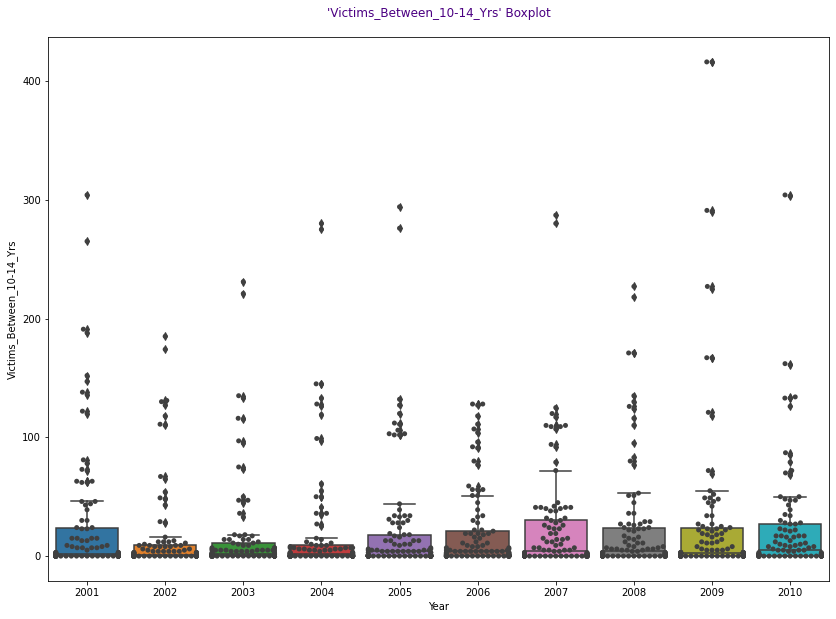

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Between_10-14_Yrs' Boxplot",pad=20,color='indigo')
sns.boxplot(x='Year',y='Victims_Between_10-14_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Between_10-14_Yrs',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

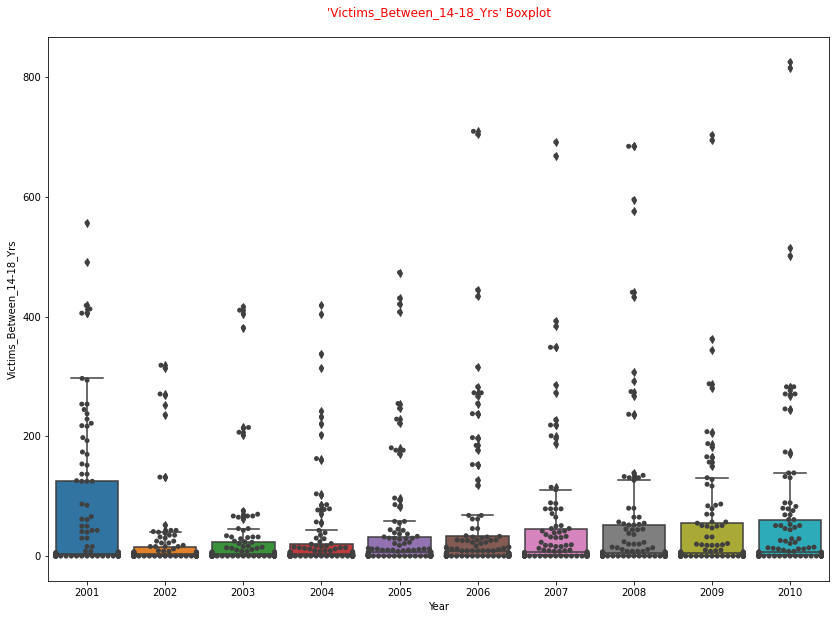

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Between_14-18_Yrs' Boxplot",pad=20,color='red')
sns.boxplot(x='Year',y='Victims_Between_14-18_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Between_14-18_Yrs',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

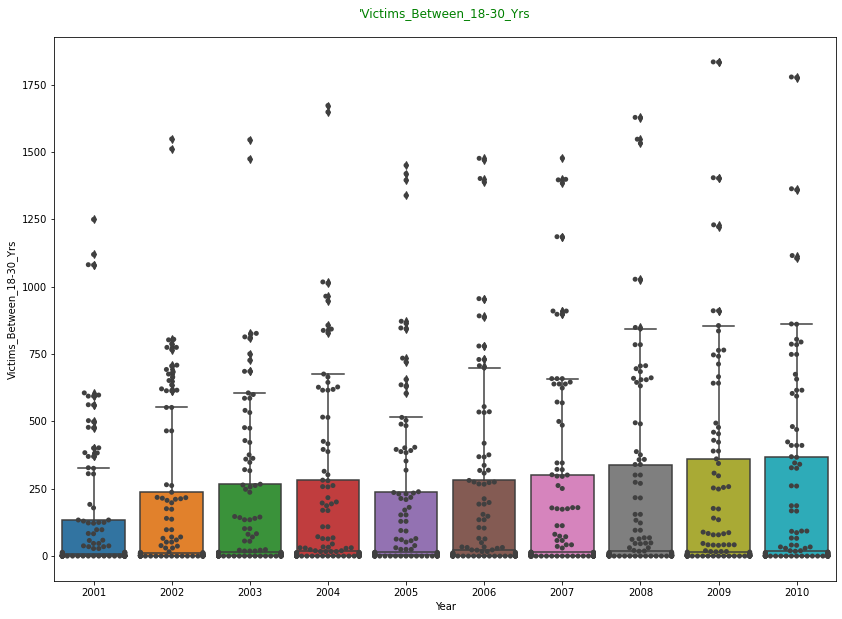

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Between_18-30_Yrs",pad=20,color='green')
sns.boxplot(x='Year',y='Victims_Between_18-30_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Between_18-30_Yrs',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



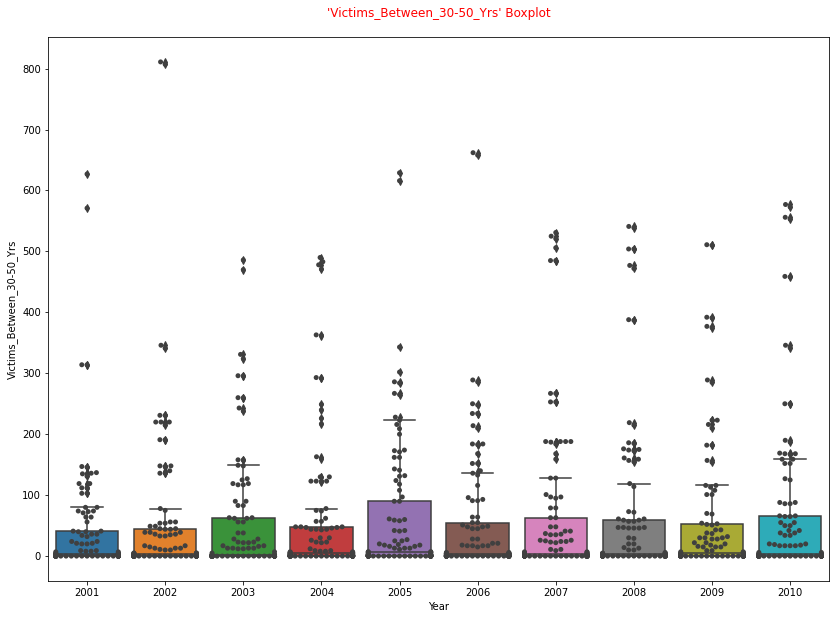

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Between_30-50_Yrs' Boxplot",pad=20,color='red')
sns.boxplot(x='Year',y='Victims_Between_30-50_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Between_30-50_Yrs',data=df_vor,color='.25')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

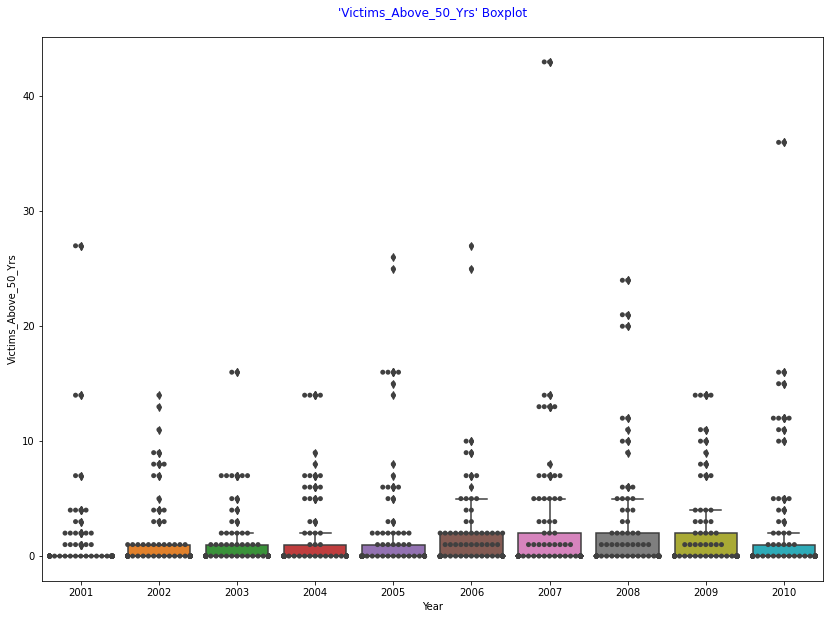

In [ ]:
plt.figure(figsize=(14,10))
plt.title("'Victims_Above_50_Yrs' Boxplot",pad=20,color='blue')
sns.boxplot(x='Year',y='Victims_Above_50_Yrs',data=df_vor)
sns.swarmplot(x='Year',y='Victims_Above_50_Yrs',data=df_vor,color='.25')

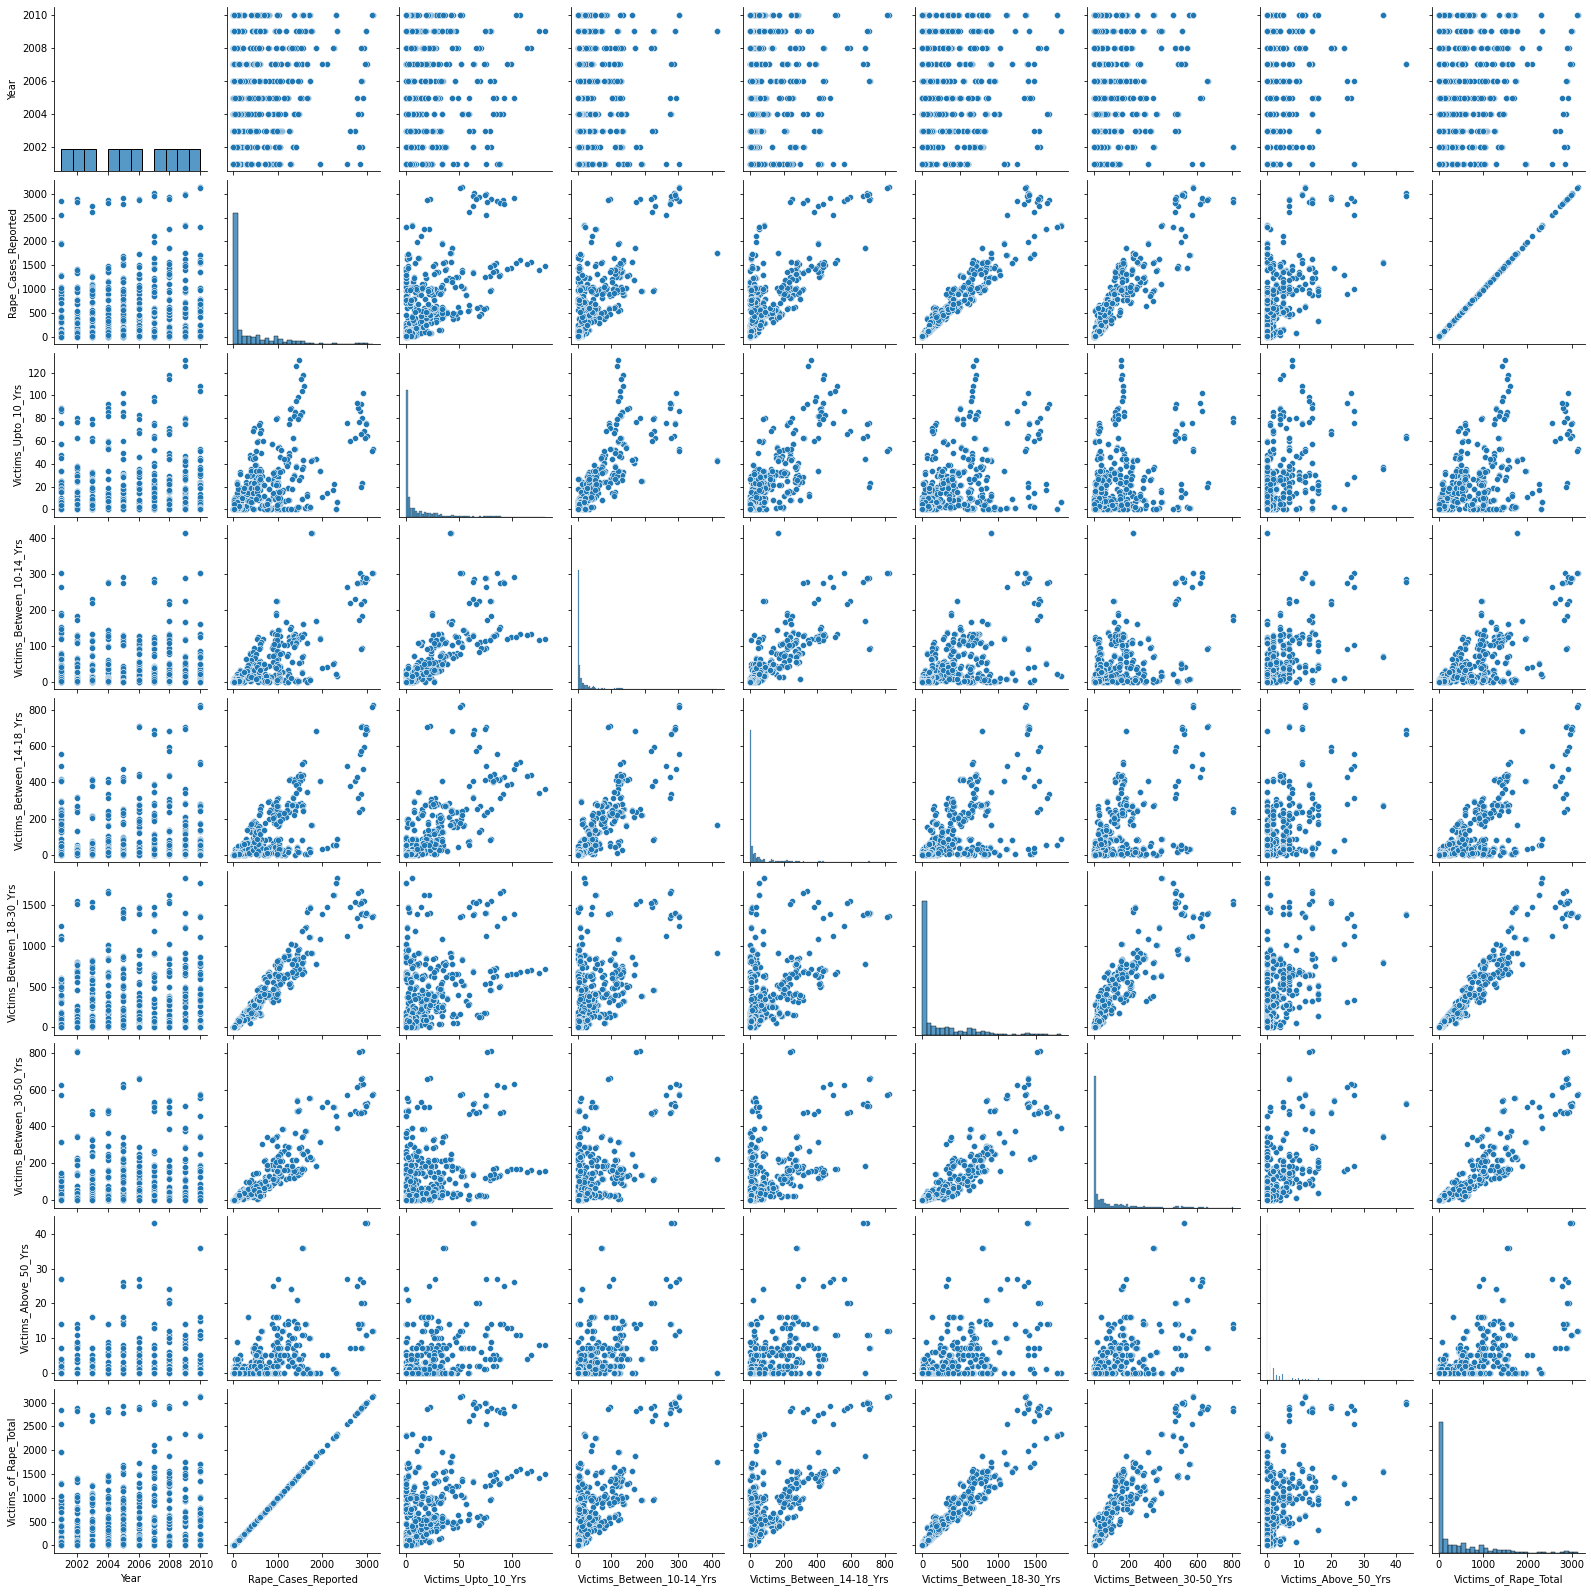

In [ ]:
sns.pairplot(df_vor)

In [ ]:
d1 =df_vor.groupby(['Year'])['Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs'].sum().reset_index()
d1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Year  ...  Victims_Between_30-50_Yrs
0  2001  ...                       4496
1  2002  ...                       5984
2  2003  ...                       5622
3  2004  ...                       6378
4  2005  ...                       6762
5  2006  ...                       6004
6  2007  ...                       7060
7  2008  ...                       7168
8  2009  ...                       6248
9  2010  ...                       7526

[10 rows x 6 columns]

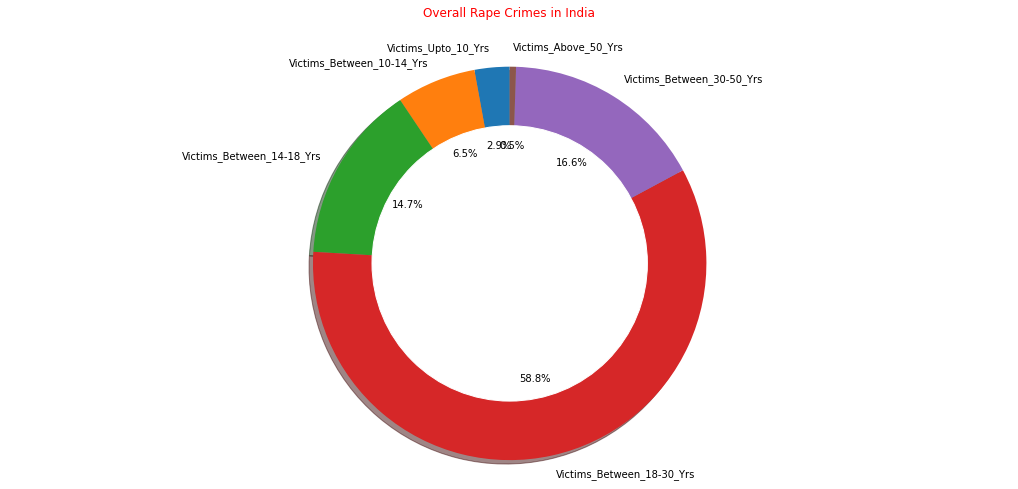

In [ ]:
label=['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs',
       'Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_Above_50_Yrs']
y=[df_vor['Victims_Upto_10_Yrs'].sum(),df_vor['Victims_Between_10-14_Yrs'].sum(),
   df_vor['Victims_Between_14-18_Yrs'].sum(),df_vor['Victims_Between_18-30_Yrs'].sum(),
   df_vor['Victims_Between_30-50_Yrs'].sum(),df_vor['Victims_Above_50_Yrs'].sum()]
fig1,ax1 = plt.subplots(figsize=(20,8))
ax1.pie(y,labels=label,autopct='%1.1f%%',
        startangle=90,shadow=True)
ax1.axis('equal')
ax1.set_title('Overall Rape Crimes in India',pad=30,color='Red')
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Text(0, 0.5, 'Total rape cases reported')

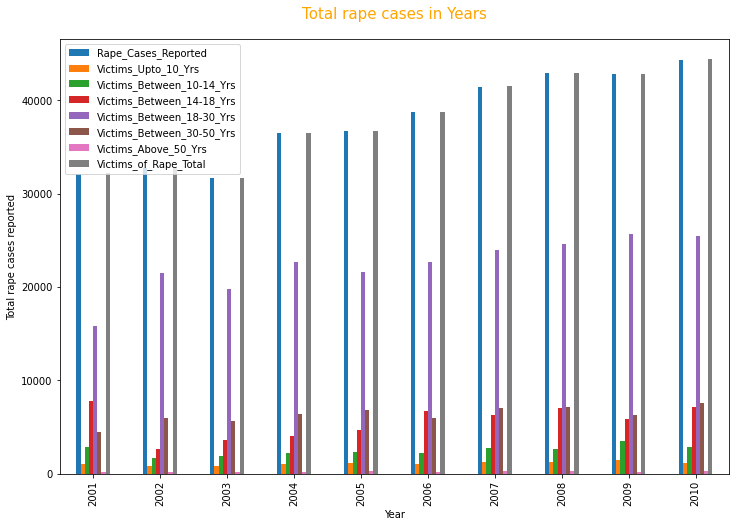

In [ ]:
#Total rape cases in years
#check ***

d1 = df_vor.groupby(['Year']).sum()
d1 = d1[0:10]
d1 = d1.plot.bar(figsize=(12,8))
plt.title('Total rape cases in Years',pad=20,color='orange',fontdict={'fontsize':15})
plt.ylabel('Total rape cases reported')

In [ ]:
total_rape = df_vor[df_vor['Subgroup'] == 'Total Rape Victims']

In [ ]:
plot_total_rape  = total_rape.drop_duplicates('Year', keep = 'first', inplace = False)

Text(0.5, 1.0, 'Minor vs Adults - Victims')

<Figure size 288x216 with 0 Axes>

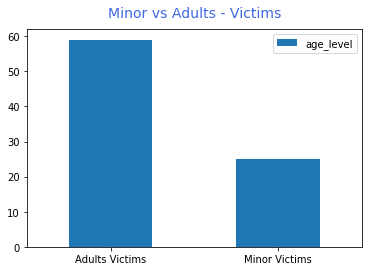

In [ ]:
total_rape_minor = plot_total_rape['Victims_Upto_10_Yrs'].sum() + plot_total_rape['Victims_Between_10-14_Yrs'].sum() +plot_total_rape['Victims_Between_14-18_Yrs'].sum()
total_rape_adults = plot_total_rape['Victims_Between_18-30_Yrs'].sum() + plot_total_rape['Victims_Between_30-50_Yrs'].sum() +plot_total_rape['Victims_Above_50_Yrs'].sum()

data = [total_rape_minor,total_rape_adults ] 
index =['Adults Victims', 'Minor Victims']
data_df = pd.DataFrame(data, columns = ['age_level'], index = index)
#print(data)
plt.figure(figsize=(4,3), edgecolor='black')
ax = data_df.plot.bar(rot=0)
plt.title("Minor vs Adults - Victims",color = 'royalblue',fontsize=14,pad=12)

In [ ]:
# Rape cases happenned year on year - Y-o-Y trend

y_o_y = df_vor.pivot_table(values='Victims_of_Rape_Total',index='Year',aggfunc='sum').reset_index()
y_o_y

Year  Victims_of_Rape_Total
0  2001                  32156
1  2002                  32756
2  2003                  31712
3  2004                  36478
4  2005                  36752
5  2006                  38730
6  2007                  41542
7  2008                  42970
8  2009                  42826
9  2010                  44386

*Trend*

Text(0.5, 1.0, 'Rape Victims - Year on Year')

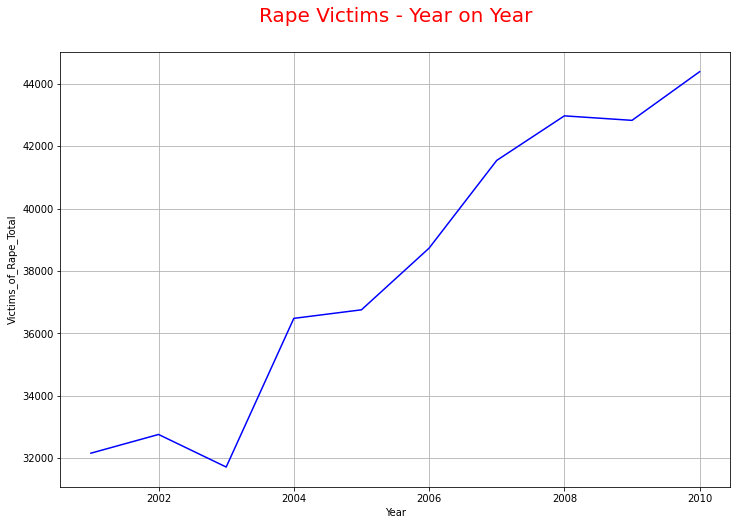

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Year', y = 'Victims_of_Rape_Total' , data = y_o_y, color = 'blue')
plt.grid(True)
plt.title("Rape Victims - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'red')

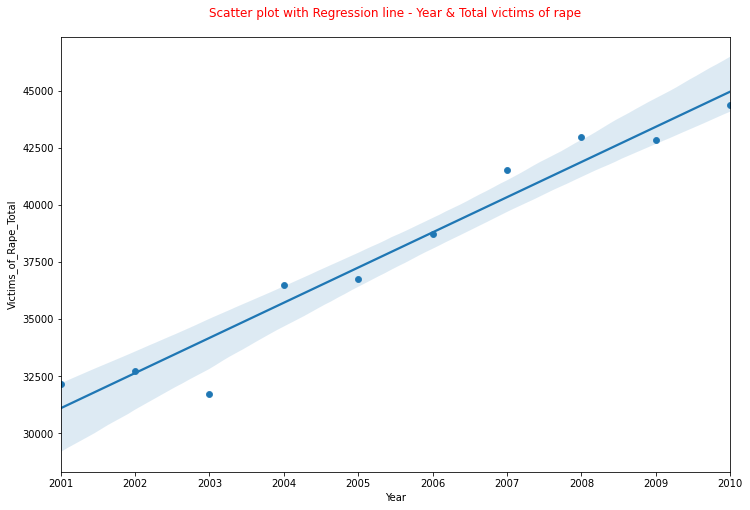

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Total victims of rape',pad=20,color='red')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_of_Rape_Total'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_of_Rape_Total'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Upto_10_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Upto 10 Years - Year on Year')

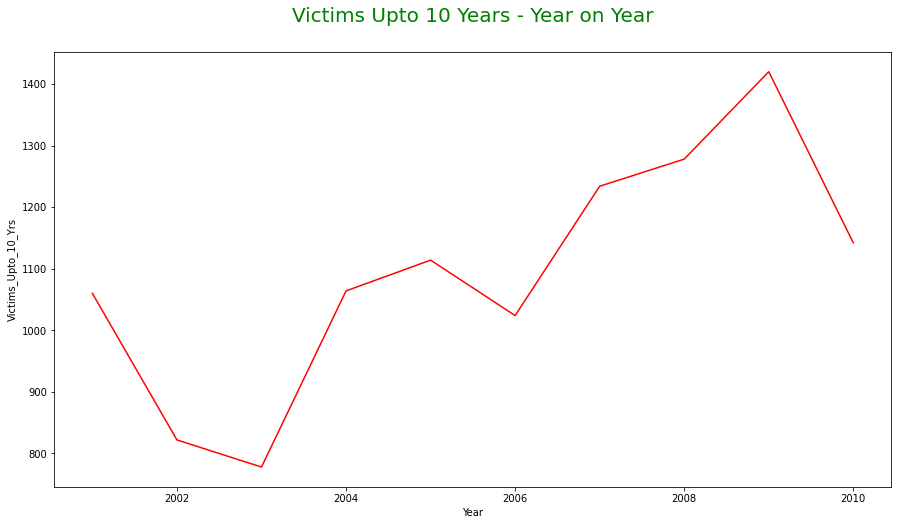

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Upto_10_Yrs' , data = y_o_y, color = 'red')
plt.title("Victims Upto 10 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'green')

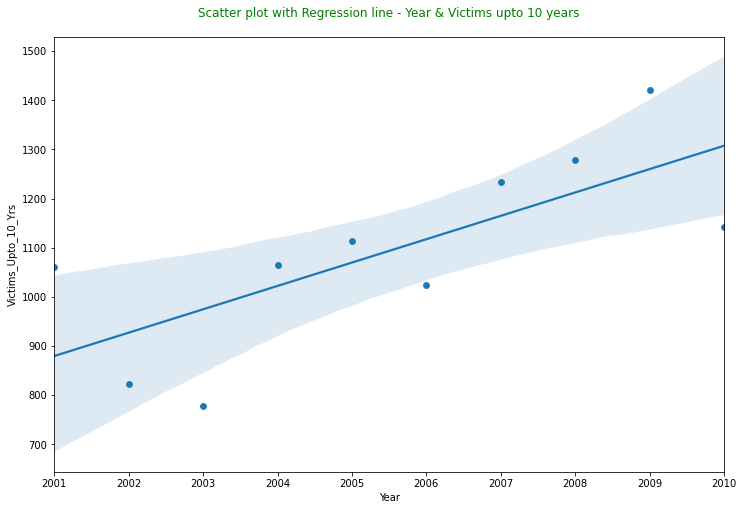

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims upto 10 years',pad=20,color='green')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Upto_10_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Upto_10_Yrs'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Between_10-14_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Between 10-14 Years - Year on Year')

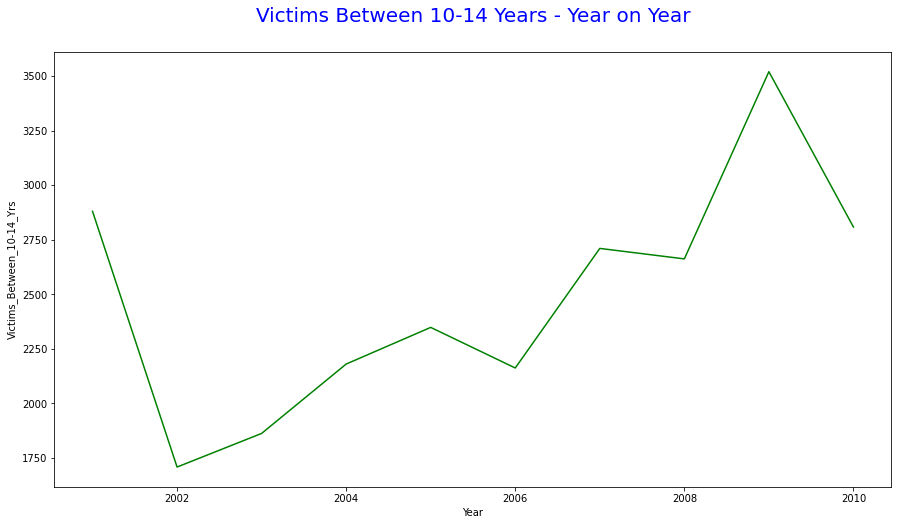

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Between_10-14_Yrs' , data = y_o_y, color = 'green')
plt.title("Victims Between 10-14 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'blue')

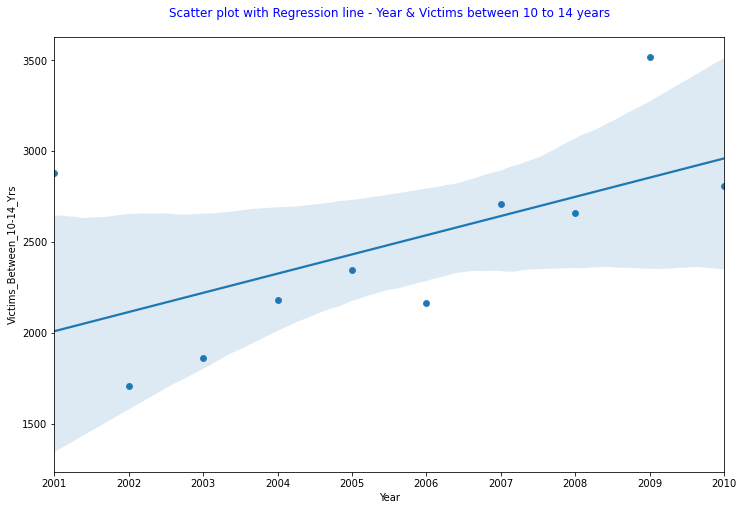

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims between 10 to 14 years',pad=20,color='blue')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_10-14_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_10-14_Yrs'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Between_14-18_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Between 14-18 Years - Year on Year')

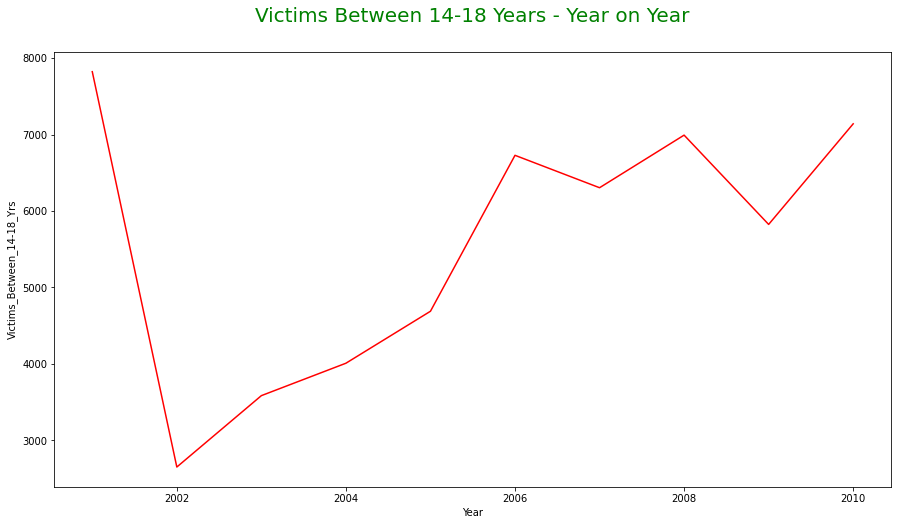

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Between_14-18_Yrs' , data = y_o_y, color = 'red')
plt.title("Victims Between 14-18 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'green')

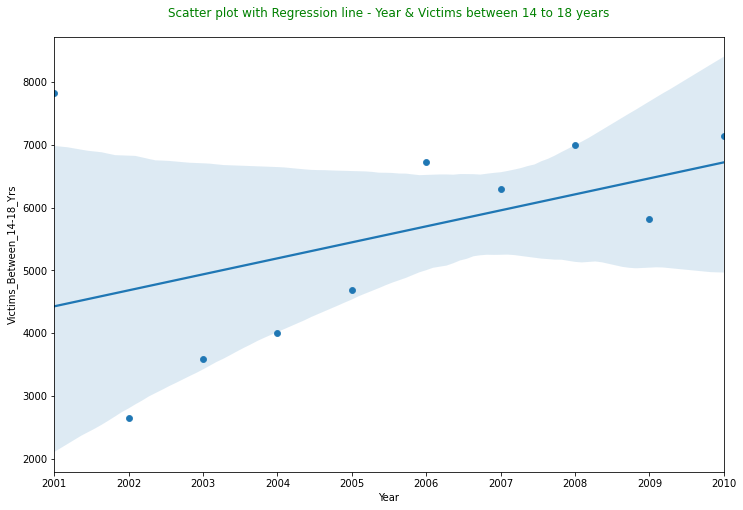

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims between 14 to 18 years',pad=20,color='green')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_14-18_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_14-18_Yrs'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Between_18-30_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Between 18-30 Years - Year on Year')

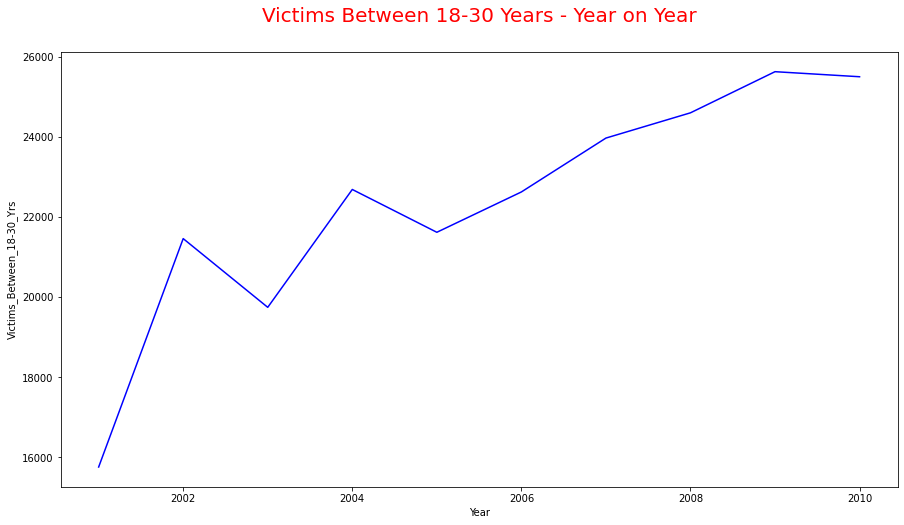

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Between_18-30_Yrs' , data = y_o_y, color = 'blue')
plt.title("Victims Between 18-30 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'red')

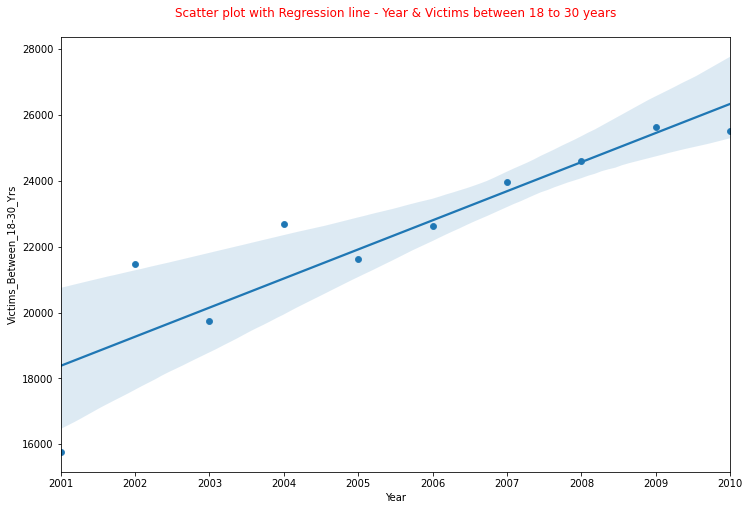

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims between 18 to 30 years',pad=20,color='red')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_18-30_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_18-30_Yrs'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Between_30-50_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Between 30-50 Years - Year on Year')

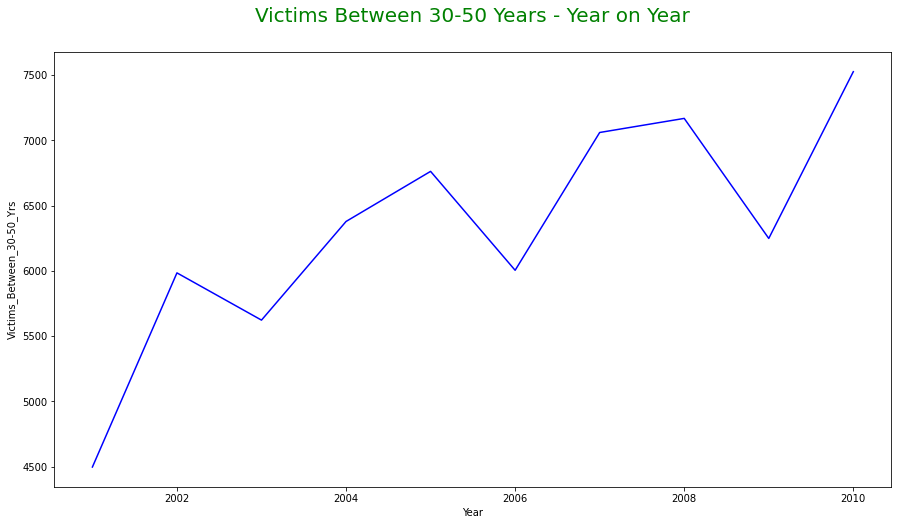

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Between_30-50_Yrs' , data = y_o_y, color = 'blue')
plt.title("Victims Between 30-50 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'green')

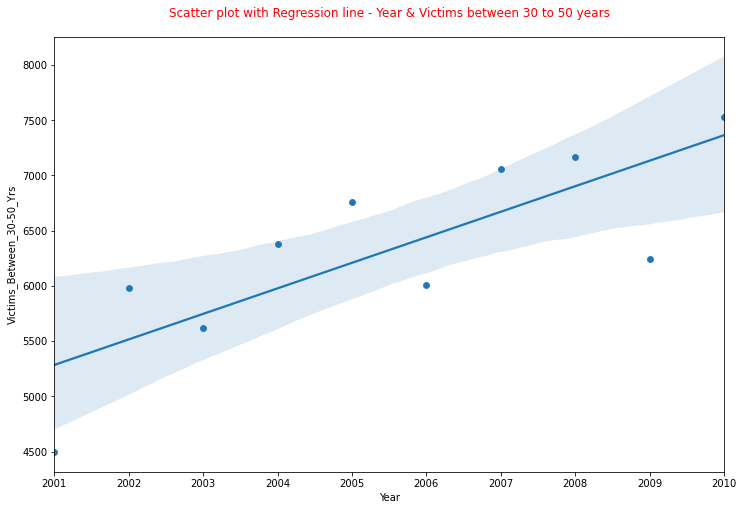

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims between 30 to 50 years',pad=20,color='red')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_30-50_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Between_30-50_Yrs'])

In [ ]:
y_o_y = df_vor.pivot_table(values='Victims_Above_50_Yrs',index='Year',aggfunc='sum').reset_index()

Text(0.5, 1.0, 'Victims Above 50 Years - Year on Year')

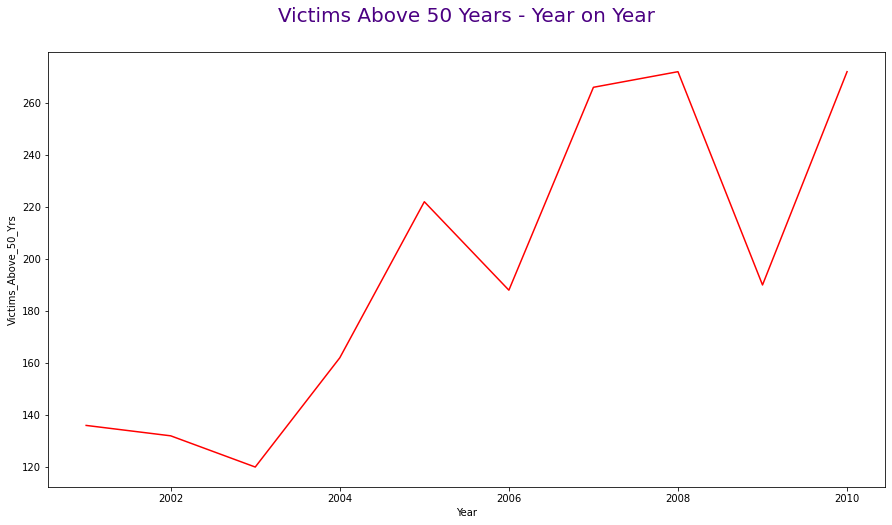

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Year', y = 'Victims_Above_50_Yrs' , data = y_o_y, color = 'Red')
plt.title("Victims Above 50 Years - Year on Year",fontdict={'fontsize':20},pad = 30,color = 'indigo')

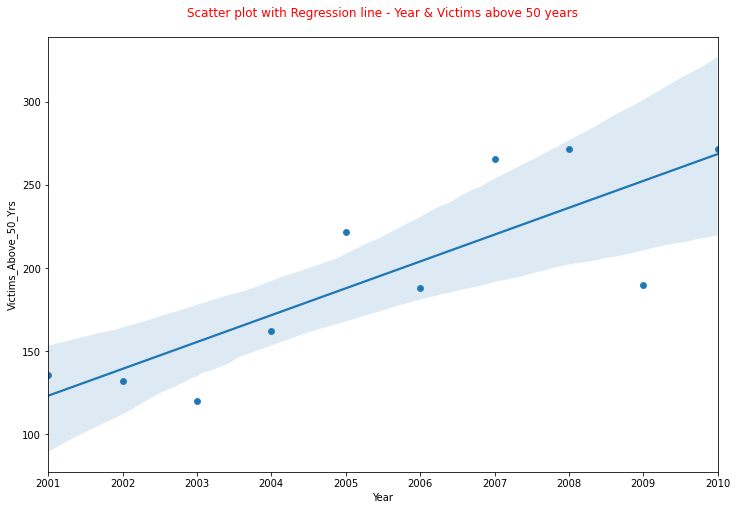

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot with Regression line - Year & Victims above 50 years',pad=20,color='red')
sns.scatterplot(x=y_o_y['Year'], y=y_o_y['Victims_Above_50_Yrs'])
sns.regplot(x=y_o_y['Year'], y=y_o_y['Victims_Above_50_Yrs'])

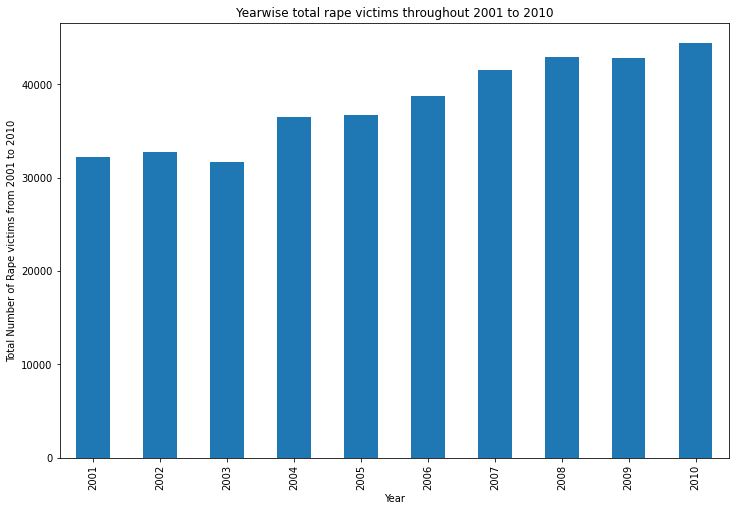

In [ ]:
#Bar graph
sum_of_victims_y = df_vor.pivot_table(values='Victims_of_Rape_Total',index='Year',aggfunc='sum')
pt = sum_of_victims_y[sum_of_victims_y['Victims_of_Rape_Total']>0]['Victims_of_Rape_Total']
pt = pt.plot.bar(figsize=(12,8))
pt.set_xlabel('Year')
pt.set_ylabel('Total Number of Rape victims from 2001 to 2010')
pt.set_title('Yearwise total rape victims throughout 2001 to 2010')
plt.show()

In [ ]:
state = df_vor.groupby(['Area_Name','Year']).sum()
state.sort_values(by=['Area_Name'],ascending=True)
state.head(12)

Rape_Cases_Reported  ...  Victims_of_Rape_Total
Area_Name                 Year                       ...                       
Andaman & Nicobar Islands 2001                    6  ...                      6
                          2002                    4  ...                      4
                          2003                    4  ...                      4
                          2004                   20  ...                     20
                          2005                    8  ...                      8
                          2006                   12  ...                     12
                          2007                    6  ...                      6
                          2008                   24  ...                     24
                          2009                   36  ...                     36
                          2010                   48  ...                     48
Andhra Pradesh            2001                 1742  ...                   1742
                          2002                 2004  ...                   2004

[12 rows x 8 columns]

In [ ]:
fig = px.pie(df_vor, values = 'Victims_of_Rape_Total',
             names = 'Area_Name',
             title = 'Rapes state wise',
             color_discrete_sequence=px.colors.sequential.Viridis
            )
fig.show()

In [ ]:
#States wih more number of Rape cases overall
victims_by_state = df_vor.groupby('Area_Name')
desc = victims_by_state['Victims_of_Rape_Total'].sum().sort_values(ascending=False)
print('Rape victims by State : ',desc)

Rape victims by State :  Area_Name
Madhya Pradesh               58514
West Bengal                  32756
Uttar Pradesh                30106
Maharashtra                  29010
Assam                        25524
Rajasthan                    23908
Bihar                        22526
Andhra Pradesh               21392
Chhattisgarh                 19502
Odisha                       17720
Jharkhand                    15126
Tamil Nadu                   11098
Kerala                       10616
Delhi                        10342
Haryana                      10018
Punjab                        8614
Karnataka                     7834
Gujarat                       6678
Jammu & Kashmir               4456
Tripura                       3252
Himachal Pradesh              2906
Uttarakhand                   2202
Meghalaya                     1478
Mizoram                       1292
Arunachal Pradesh              824
Manipur                        546
Goa                            540
Chandigarh          

In [ ]:
desc = victims_by_state['Victims_of_Rape_Total'].sum().sort_values(ascending=True)

Text(0, 0.5, 'State')

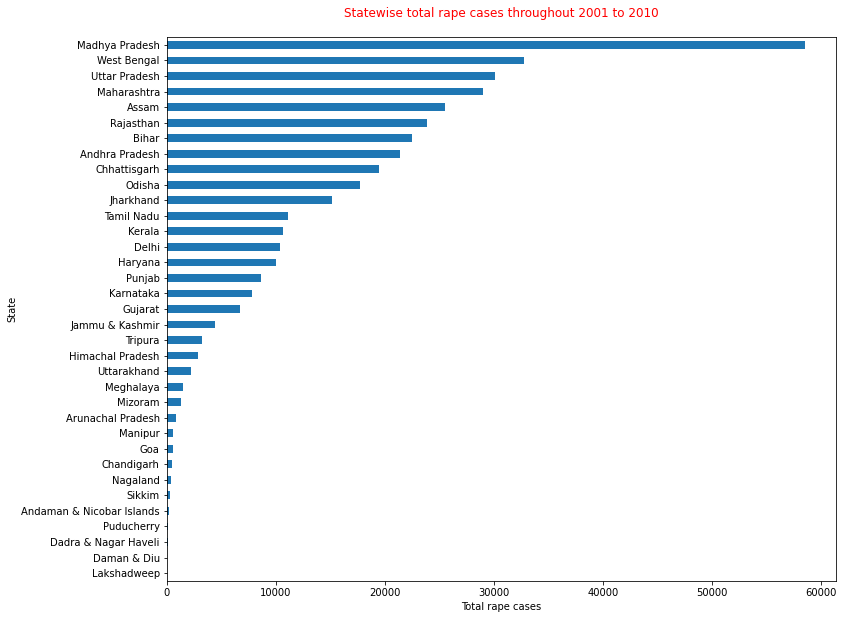

In [ ]:
desc.plot.barh(figsize=(12,10))
plt.title('Statewise total rape cases throughout 2001 to 2010',pad=20,color='red')
plt.xlabel('Total rape cases')
plt.ylabel('State')

In [ ]:
cri = df_vor.groupby('Area_Name').sum()

In [ ]:
cri.drop('Year', axis= 1, inplace= True)

In [ ]:
cri['TOTALLY'] = 0

In [ ]:
for i in range(len(cri.index)):
    cri['TOTALLY'][i] = cri.iloc[i].sum()

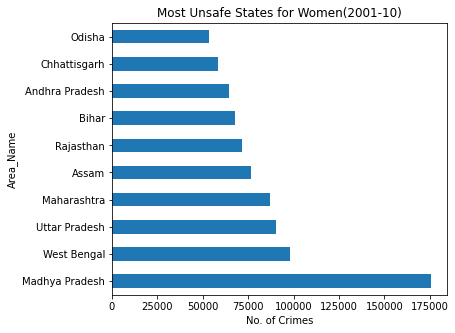

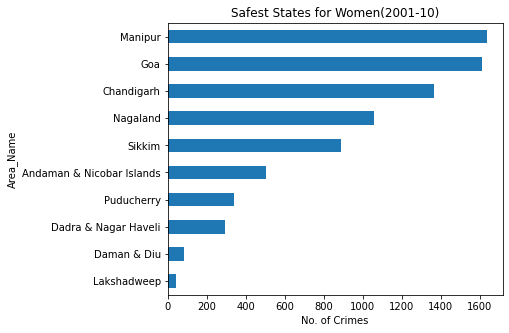

In [ ]:
max_crimes = cri['TOTALLY'].nlargest(10).plot(kind = 'barh', title = 'Most Unsafe States for Women(2001-10)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()
min_crimes = cri['TOTALLY'].nsmallest(10).plot(kind = 'barh', title = 'Safest States for Women(2001-10)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()

In [ ]:
top_5 = desc.head()
top_5

Area_Name
Lakshadweep                   14
Daman & Diu                   28
Dadra & Nagar Haveli          98
Puducherry                   114
Andaman & Nicobar Islands    168
Name: Victims_of_Rape_Total, dtype: int64

In [ ]:
safe_5 = desc.tail()
safe_5

Area_Name
Assam             25524
Maharashtra       29010
Uttar Pradesh     30106
West Bengal       32756
Madhya Pradesh    58514
Name: Victims_of_Rape_Total, dtype: int64

In [ ]:
t = df_vor.groupby(['Area_Name','Year'])['Victims_of_Rape_Total'].sum().reset_index()
t

Area_Name  Year  Victims_of_Rape_Total
0    Andaman & Nicobar Islands  2001                      6
1    Andaman & Nicobar Islands  2002                      4
2    Andaman & Nicobar Islands  2003                      4
3    Andaman & Nicobar Islands  2004                     20
4    Andaman & Nicobar Islands  2005                      8
..                         ...   ...                    ...
345                West Bengal  2006                   3462
346                West Bengal  2007                   4212
347                West Bengal  2008                   4526
348                West Bengal  2009                   4672
349                West Bengal  2010                   4622

[350 rows x 3 columns]

In [ ]:
t1 = t.loc[t['Area_Name']=='Madhya Pradesh']
t1

Area_Name  Year  Victims_of_Rape_Total
190  Madhya Pradesh  2001                   5702
191  Madhya Pradesh  2002                   5782
192  Madhya Pradesh  2003                   5476
193  Madhya Pradesh  2004                   5750
194  Madhya Pradesh  2005                   5842
195  Madhya Pradesh  2006                   5800
196  Madhya Pradesh  2007                   6020
197  Madhya Pradesh  2008                   5874
198  Madhya Pradesh  2009                   5996
199  Madhya Pradesh  2010                   6272

In [ ]:
t2 = t.loc[t['Area_Name']=='West Bengal']
t2

Area_Name  Year  Victims_of_Rape_Total
340  West Bengal  2001                   1418
341  West Bengal  2002                   1518
342  West Bengal  2003                   2004
343  West Bengal  2004                   2950
344  West Bengal  2005                   3372
345  West Bengal  2006                   3462
346  West Bengal  2007                   4212
347  West Bengal  2008                   4526
348  West Bengal  2009                   4672
349  West Bengal  2010                   4622

In [ ]:
t3= t.loc[t['Area_Name']=='Uttar Pradesh']
t3

Area_Name  Year  Victims_of_Rape_Total
320  Uttar Pradesh  2001                   3916
321  Uttar Pradesh  2002                   2830
322  Uttar Pradesh  2003                   1822
323  Uttar Pradesh  2004                   2794
324  Uttar Pradesh  2005                   2434
325  Uttar Pradesh  2006                   2628
326  Uttar Pradesh  2007                   3296
327  Uttar Pradesh  2008                   3742
328  Uttar Pradesh  2009                   3518
329  Uttar Pradesh  2010                   3126

In [ ]:
t4 = t.loc[t['Area_Name']=='Maharashtra']
t4

Area_Name  Year  Victims_of_Rape_Total
200  Maharashtra  2001                   2604
201  Maharashtra  2002                   2704
202  Maharashtra  2003                   2552
203  Maharashtra  2004                   2784
204  Maharashtra  2005                   3098
205  Maharashtra  2006                   3012
206  Maharashtra  2007                   2914
207  Maharashtra  2008                   3134
208  Maharashtra  2009                   2986
209  Maharashtra  2010                   3222

In [ ]:
t5 = t.loc[t['Area_Name']=='Assam']
t5

Area_Name  Year  Victims_of_Rape_Total
30     Assam  2001                   1634
31     Assam  2002                   1940
32     Assam  2003                   2190
33     Assam  2004                   2342
34     Assam  2005                   2476
35     Assam  2006                   2488
36     Assam  2007                   2874
37     Assam  2008                   2876
38     Assam  2009                   3262
39     Assam  2010                   3442

In [ ]:
ntop = pd.concat([t1,t2,t3,t4,t5],axis=0)
ntop

Area_Name  Year  Victims_of_Rape_Total
190  Madhya Pradesh  2001                   5702
191  Madhya Pradesh  2002                   5782
192  Madhya Pradesh  2003                   5476
193  Madhya Pradesh  2004                   5750
194  Madhya Pradesh  2005                   5842
195  Madhya Pradesh  2006                   5800
196  Madhya Pradesh  2007                   6020
197  Madhya Pradesh  2008                   5874
198  Madhya Pradesh  2009                   5996
199  Madhya Pradesh  2010                   6272
340     West Bengal  2001                   1418
341     West Bengal  2002                   1518
342     West Bengal  2003                   2004
343     West Bengal  2004                   2950
344     West Bengal  2005                   3372
345     West Bengal  2006                   3462
346     West Bengal  2007                   4212
347     West Bengal  2008                   4526
348     West Bengal  2009                   4672
349     West Bengal  2010                   4622
320   Uttar Pradesh  2001                   3916
321   Uttar Pradesh  2002                   2830
322   Uttar Pradesh  2003                   1822
323   Uttar Pradesh  2004                   2794
324   Uttar Pradesh  2005                   2434
325   Uttar Pradesh  2006                   2628
326   Uttar Pradesh  2007                   3296
327   Uttar Pradesh  2008                   3742
328   Uttar Pradesh  2009                   3518
329   Uttar Pradesh  2010                   3126
200     Maharashtra  2001                   2604
201     Maharashtra  2002                   2704
202     Maharashtra  2003                   2552
203     Maharashtra  2004                   2784
204     Maharashtra  2005                   3098
205     Maharashtra  2006                   3012
206     Maharashtra  2007                   2914
207     Maharashtra  2008                   3134
208     Maharashtra  2009                   2986
209     Maharashtra  2010                   3222
30            Assam  2001                   1634
31            Assam  2002                   1940
32            Assam  2003                   2190
33            Assam  2004                   2342
34            Assam  2005                   2476
35            Assam  2006                   2488
36            Assam  2007                   2874
37            Assam  2008                   2876
38            Assam  2009                   3262
39            Assam  2010                   3442

In [ ]:
plt.figure(figsize=(12,9))
fig = px.line(ntop, x = 'Year', y = 'Victims_of_Rape_Total', color = 'Area_Name',title = 'Top 5 states in Rape Cases')
fig.layout.template = 'plotly_dark'
fig.show()

<Figure size 864x648 with 0 Axes>

In [ ]:
'''
top5 safest states from 2001 to 2010

Andaman & Nicobar Islands    168
Puducherry                   114
Dadra & Nagar Haveli          98
Daman & Diu                   28
Lakshadweep                   14
'''
s1 = t.loc[t['Area_Name']=='Andaman & Nicobar Islands']
s1

Area_Name  Year  Victims_of_Rape_Total
0  Andaman & Nicobar Islands  2001                      6
1  Andaman & Nicobar Islands  2002                      4
2  Andaman & Nicobar Islands  2003                      4
3  Andaman & Nicobar Islands  2004                     20
4  Andaman & Nicobar Islands  2005                      8
5  Andaman & Nicobar Islands  2006                     12
6  Andaman & Nicobar Islands  2007                      6
7  Andaman & Nicobar Islands  2008                     24
8  Andaman & Nicobar Islands  2009                     36
9  Andaman & Nicobar Islands  2010                     48

In [ ]:
s2 = t.loc[t['Area_Name']=='Puducherry']
s2

Area_Name  Year  Victims_of_Rape_Total
260  Puducherry  2001                     18
261  Puducherry  2002                     12
262  Puducherry  2003                      4
263  Puducherry  2004                      8
264  Puducherry  2005                     12
265  Puducherry  2006                     18
266  Puducherry  2007                     18
267  Puducherry  2008                     16
268  Puducherry  2009                      2
269  Puducherry  2010                      6

In [ ]:
s3 = t.loc[t['Area_Name']=='Dadra & Nagar Haveli']
s3

Area_Name  Year  Victims_of_Rape_Total
70  Dadra & Nagar Haveli  2001                     12
71  Dadra & Nagar Haveli  2002                      8
72  Dadra & Nagar Haveli  2003                      2
73  Dadra & Nagar Haveli  2004                     14
74  Dadra & Nagar Haveli  2005                     10
75  Dadra & Nagar Haveli  2006                     12
76  Dadra & Nagar Haveli  2007                     14
77  Dadra & Nagar Haveli  2008                     12
78  Dadra & Nagar Haveli  2009                      8
79  Dadra & Nagar Haveli  2010                      6

In [ ]:
s4 = t.loc[t['Area_Name']=='Daman & Diu']
s4

Area_Name  Year  Victims_of_Rape_Total
80  Daman & Diu  2001                      0
81  Daman & Diu  2002                      0
82  Daman & Diu  2003                     10
83  Daman & Diu  2004                      2
84  Daman & Diu  2005                      4
85  Daman & Diu  2006                      6
86  Daman & Diu  2007                      2
87  Daman & Diu  2008                      0
88  Daman & Diu  2009                      2
89  Daman & Diu  2010                      2

In [ ]:
s5 = t.loc[t['Area_Name']=='Lakshadweep']
s5

Area_Name  Year  Victims_of_Rape_Total
180  Lakshadweep  2001                      0
181  Lakshadweep  2002                      2
182  Lakshadweep  2003                      4
183  Lakshadweep  2004                      0
184  Lakshadweep  2005                      0
185  Lakshadweep  2006                      0
186  Lakshadweep  2007                      2
187  Lakshadweep  2008                      4
188  Lakshadweep  2009                      2
189  Lakshadweep  2010                      0

In [ ]:
nsafe = pd.concat([s1,s2,s3,s4,s5],axis=0)
nsafe

Area_Name  Year  Victims_of_Rape_Total
0    Andaman & Nicobar Islands  2001                      6
1    Andaman & Nicobar Islands  2002                      4
2    Andaman & Nicobar Islands  2003                      4
3    Andaman & Nicobar Islands  2004                     20
4    Andaman & Nicobar Islands  2005                      8
5    Andaman & Nicobar Islands  2006                     12
6    Andaman & Nicobar Islands  2007                      6
7    Andaman & Nicobar Islands  2008                     24
8    Andaman & Nicobar Islands  2009                     36
9    Andaman & Nicobar Islands  2010                     48
260                 Puducherry  2001                     18
261                 Puducherry  2002                     12
262                 Puducherry  2003                      4
263                 Puducherry  2004                      8
264                 Puducherry  2005                     12
265                 Puducherry  2006                     18
266                 Puducherry  2007                     18
267                 Puducherry  2008                     16
268                 Puducherry  2009                      2
269                 Puducherry  2010                      6
70        Dadra & Nagar Haveli  2001                     12
71        Dadra & Nagar Haveli  2002                      8
72        Dadra & Nagar Haveli  2003                      2
73        Dadra & Nagar Haveli  2004                     14
74        Dadra & Nagar Haveli  2005                     10
75        Dadra & Nagar Haveli  2006                     12
76        Dadra & Nagar Haveli  2007                     14
77        Dadra & Nagar Haveli  2008                     12
78        Dadra & Nagar Haveli  2009                      8
79        Dadra & Nagar Haveli  2010                      6
80                 Daman & Diu  2001                      0
81                 Daman & Diu  2002                      0
82                 Daman & Diu  2003                     10
83                 Daman & Diu  2004                      2
84                 Daman & Diu  2005                      4
85                 Daman & Diu  2006                      6
86                 Daman & Diu  2007                      2
87                 Daman & Diu  2008                      0
88                 Daman & Diu  2009                      2
89                 Daman & Diu  2010                      2
180                Lakshadweep  2001                      0
181                Lakshadweep  2002                      2
182                Lakshadweep  2003                      4
183                Lakshadweep  2004                      0
184                Lakshadweep  2005                      0
185                Lakshadweep  2006                      0
186                Lakshadweep  2007                      2
187                Lakshadweep  2008                      4
188                Lakshadweep  2009                      2
189                Lakshadweep  2010                      0

In [ ]:
plt.figure(figsize=(12,9))
fig = px.line(nsafe, x = 'Year', y = 'Victims_of_Rape_Total', color = 'Area_Name',title = 'Top 5 Safe states in Rape Cases')
fig.layout.template = 'plotly_dark'
fig.show()

<Figure size 864x648 with 0 Axes>

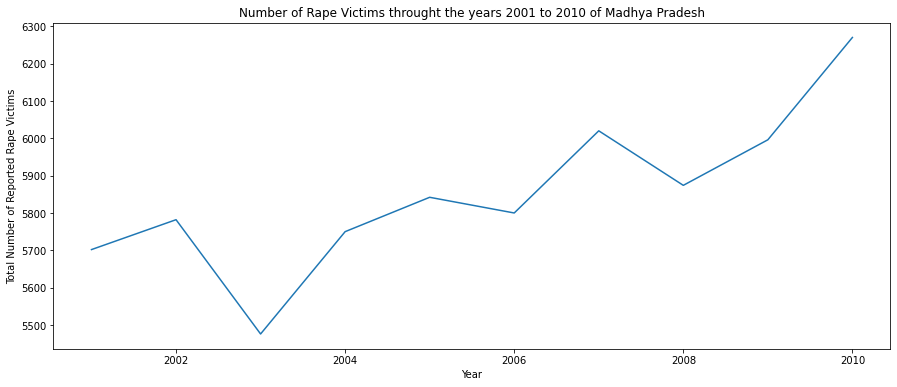

In [ ]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_victims = df_vor[df_vor['Area_Name']=='Madhya Pradesh']
mp_victims_by_year = mp_victims.groupby('Year').sum()

plt.subplots(figsize = (15, 6))
ax = mp_victims_by_year['Rape_Cases_Reported'].plot()
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title='Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

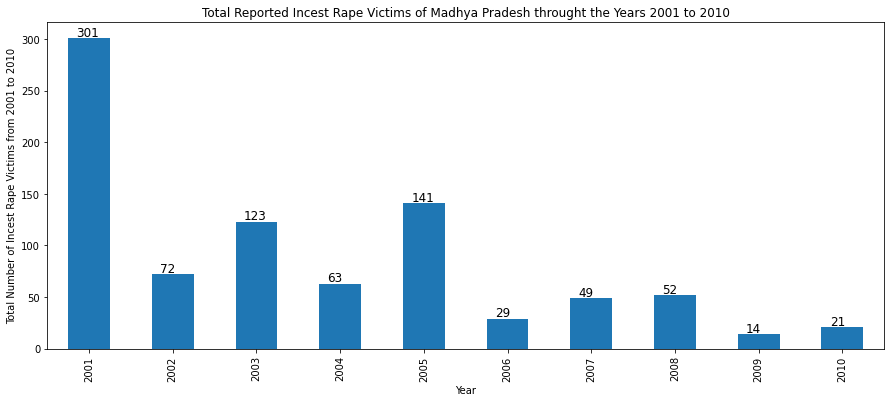

In [ ]:
# let's first see the mp_rape_victims dataframe
#mp_rape_victims.head()

mp_incest_rape_cases = mp_victims[mp_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Madhya Pradesh throught the Years 2001 to 2010')
plt.show()

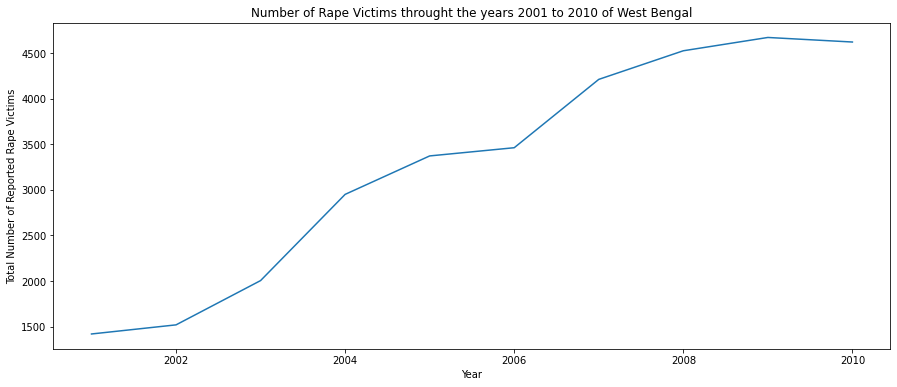

In [ ]:
wb_rape_victims = df_vor[df_vor['Area_Name'] == 'West Bengal']

# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
wb_rape_victims_by_year = wb_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = wb_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title = 'Number of Rape Victims throught the years 2001 to 2010 of West Bengal')
plt.show()

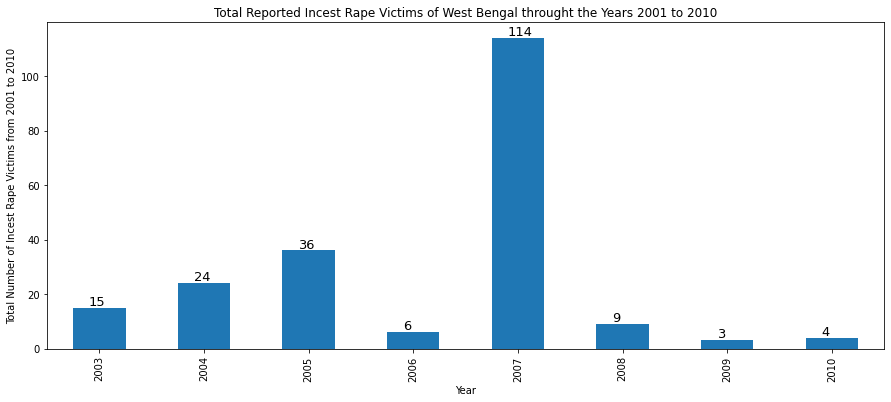

'\nLooks like 2007 was a very shameful year of West Bengal, the most number of incest rape cases happened in 2007,\na total of 114.. Also, if we compare it to Madhya Pradesh, no incest rape cases were reported for the year 2001 an 2002\n\nI have not explored the other states because the process would be repeatative and \nyou can also do it yourself by forking the notebook and changing some simple values.\n'

In [ ]:
# incest rape cases in Bengal
wb_incest_rape_cases = wb_rape_victims[wb_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = wb_incest_rape_cases.groupby('Year').sum()
ax = ct[ct['Rape_Cases_Reported'] > 0]['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + .15, p.get_height()+1),fontsize=13)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of West Bengal throught the Years 2001 to 2010')
plt.show()
'''
Looks like 2007 was a very shameful year of West Bengal, the most number of incest rape cases happened in 2007,
a total of 114.. Also, if we compare it to Madhya Pradesh, no incest rape cases were reported for the year 2001 an 2002

I have not explored the other states because the process would be repeatative and 
you can also do it yourself by forking the notebook and changing some simple values.
'''

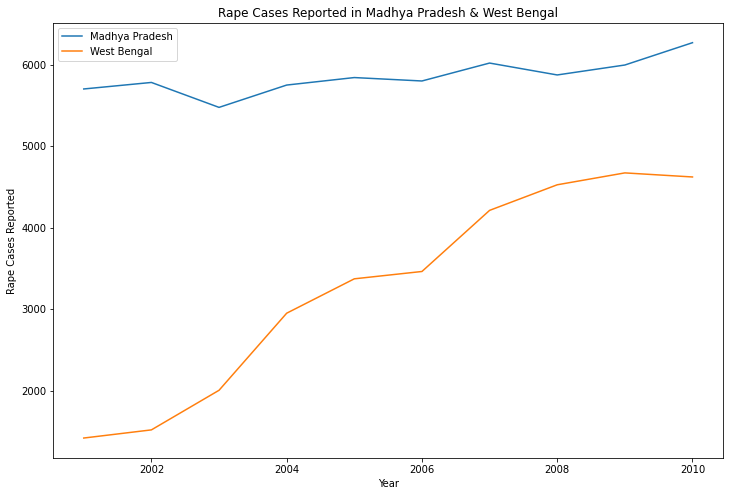

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(mp_victims_by_year.index,mp_victims_by_year['Rape_Cases_Reported'],label = "Madhya Pradesh")
plt.plot(wb_rape_victims_by_year.index,wb_rape_victims_by_year['Rape_Cases_Reported'],label = "West Bengal")
plt.xlabel('Year')
plt.ylabel('Rape Cases Reported')
plt.title('Rape Cases Reported in Madhya Pradesh & West Bengal')
plt.legend()
plt.show()

In [ ]:
t = pd.pivot_table(df_vor,values='Victims_of_Rape_Total',index='Year',aggfunc='sum',columns='Subgroup')
t

Subgroup  Total Rape Victims  Victims of Incest Rape  Victims of Other Rape
Year                                                                       
2001                   16078                     439                  15639
2002                   16378                     369                  16009
2003                   15856                     400                  15456
2004                   18239                     506                  17733
2005                   18376                     750                  17626
2006                   19365                     431                  18934
2007                   20771                     405                  20366
2008                   21485                     309                  21176
2009                   21413                     322                  21091
2010                   22193                     288                  21905

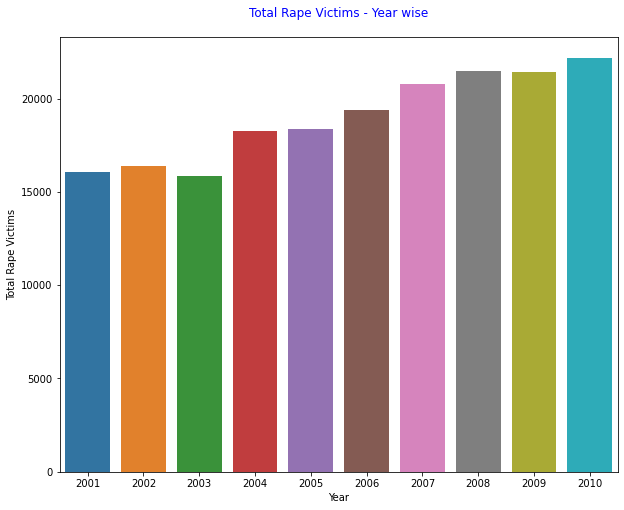

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Total Rape Victims - Year wise',pad=20,color='blue')
sns.barplot(x=t.index,y=t['Total Rape Victims'])

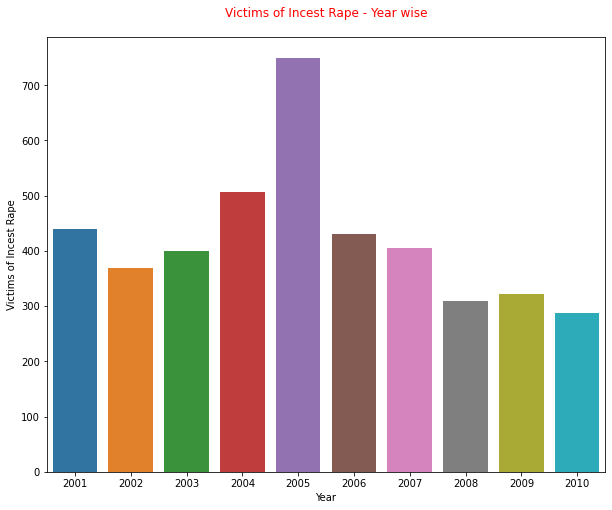

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Victims of Incest Rape - Year wise',pad=20,color='red')
sns.barplot(x=t.index,y=t['Victims of Incest Rape'])

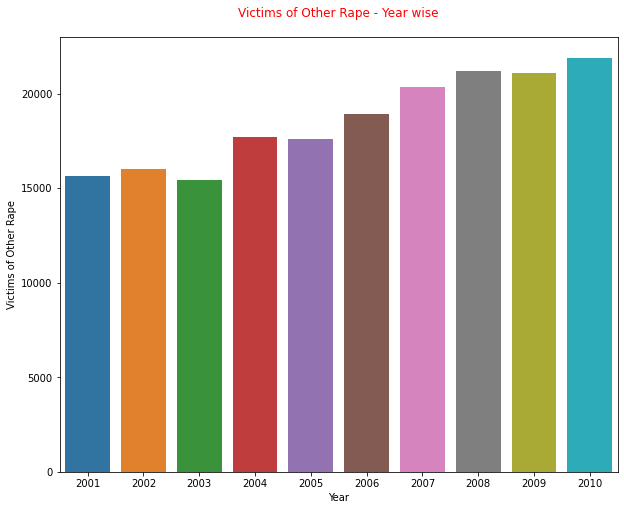

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Victims of Other Rape - Year wise',pad=20,color='red')
sns.barplot(x=t.index,y=t['Victims of Other Rape'])

In [ ]:
victims_by_state = df_vor.groupby('Area_Name').sum()
victims_by_state.drop('Year',axis=1,inplace=True)

total_rape_victims = victims_by_state['Victims_of_Rape_Total'].sum()
total_reported = victims_by_state['Rape_Cases_Reported'].sum()
total_unreported = total_rape_victims - total_reported

print('Total rape victims : ',total_rape_victims)
print('Total reported rape victims : ',total_reported)
print('Total unreported rape victims : ',total_unreported)

Total rape victims :  380308
Total reported rape victims :  380016
Total unreported rape victims :  292


In [ ]:
victims_by_state.sort_values(by='Rape_Cases_Reported',ascending=False).head()

Rape_Cases_Reported  ...  Victims_of_Rape_Total
Area_Name                            ...                       
Madhya Pradesh                58512  ...                  58514
West Bengal                   32756  ...                  32756
Uttar Pradesh                 30106  ...                  30106
Maharashtra                   28892  ...                  29010
Assam                         25524  ...                  25524

[5 rows x 8 columns]

In [ ]:
#Unreported cases
df_vor['Unreported_cases'] = df_vor['Victims_of_Rape_Total'] - df_vor['Rape_Cases_Reported']
df_vor[df_vor['Unreported_cases']>0].head()

Area_Name  Year  ... Victims_of_Rape_Total  Unreported_cases
150  Chandigarh  2001  ...                    19                 1
152  Chandigarh  2001  ...                    17                 1
270       Delhi  2001  ...                   383                 2
272       Delhi  2001  ...                   374                 2
273       Delhi  2002  ...                   407                 4

[5 rows x 12 columns]

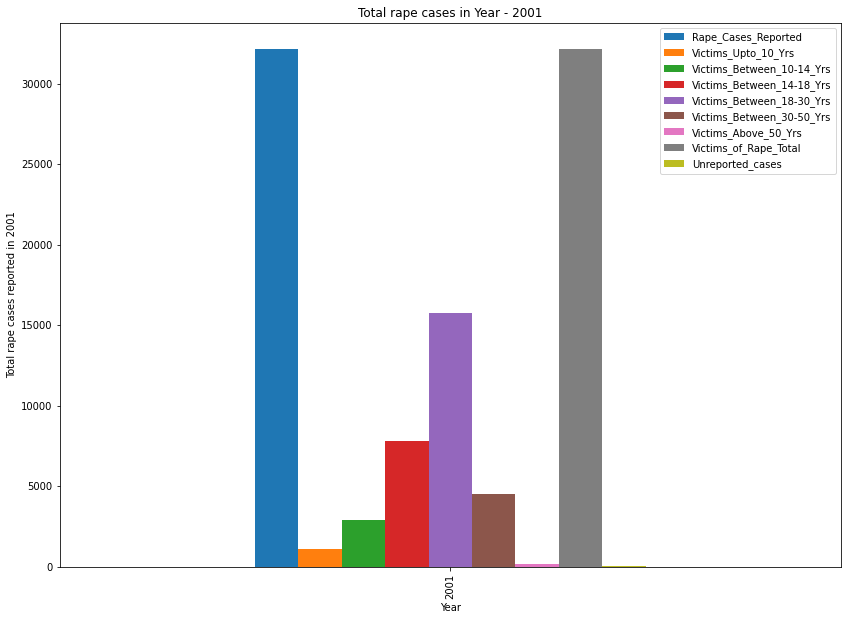

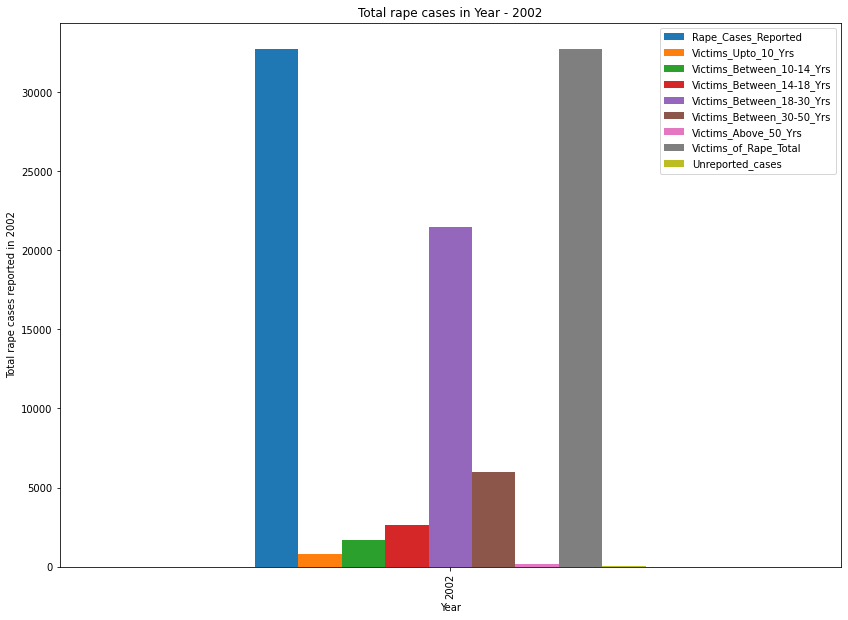

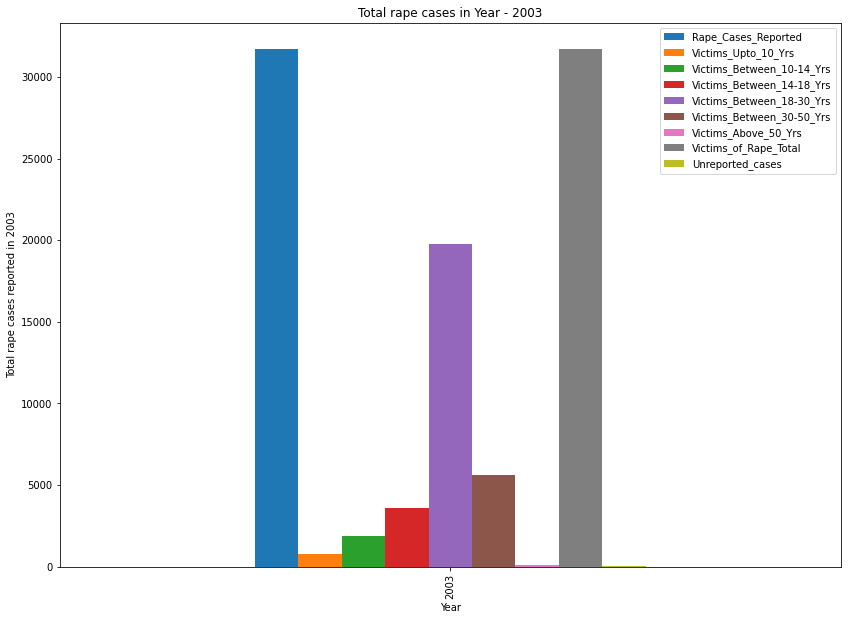

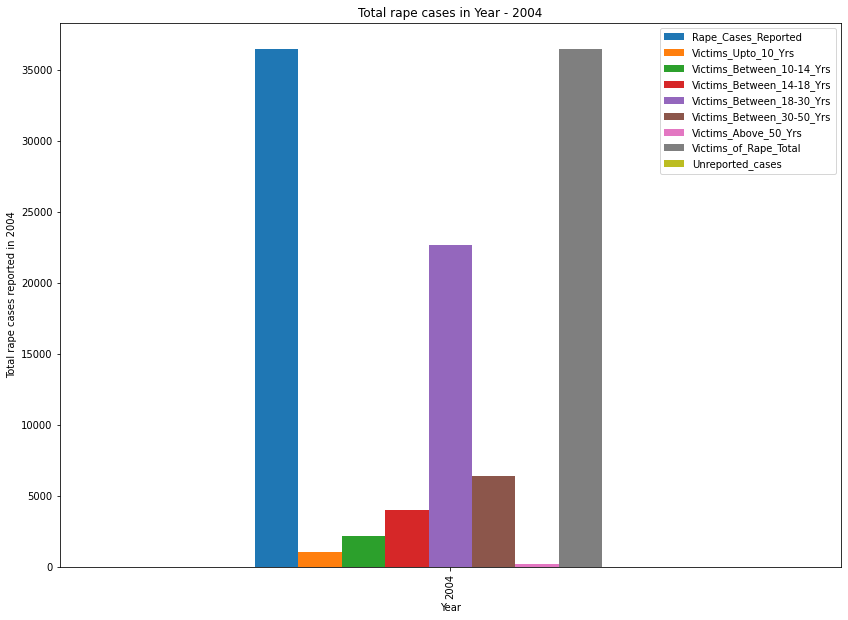

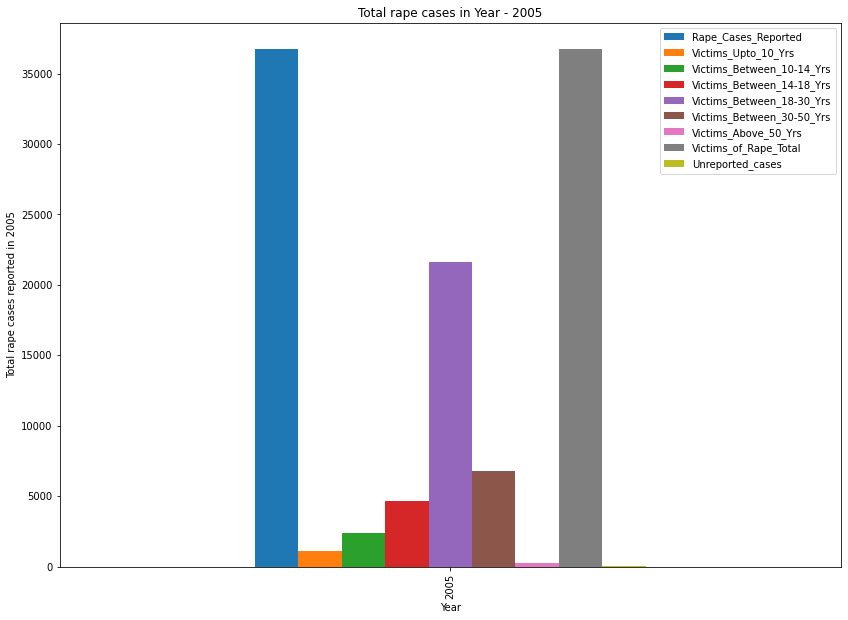

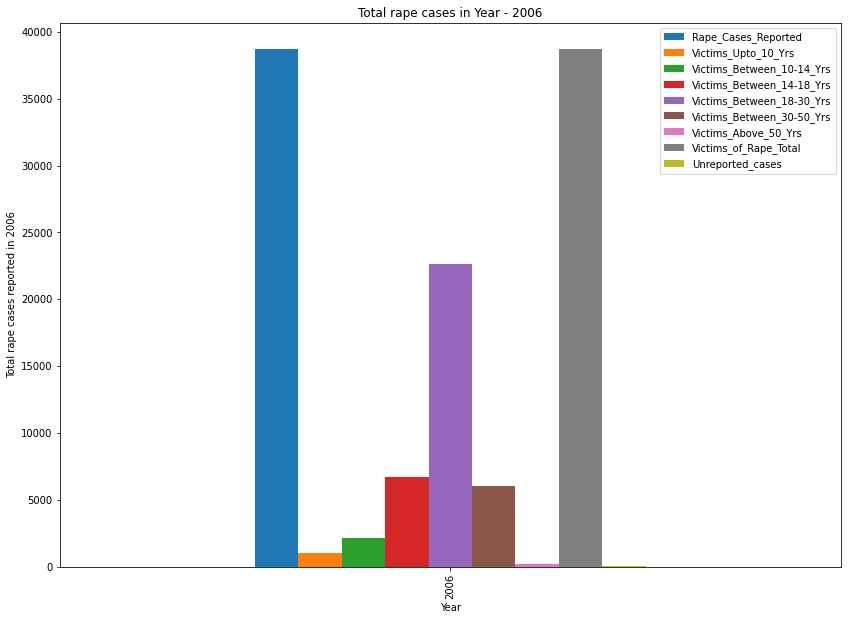

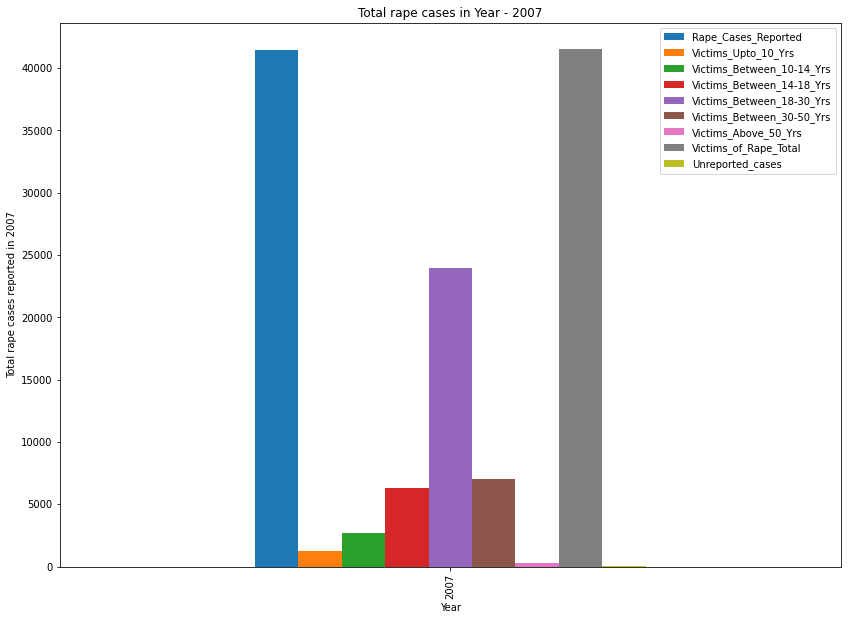

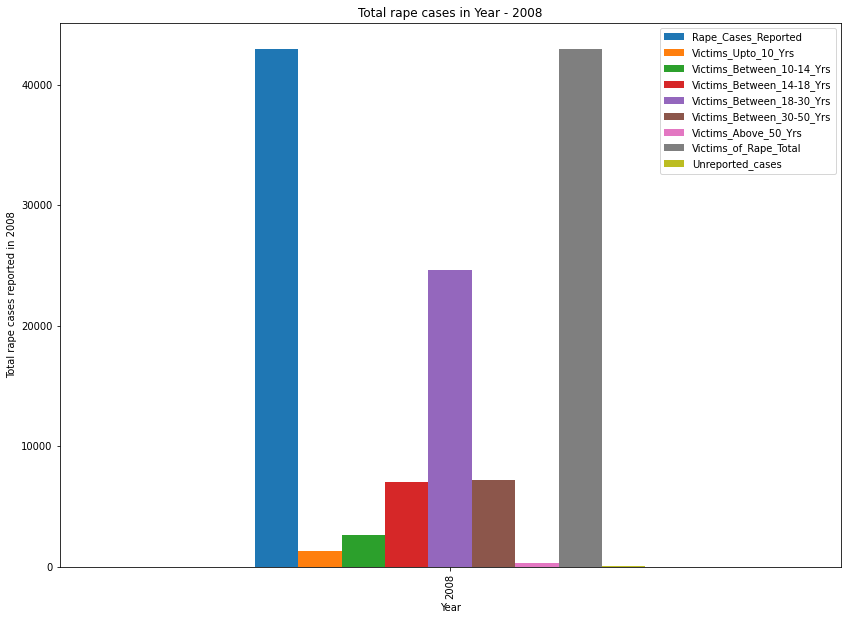

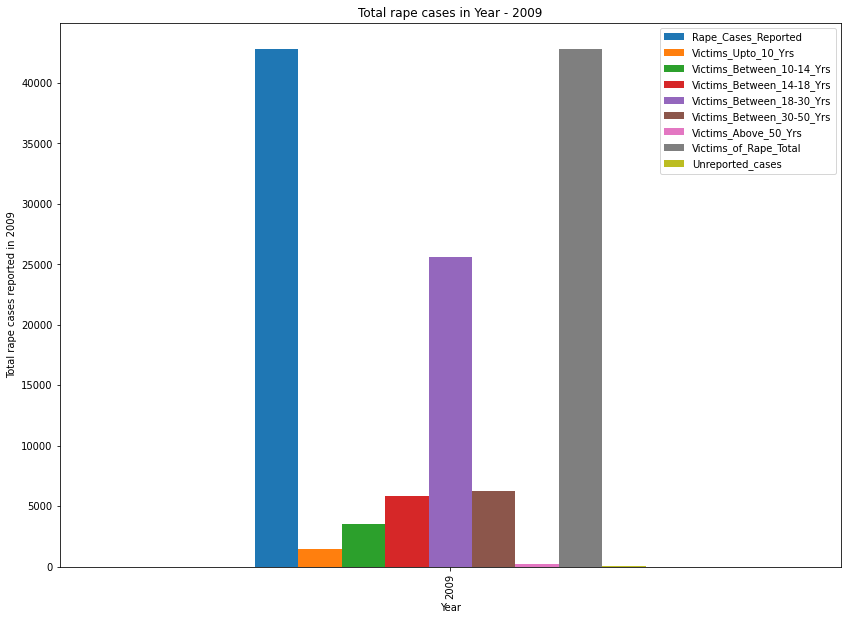

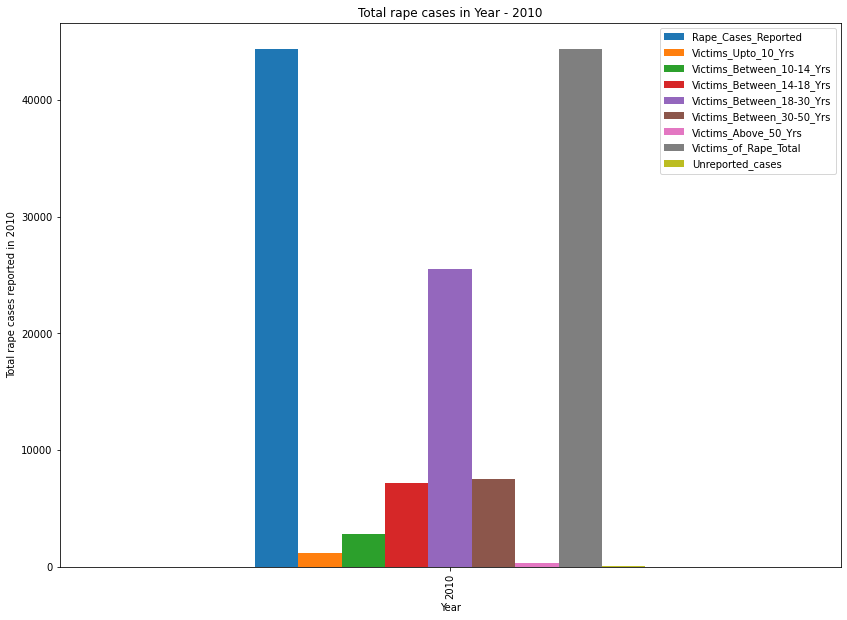

In [ ]:
d2 = df_vor.groupby(['Year']).sum()
for i in range(n_year):
  d1 = d2[i:i+1]
  d1 = d1.plot.bar(figsize=(14,10))
  yr = str(year[i])
  tit = 'Total rape cases in Year - ' + yr
  y = 'Total rape cases reported in ' + yr
  plt.title(tit)
  plt.ylabel(y)

Text(0.5, 1.0, 'Incest vs Other rapes')

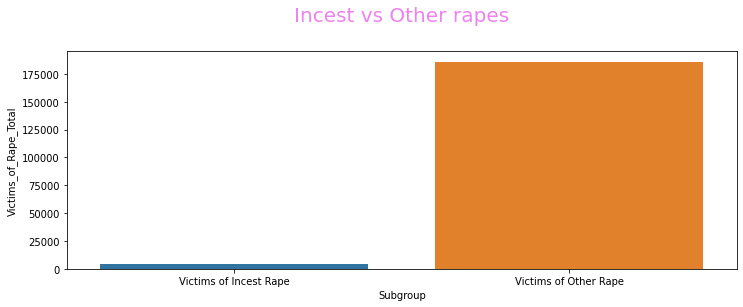

In [ ]:
# Rapes are reported more - Incest rape or other

sub = df_vor.pivot_table(index='Subgroup',values='Victims_of_Rape_Total',aggfunc='sum').reset_index()
sub.drop(index = 0, inplace=True)
#style.use('ggplot')
plt.figure(figsize=(12, 4))
sns.barplot(x='Subgroup', y = 'Victims_of_Rape_Total', data=sub)
plt.title("Incest vs Other rapes",fontdict={'fontsize':20},pad = 30,color = 'violet')

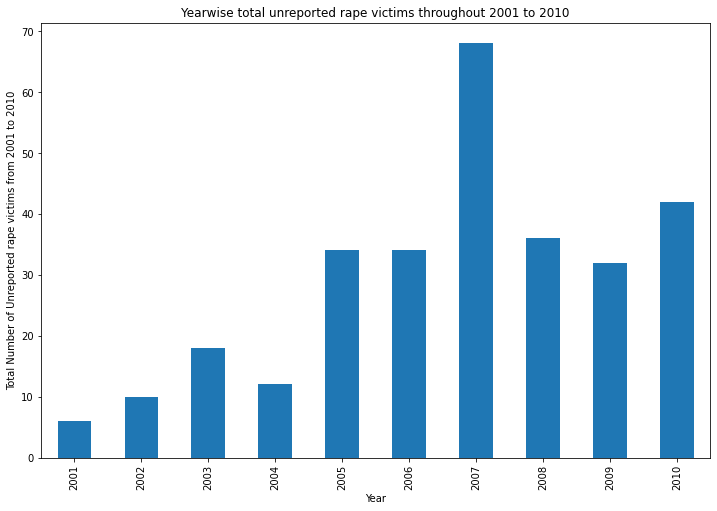

In [ ]:
sum_of_victims_y = df_vor.pivot_table(values='Unreported_cases',index='Year',aggfunc='sum')
pt = sum_of_victims_y[sum_of_victims_y['Unreported_cases']>0]['Unreported_cases']
pt = pt.plot.bar(figsize=(12,8))
pt.set_xlabel('Year')
pt.set_ylabel('Total Number of Unreported rape victims from 2001 to 2010')
pt.set_title('Yearwise total unreported rape victims throughout 2001 to 2010')
plt.show()

Text(0.5, 1.0, 'State wise Count Distribution of Crime Rape')

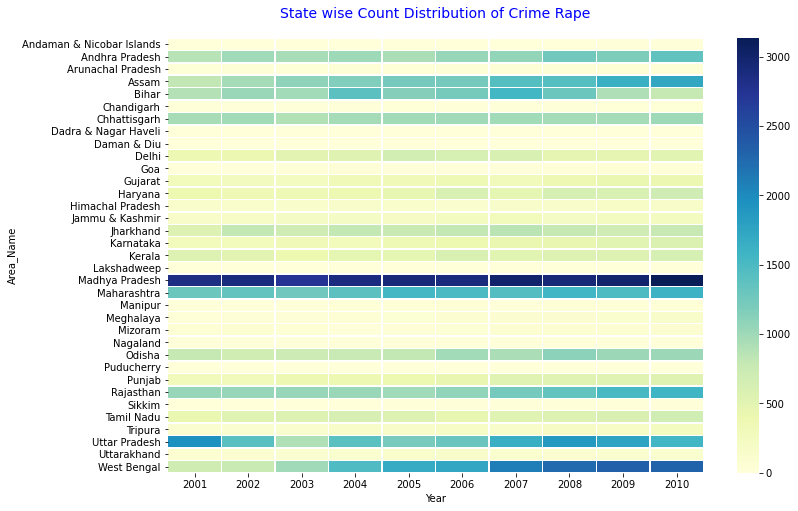

In [ ]:
# heat map plotting 

in_data2 = total_rape.pivot("Area_Name","Year","Victims_of_Rape_Total" )

plt.figure(figsize=(12, 8)) 

plt.yticks(rotation=1) 
ax = sns.heatmap(in_data2,cmap="YlGnBu", linewidths=.5)
plt.title("State wise Count Distribution of Crime Rape",color = 'blue',fontsize=14,pad=20)

Text(0.5, 1.0, 'Statewise Victims of Rape Cases based on Age Group')

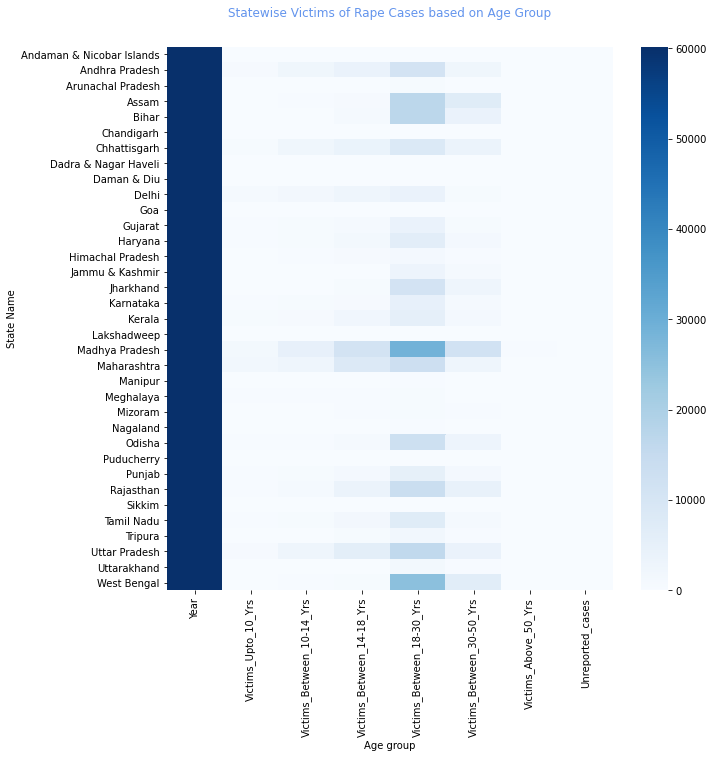

In [ ]:
df_vor1 = df_vor.drop(columns=['Rape_Cases_Reported','Victims_of_Rape_Total'])
rape_state_heatmap = df_vor1.groupby('Area_Name').sum()
plt.figure(figsize=(10,10))
pl = sns.heatmap(rape_state_heatmap,cmap='Blues')
pl.set_xlabel('Age group')
pl.set_ylabel('State Name')
pl.set_title('Statewise Victims of Rape Cases based on Age Group',color='cornflowerblue',pad=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

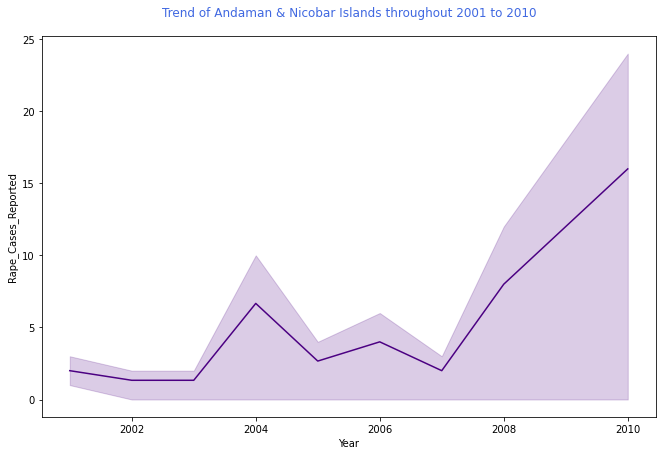

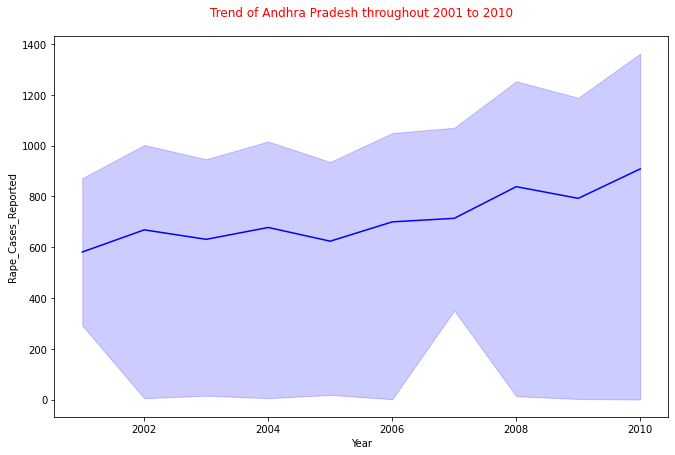

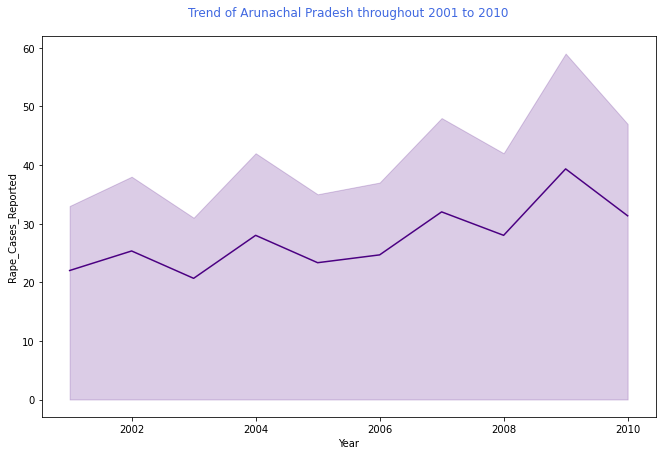

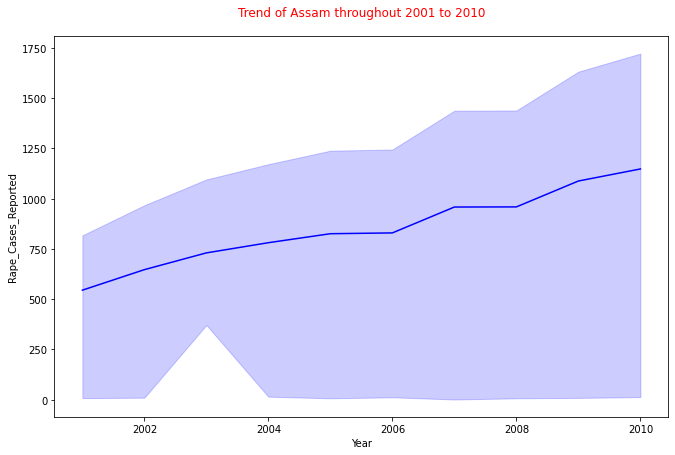

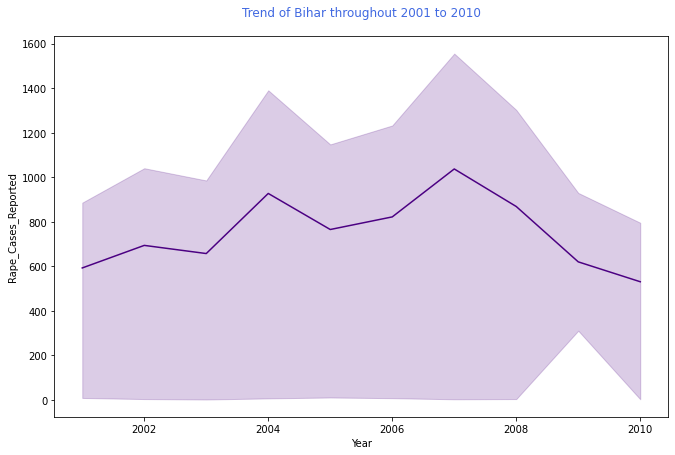

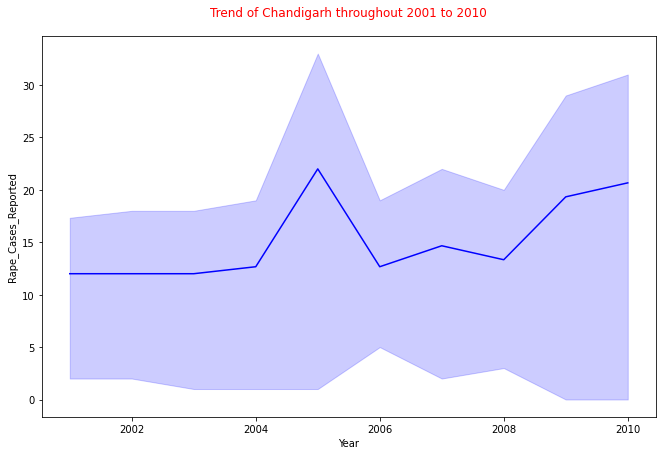

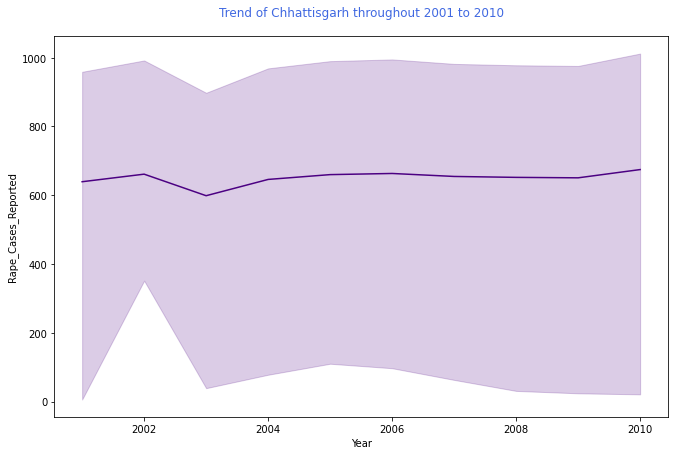

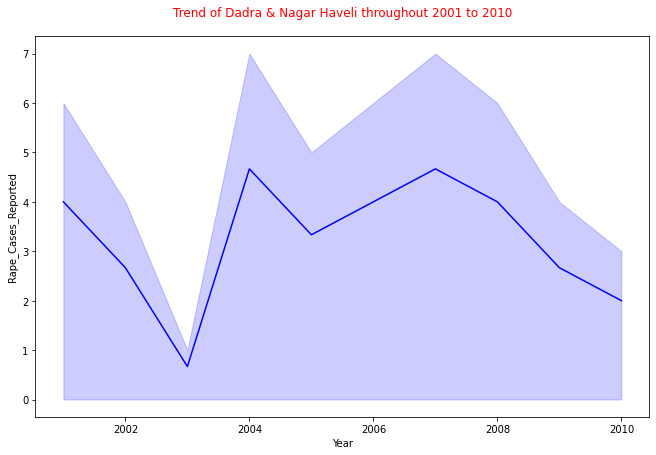

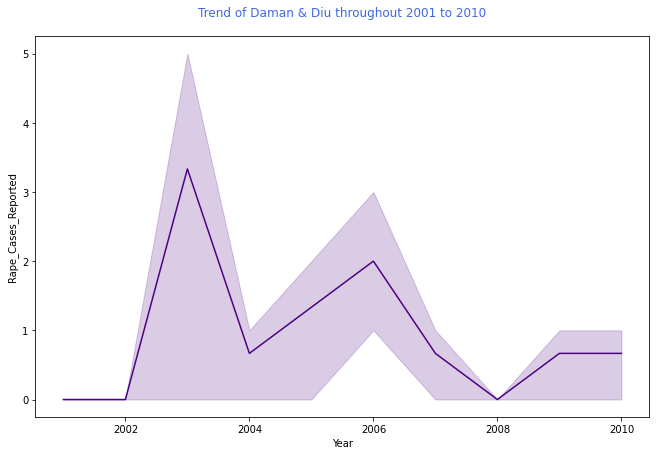

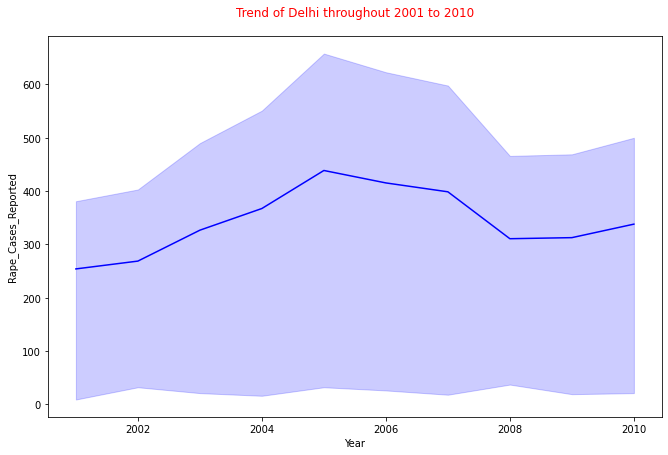

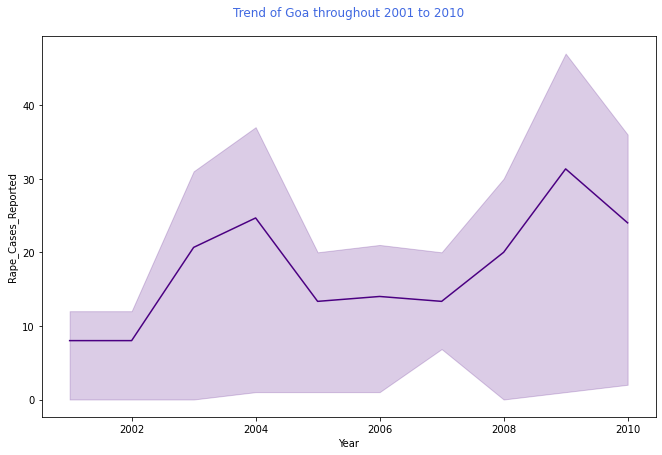

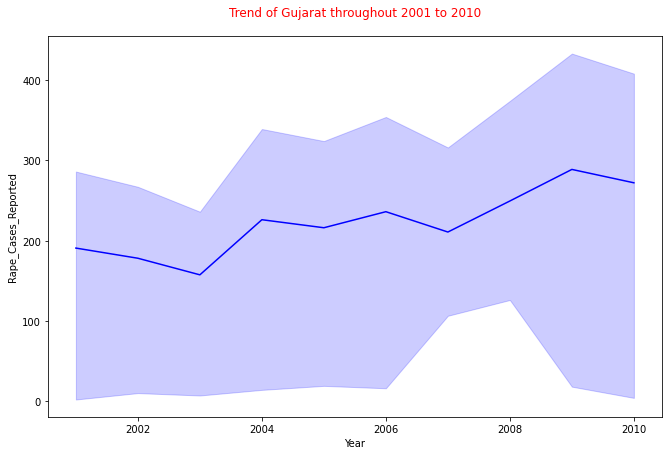

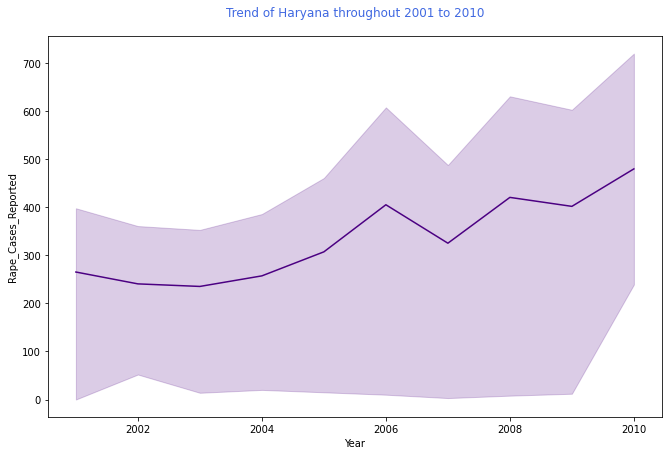

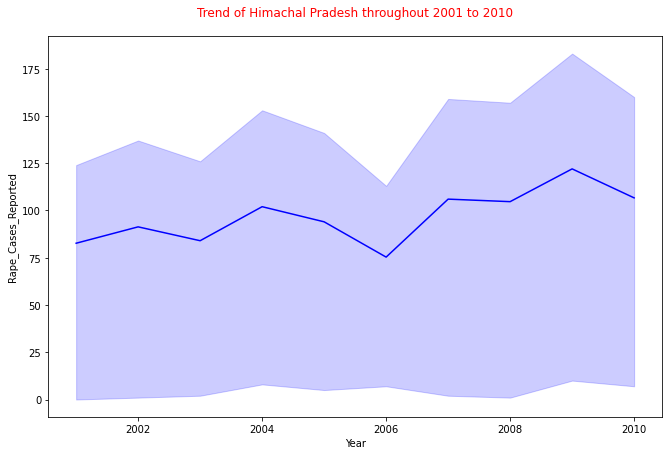

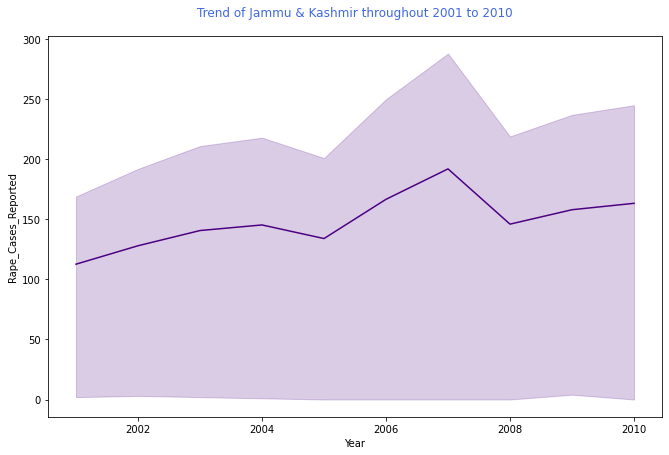

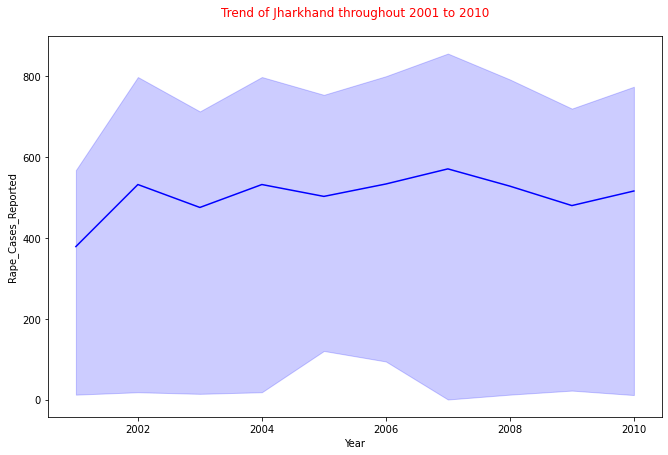

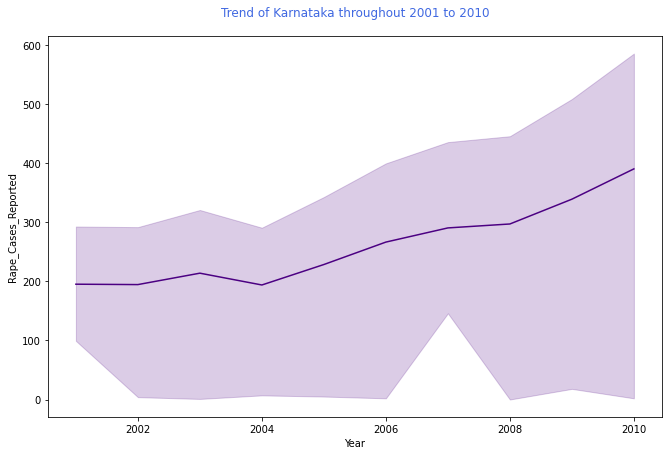

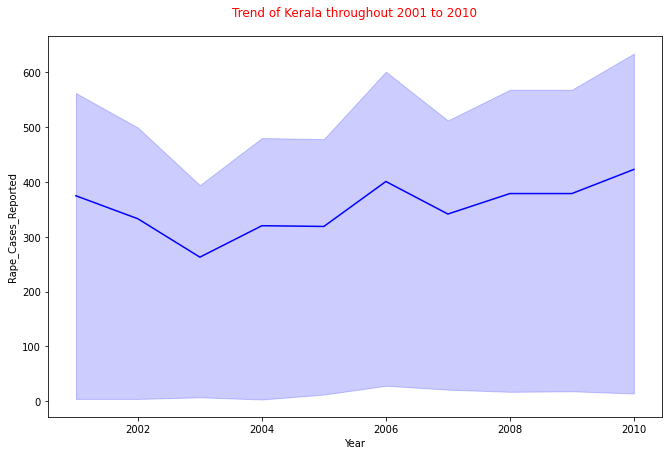

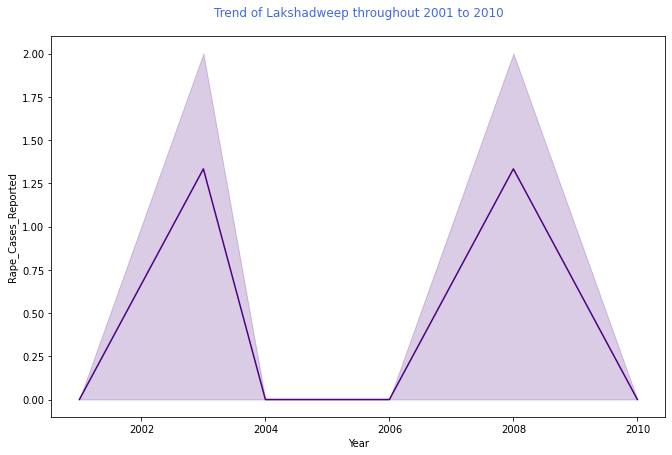

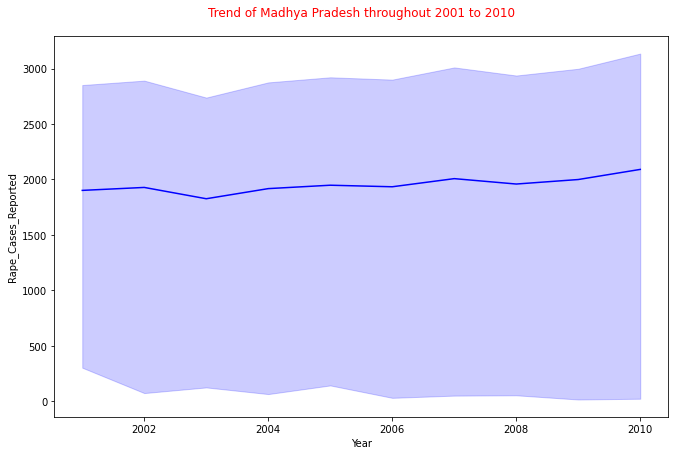

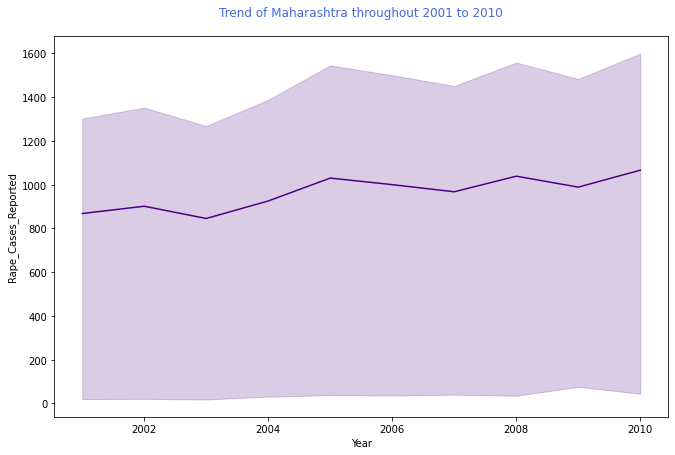

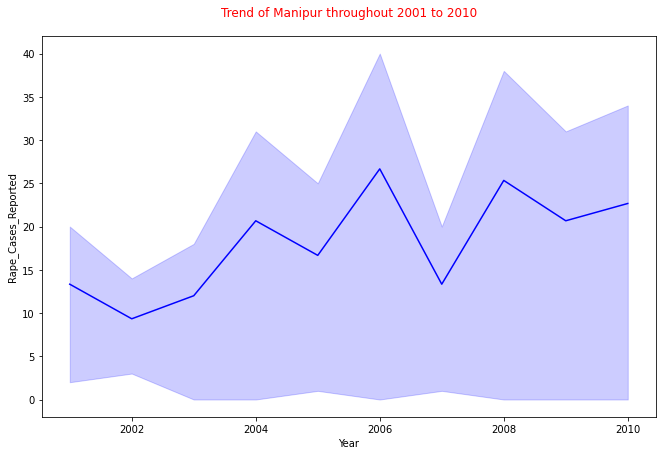

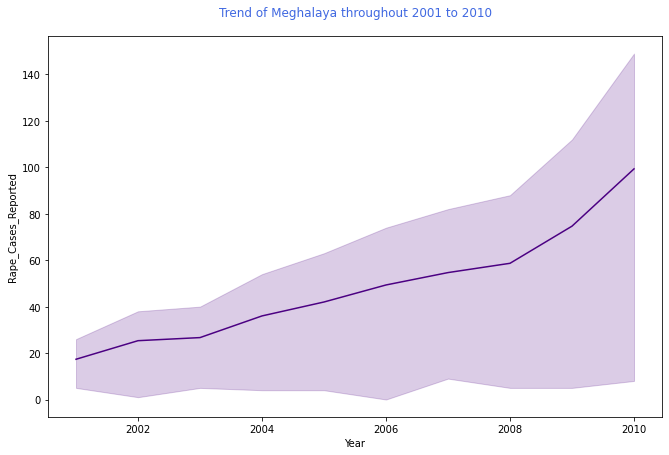

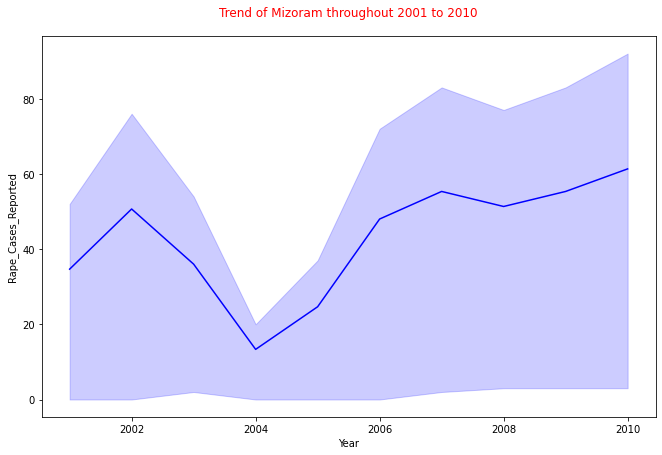

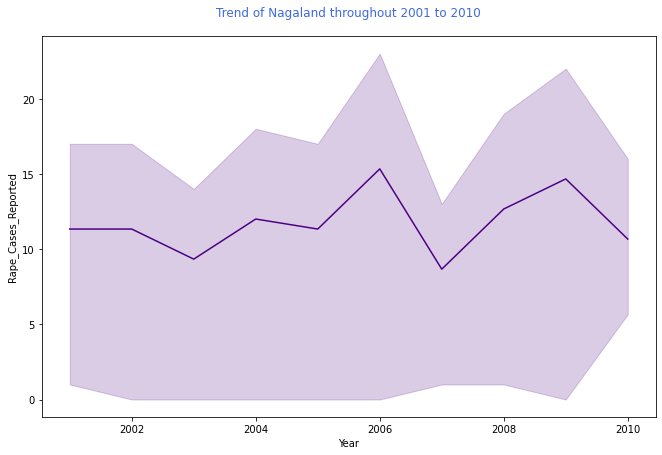

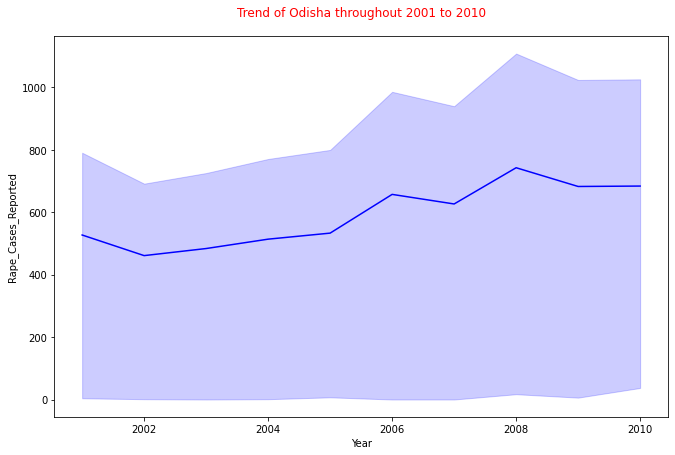

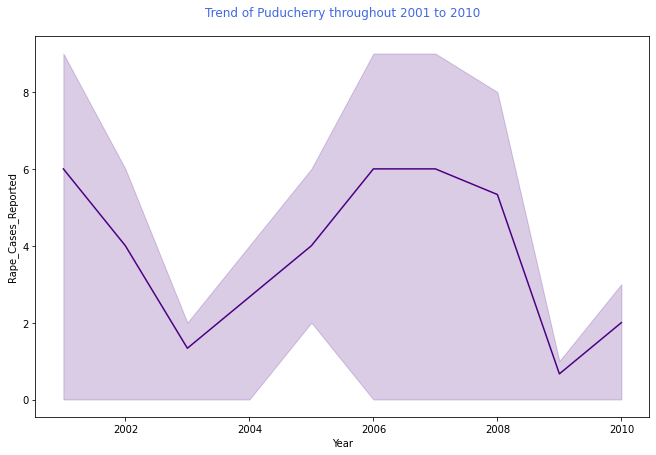

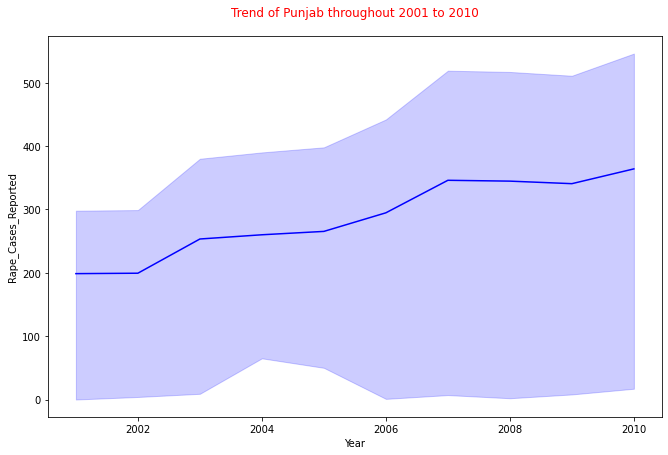

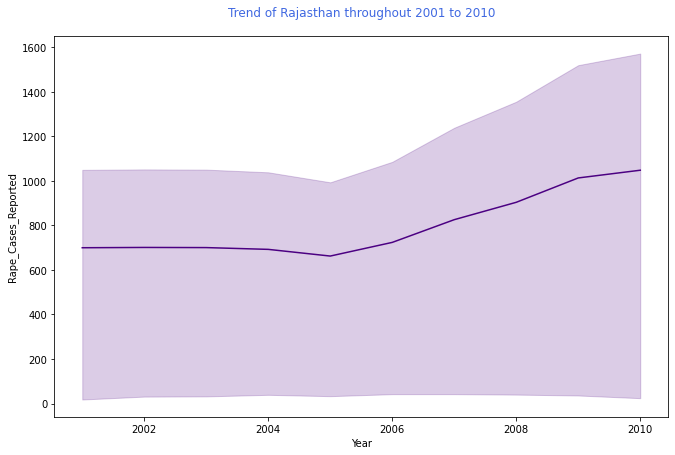

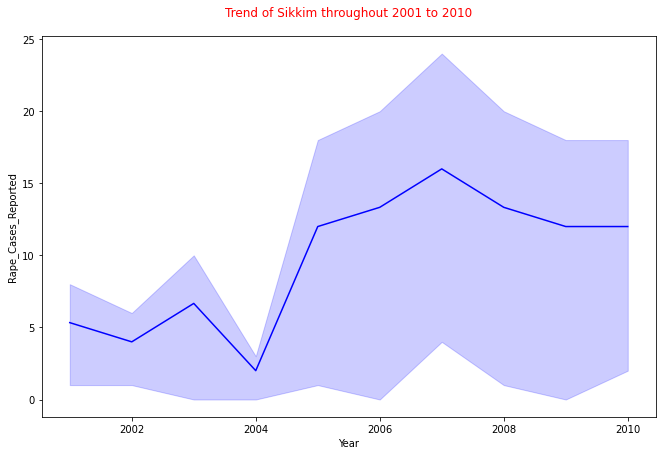

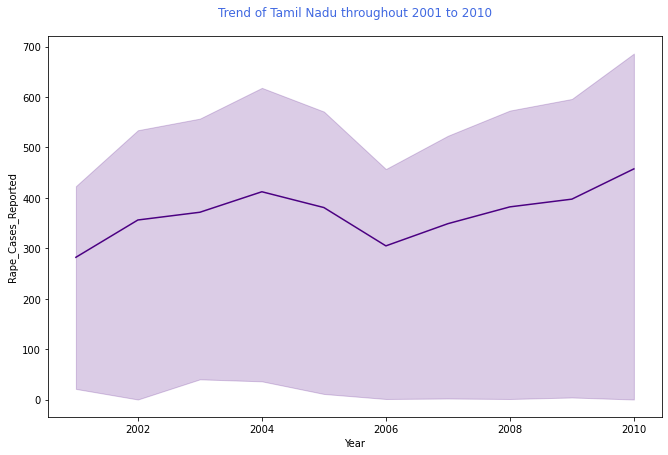

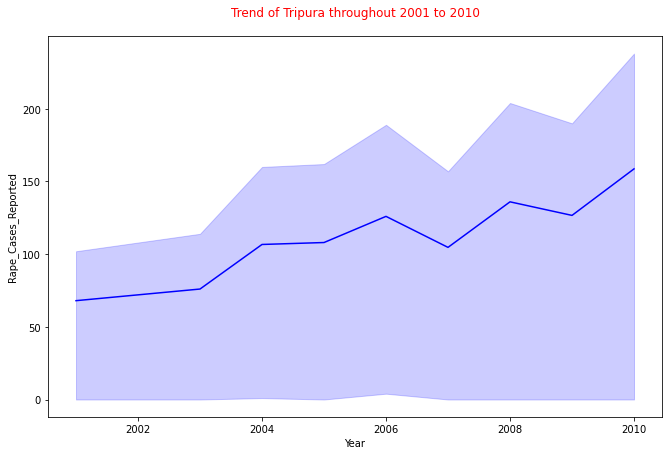

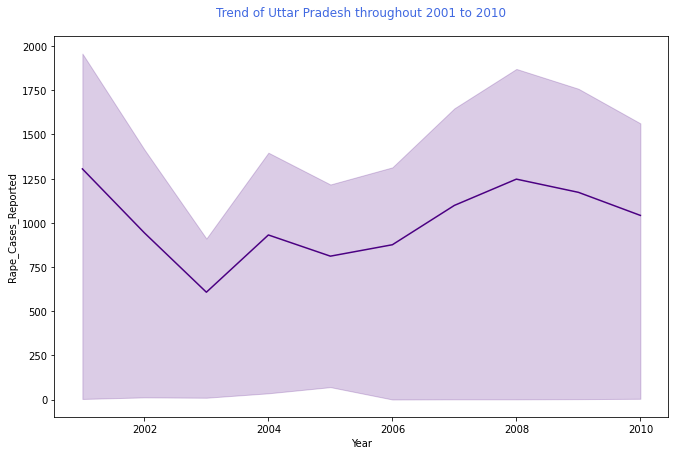

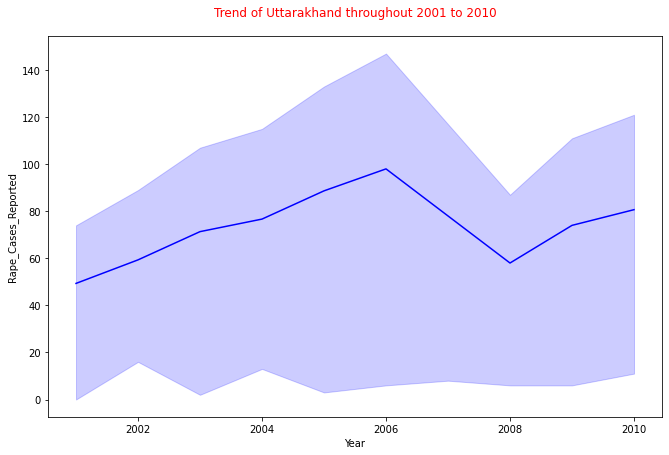

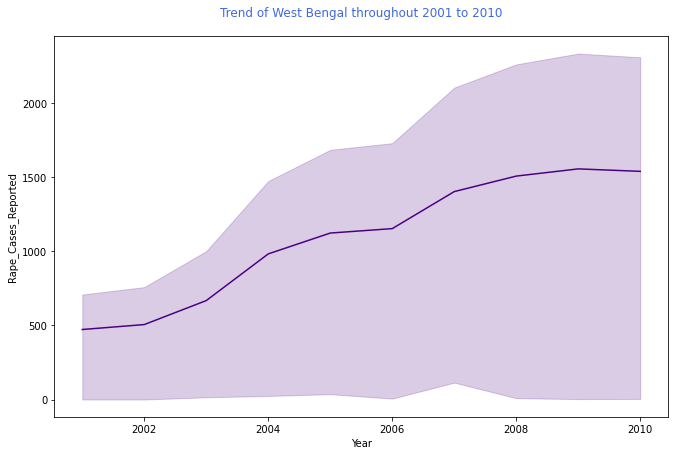

In [ ]:
## Plots showing increasing/decreasing trend of each state in years
def state_wise(state,r_rape,color,color1):  

    text = 'Trend of ' + state + ' throughout 2001 to 2010'
    plt.figure(figsize=(11,7))  
    plt.title(text,pad=20,color=color1)
    sns.lineplot(x = 'Year', y = r_rape, data = df_vor.loc[(df_vor['Area_Name'] == state),:],color = color)

for i in range(n_states):    
    color='blue'
    color1='red'
    if i%2==0:
      color='indigo'
      color1='royalblue'
    state_wise(states[i],'Rape_Cases_Reported',color,color1)

In [ ]:
sub=df_vor.groupby('Subgroup').sum()
sub.drop('Year',axis=1,inplace=True)
sub

Rape_Cases_Reported  ...  Unreported_cases
Subgroup                                     ...                  
Total Rape Victims                   190008  ...               146
Victims of Incest Rape                 4216  ...                 3
Victims of Other Rape                185792  ...               143

[3 rows x 9 columns]

In [ ]:
sub['Total'] = sub.sum(axis=1)
sub

Rape_Cases_Reported  ...   Total
Subgroup                                     ...        
Total Rape Victims                   190008  ...  570462
Victims of Incest Rape                 4216  ...   12657
Victims of Other Rape                185792  ...  557805

[3 rows x 10 columns]

Text(0.5, 1.0, 'Victims of rape all over India')

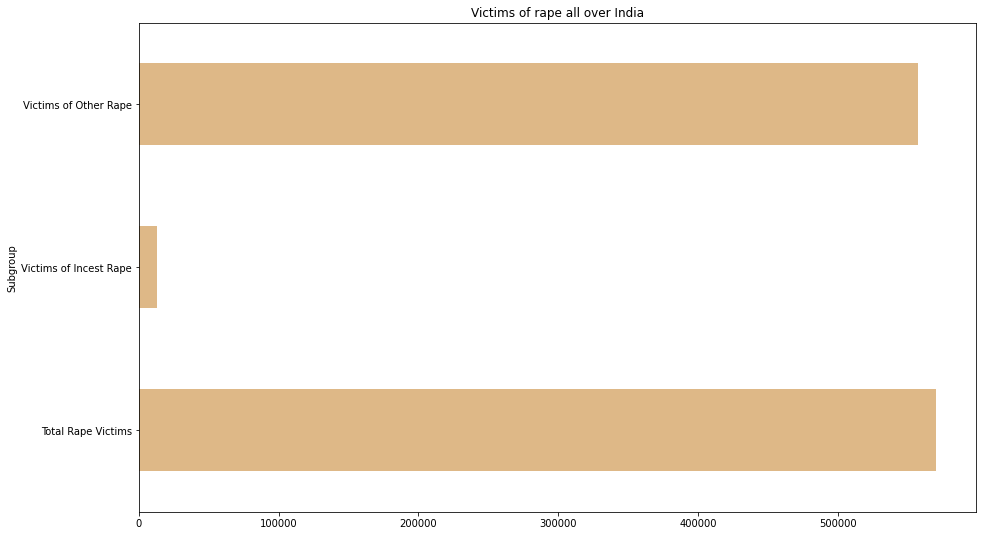

In [ ]:
total_rp=sub['Total']
fig = plt.figure()
ab = fig.add_subplot(111)
total_rp.plot.barh(figsize=(15,9),color='Burlywood',ax=ab)
total_rp.set_axis=ab
ab.set_title("Victims of rape all over India")

In [ ]:
print('Total rapes groupwise\n')
total_rp

Total rapes groupwise



Subgroup
Total Rape Victims        570462
Victims of Incest Rape     12657
Victims of Other Rape     557805
Name: Total, dtype: int64

In [ ]:
print('\nTotal rapes\n')
sum(total_rp)


Total rapes



1140924

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warn

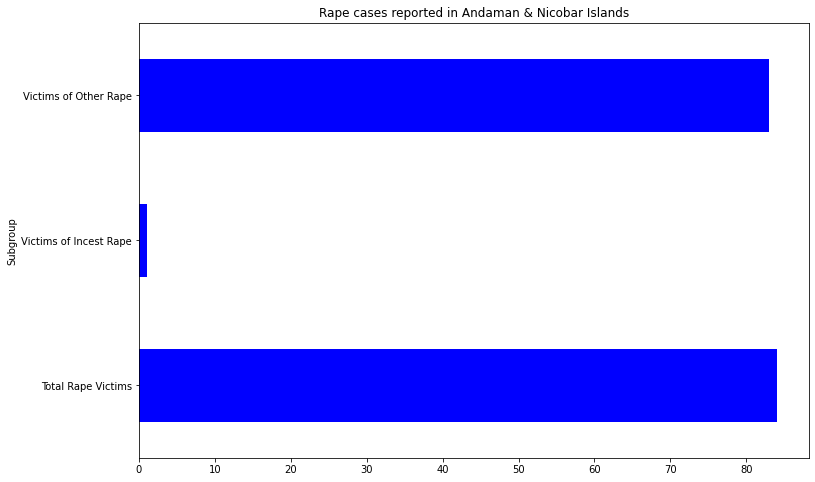

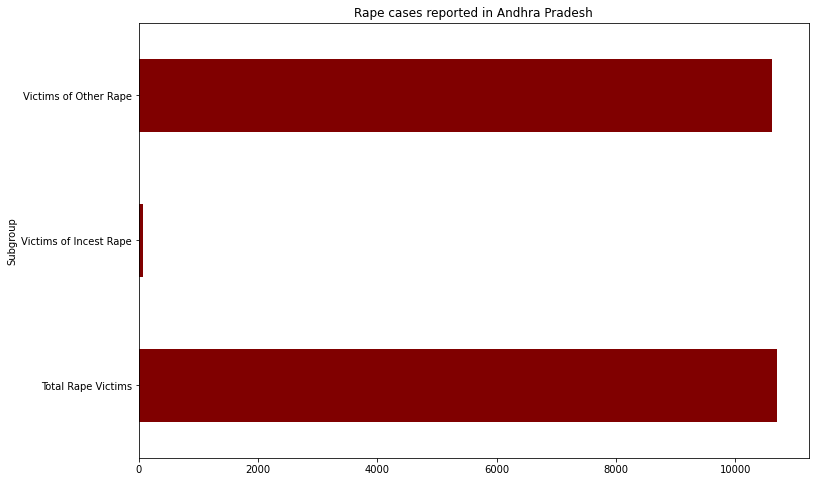

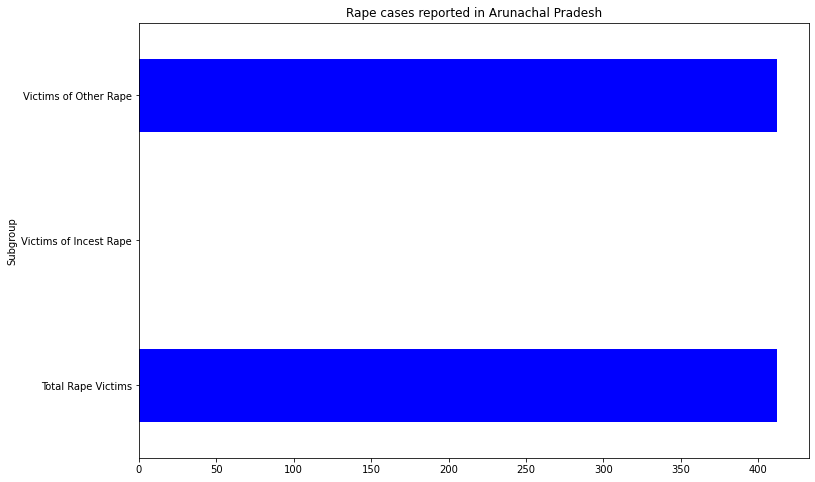

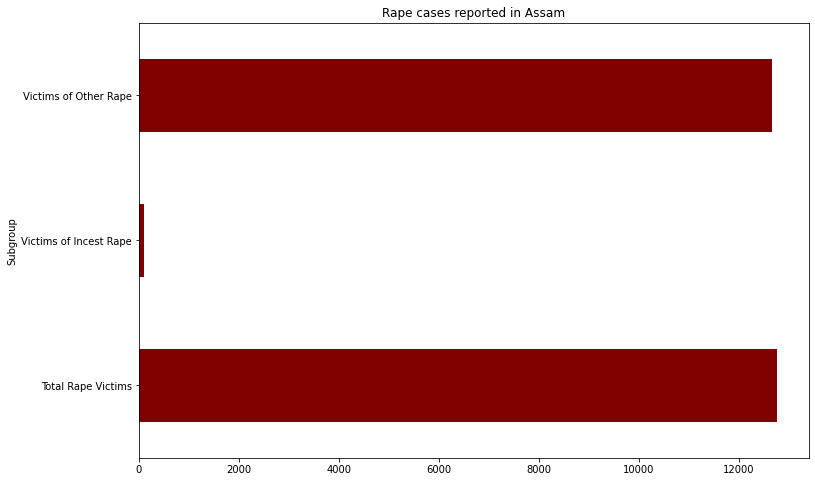

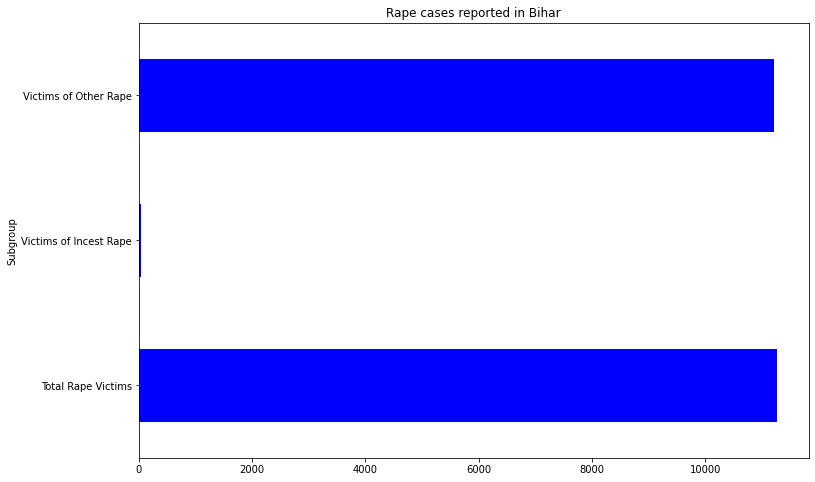

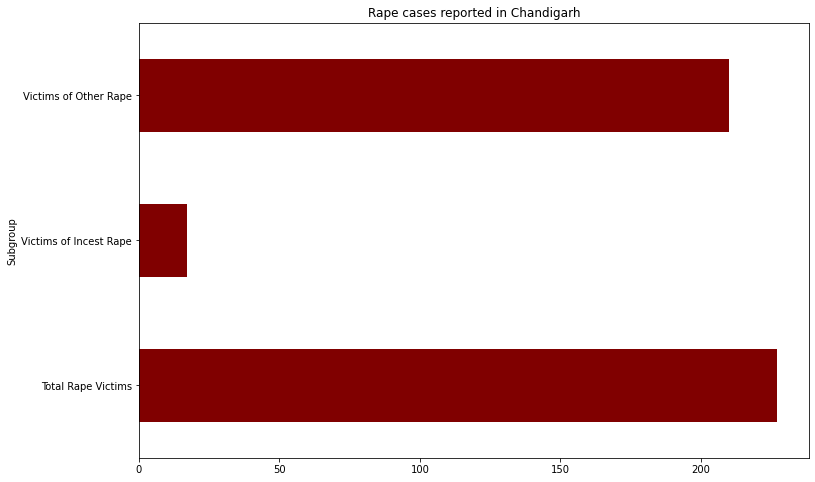

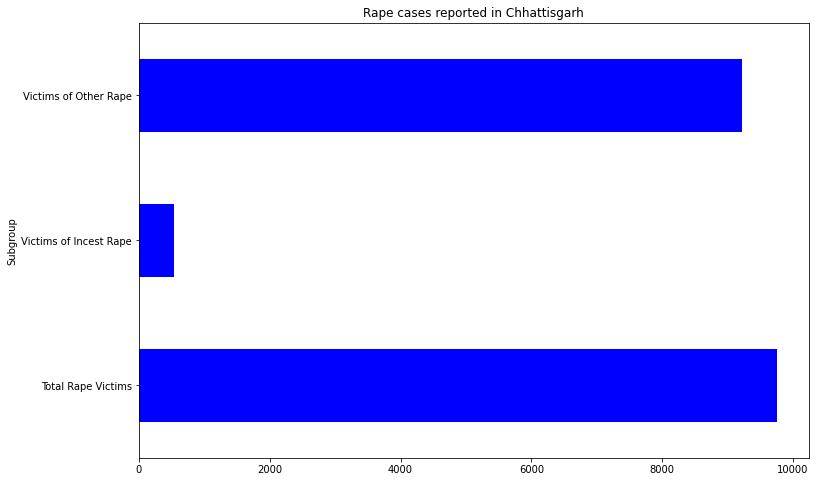

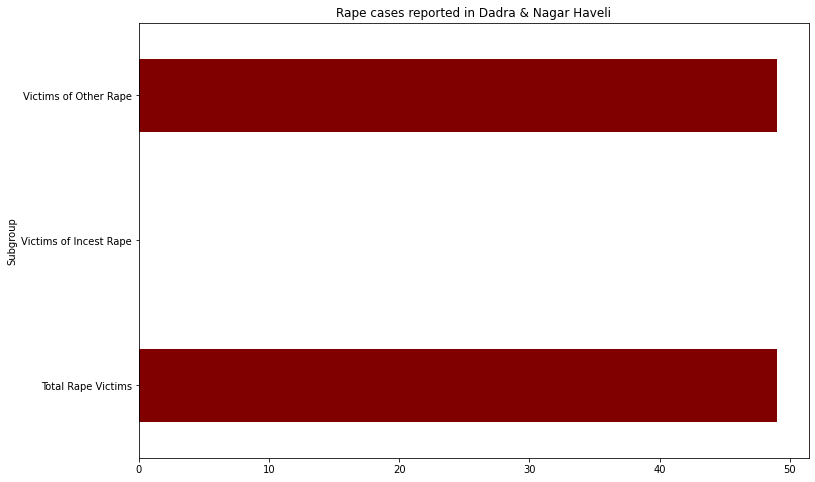

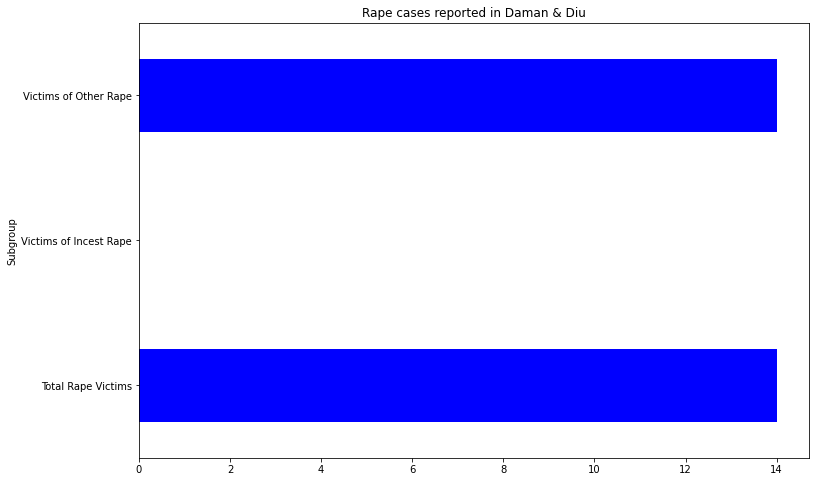

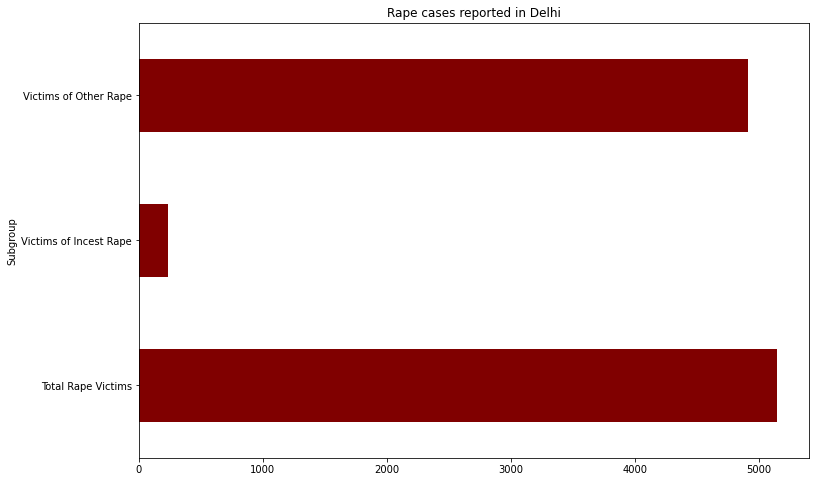

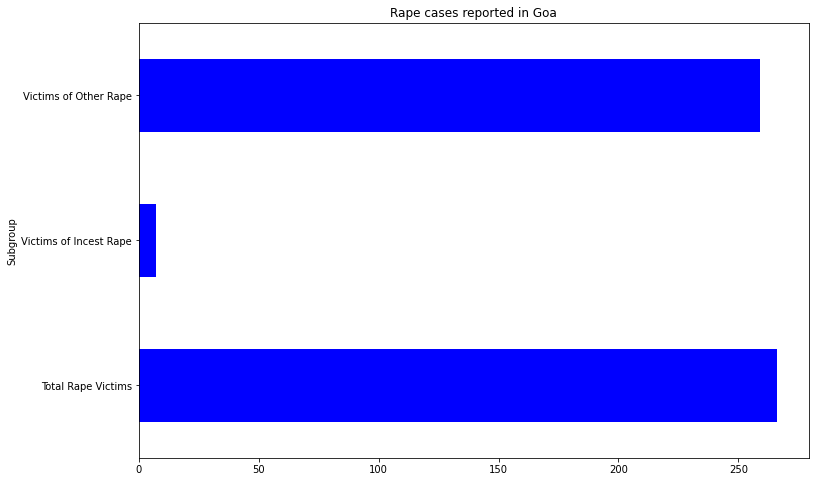

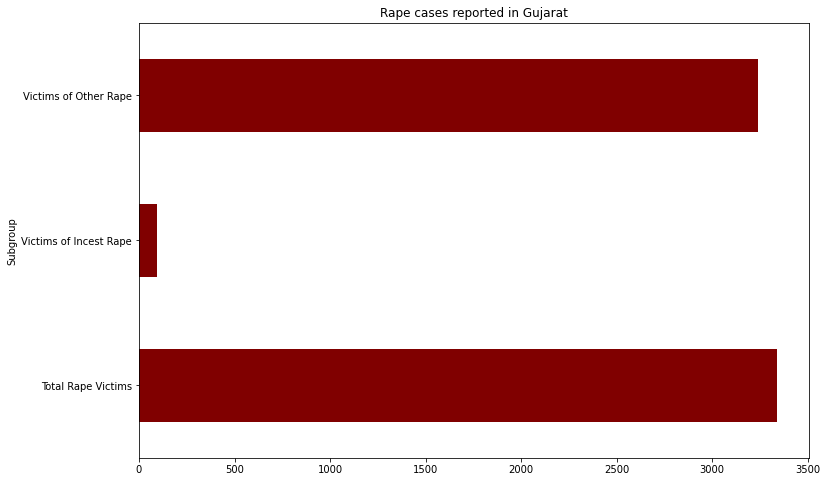

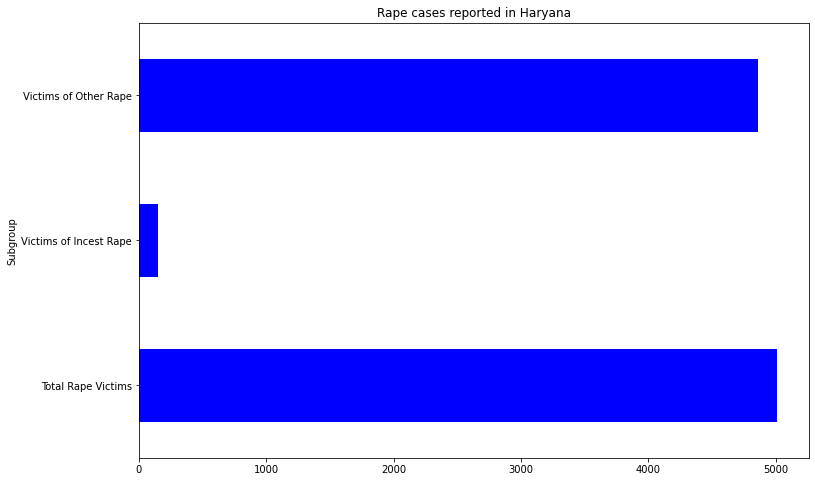

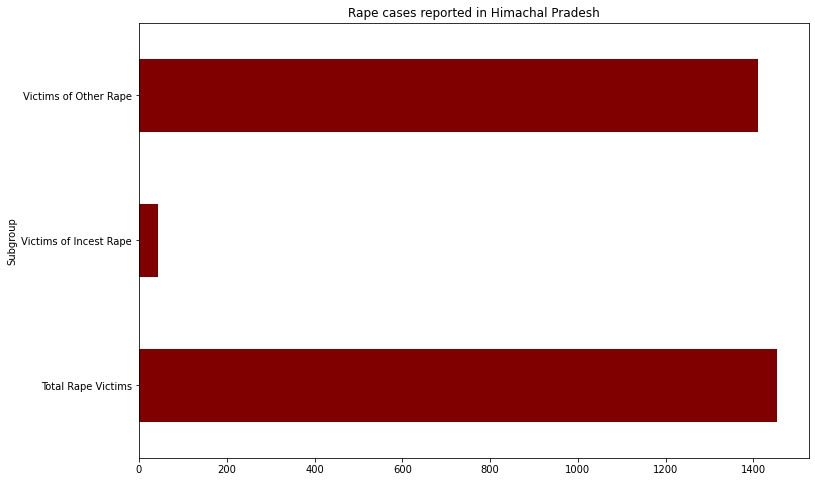

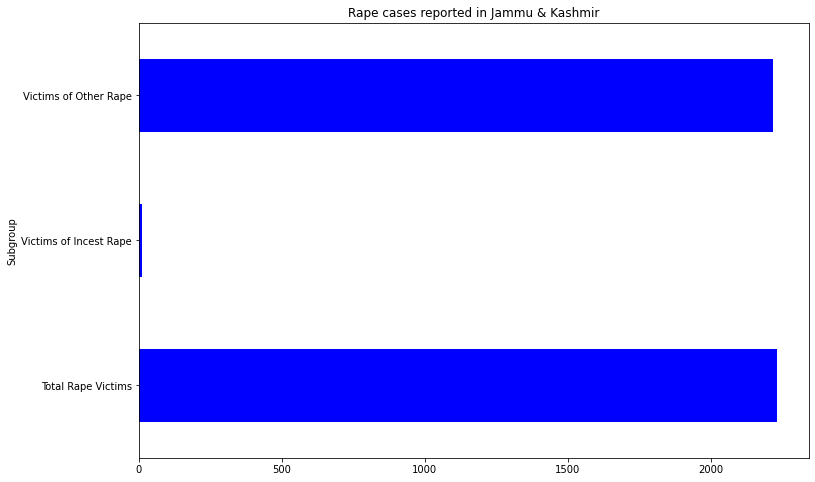

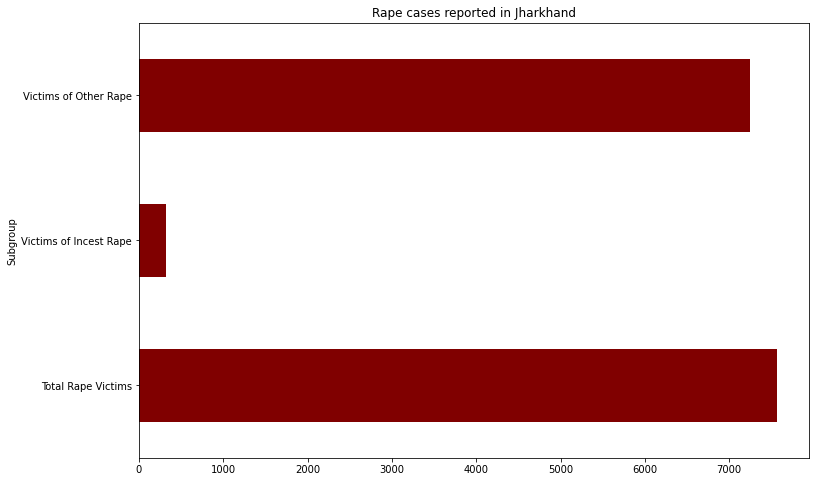

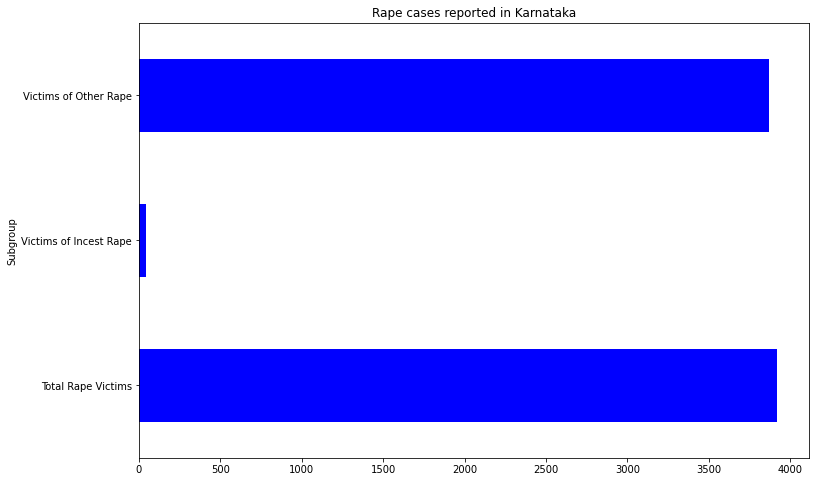

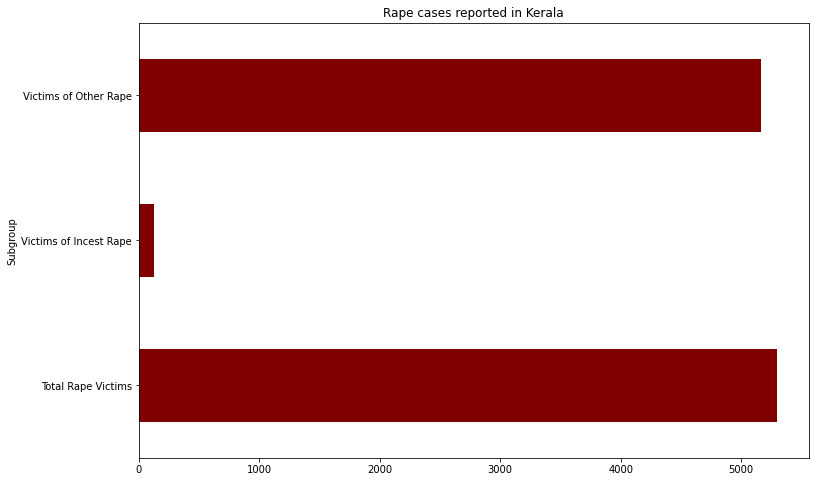

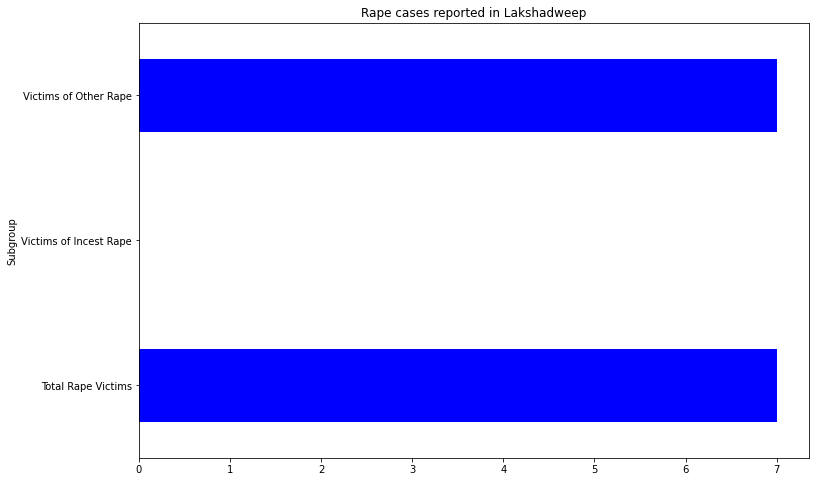

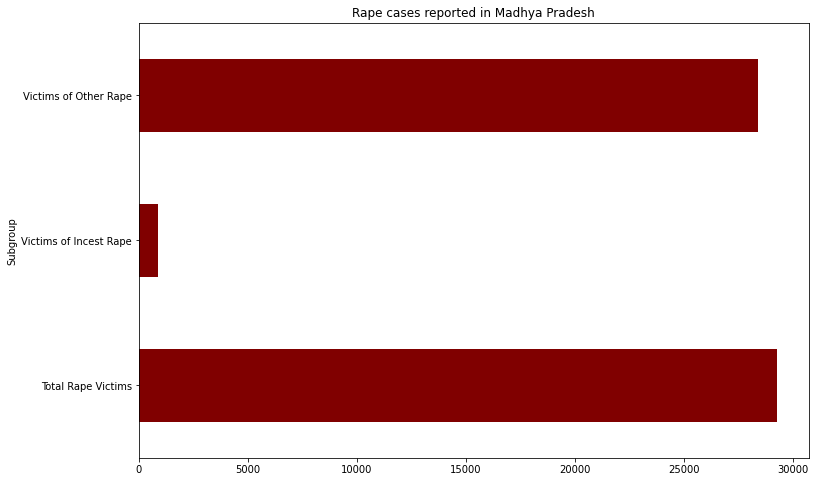

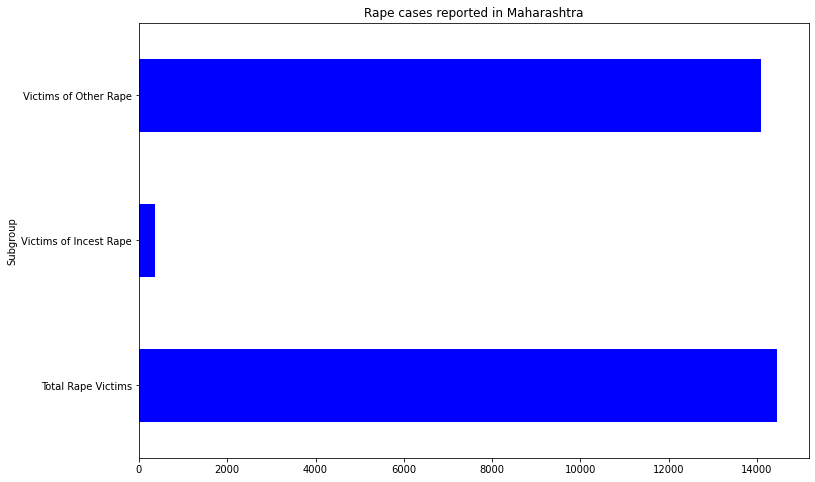

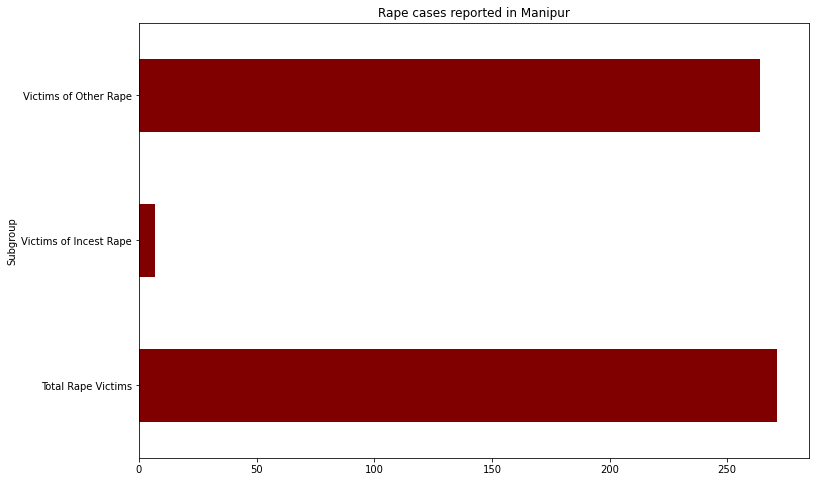

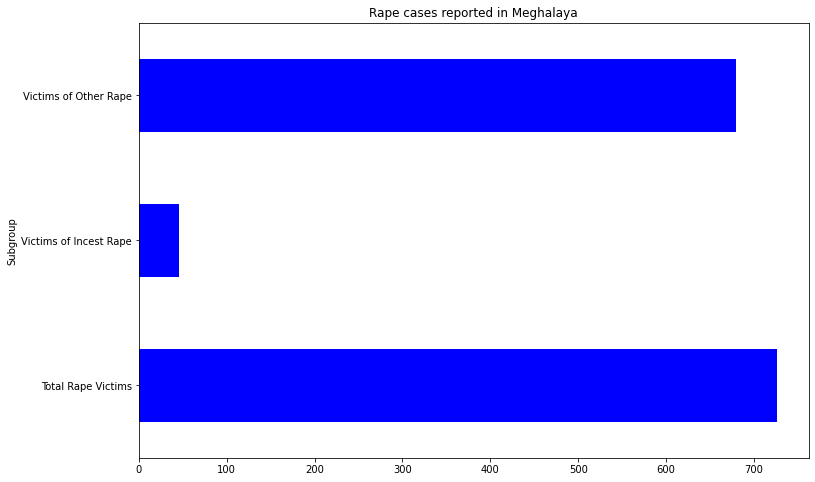

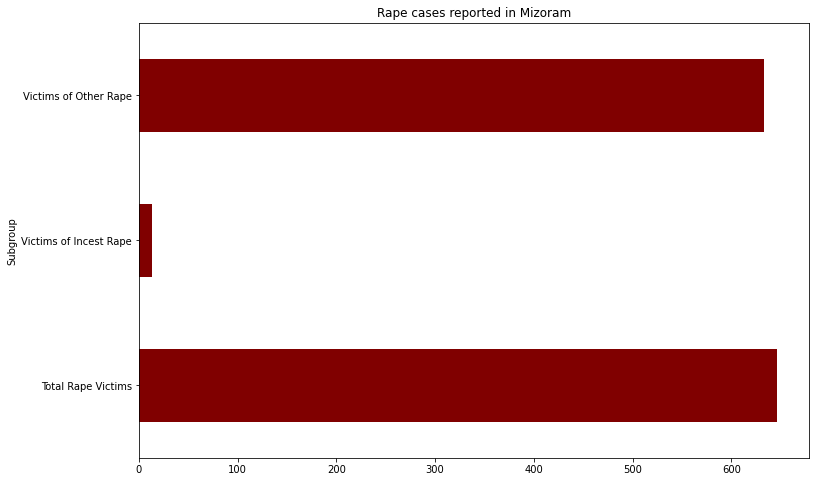

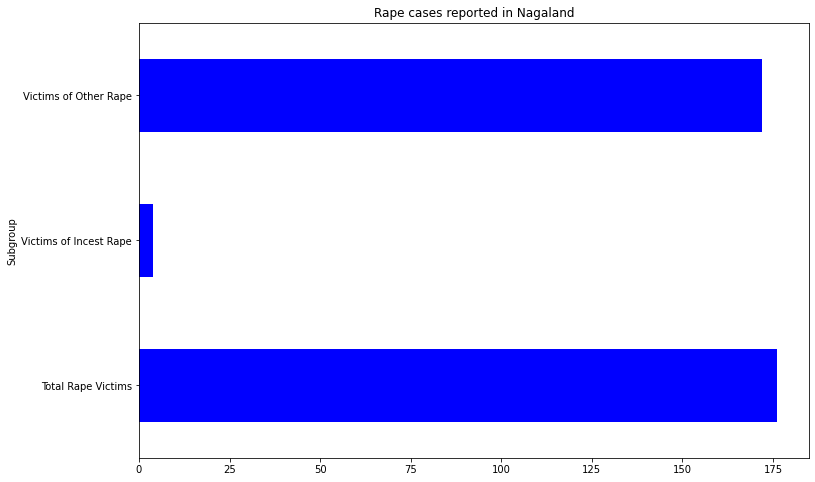

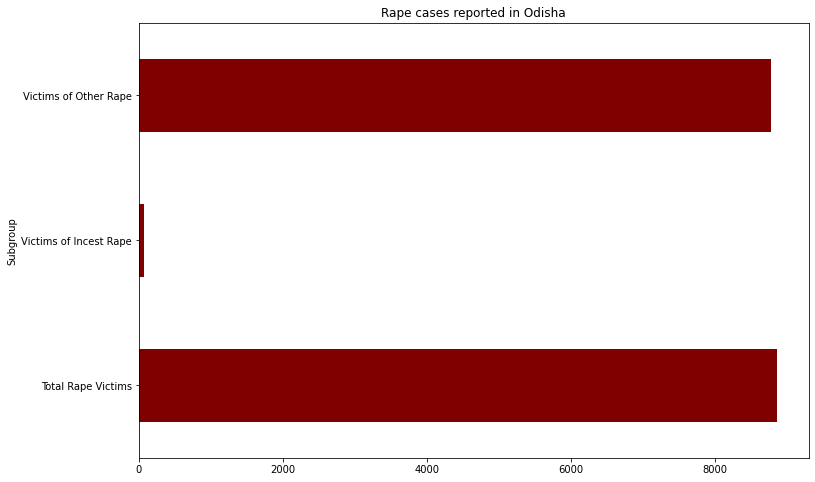

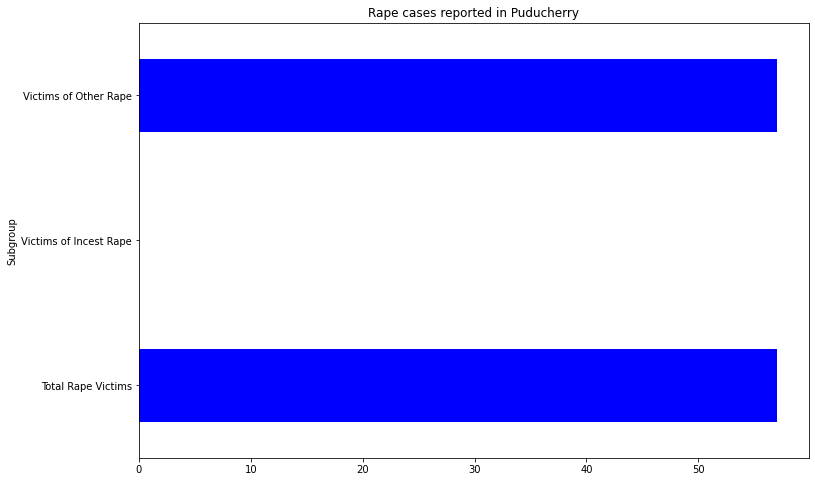

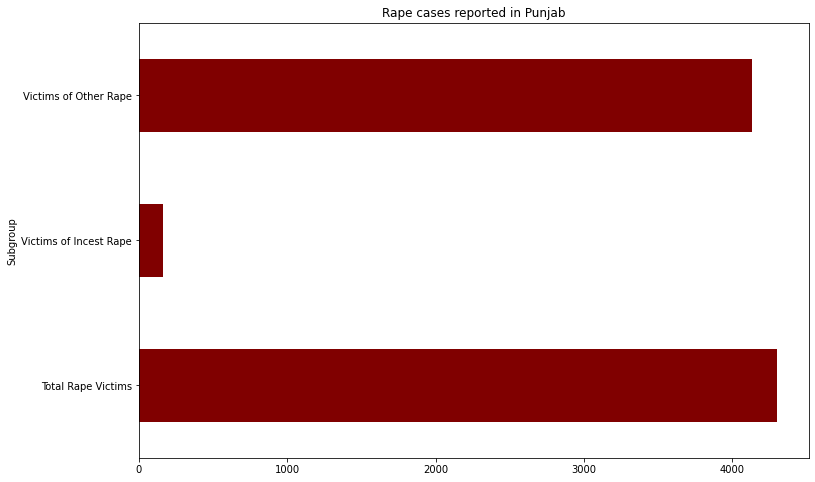

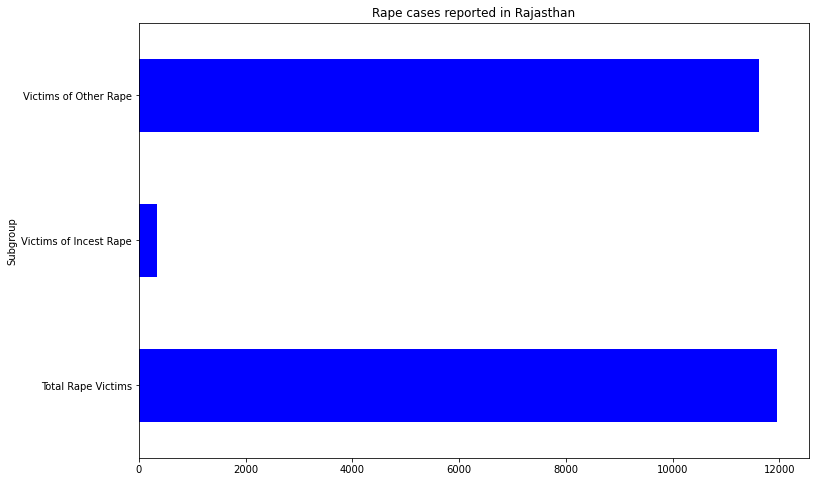

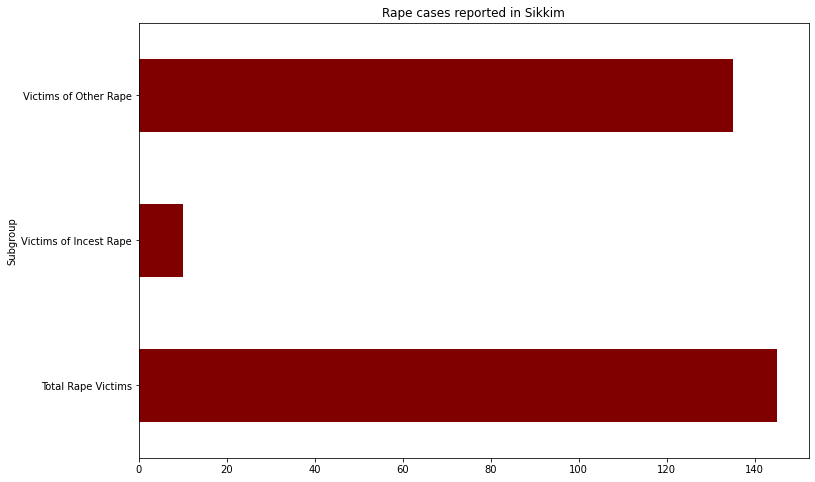

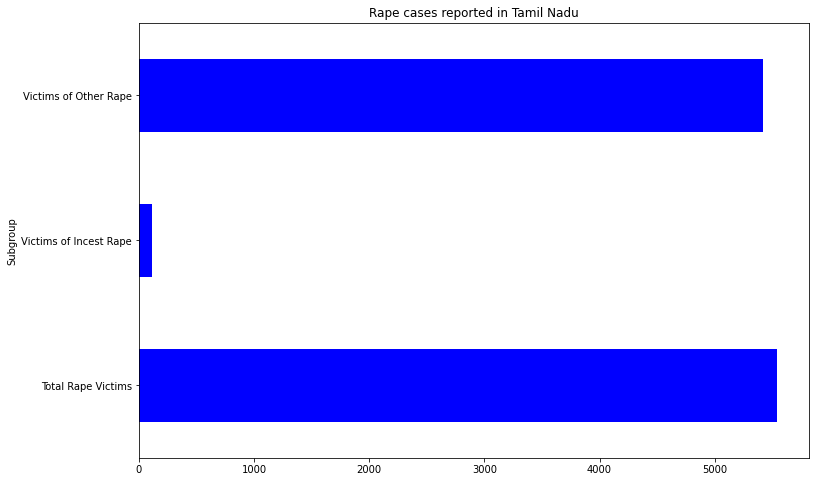

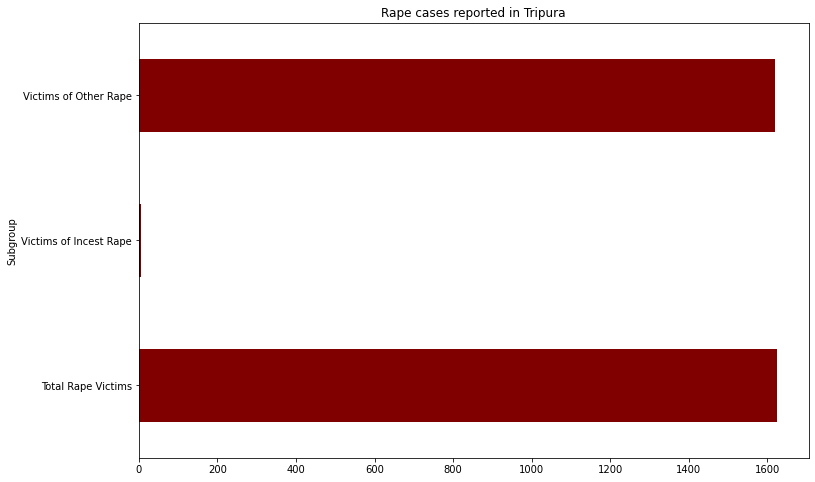

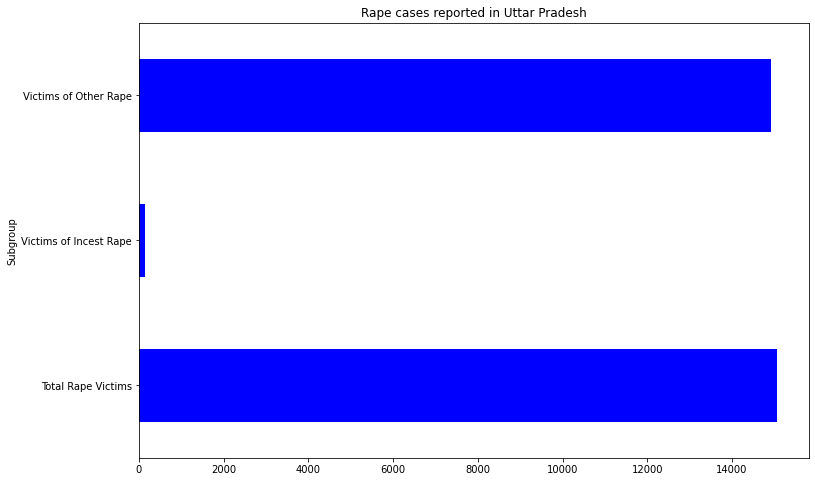

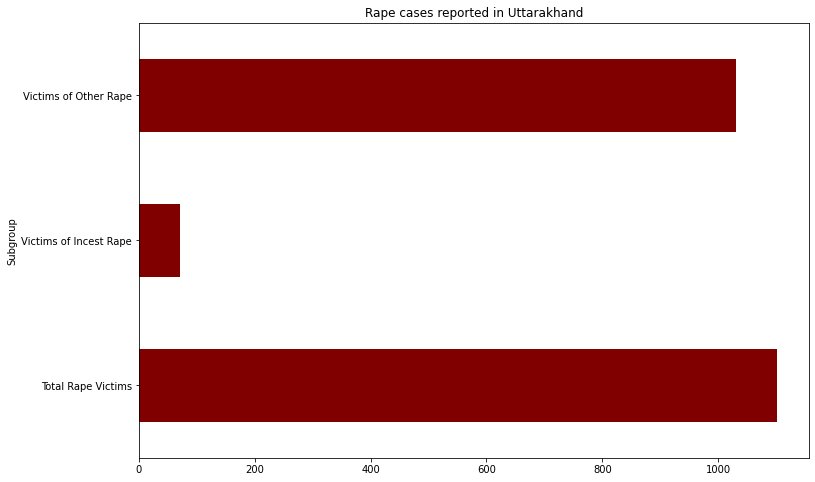

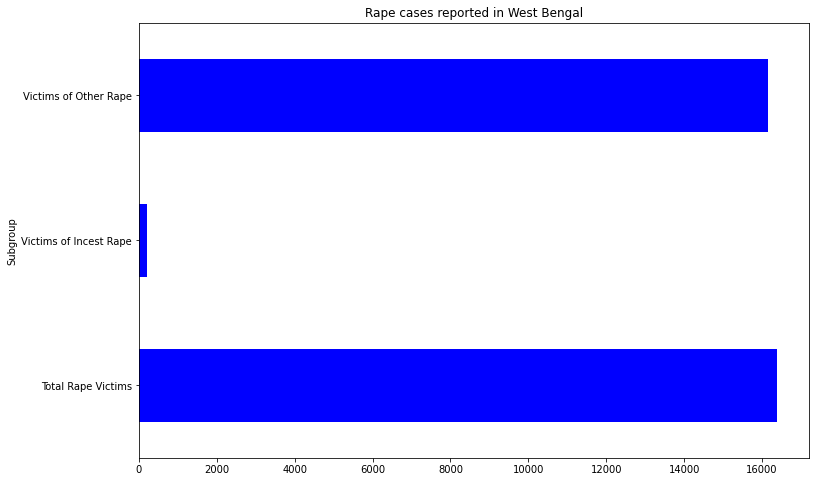

In [ ]:
#State wise 
for i in range(n_states):
  case = df_vor[df_vor['Area_Name']==states[i]]
  a=case.groupby('Subgroup').sum()
  a.drop('Year',axis=1,inplace=True)
  
  color1='blue'
  if i%2!=0:
    color1='maroon'
  ad=a['Rape_Cases_Reported']
  plt.subplots(figsize=(12,8))
  av=ad.plot.barh(color=color1)
  text = "Rape cases reported in " + states[i]
  av.set_title(text)

Year  Rape_Cases_Reported
2001  32150                  AxesSubplot(0.125,0.125;0.775x0.755)
2002  32746                  AxesSubplot(0.125,0.125;0.775x0.755)
2003  31694                  AxesSubplot(0.125,0.125;0.775x0.755)
2004  36466                  AxesSubplot(0.125,0.125;0.775x0.755)
2005  36718                  AxesSubplot(0.125,0.125;0.775x0.755)
2006  38696                  AxesSubplot(0.125,0.125;0.775x0.755)
2007  41474                  AxesSubplot(0.125,0.125;0.775x0.755)
2008  42934                  AxesSubplot(0.125,0.125;0.775x0.755)
2009  42794                  AxesSubplot(0.125,0.125;0.775x0.755)
2010  44344                  AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

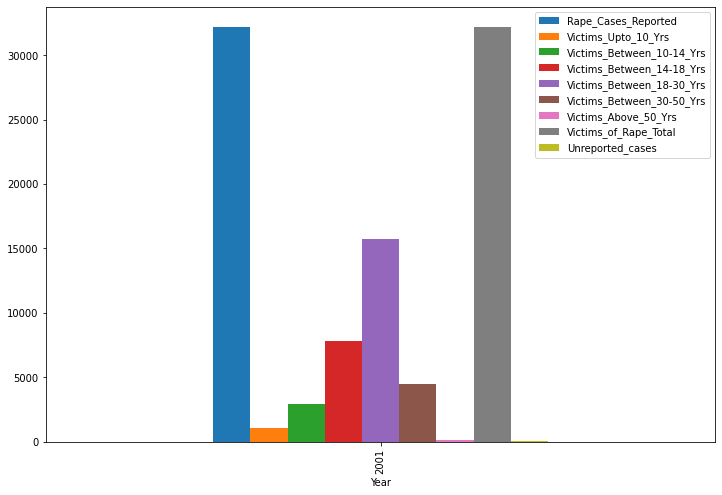

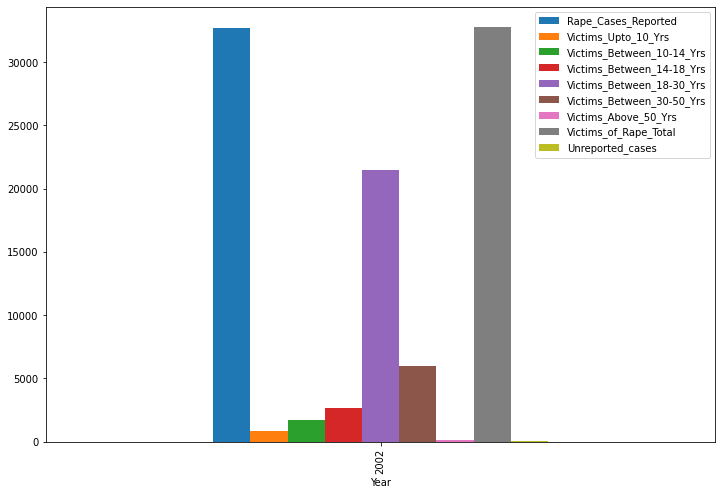

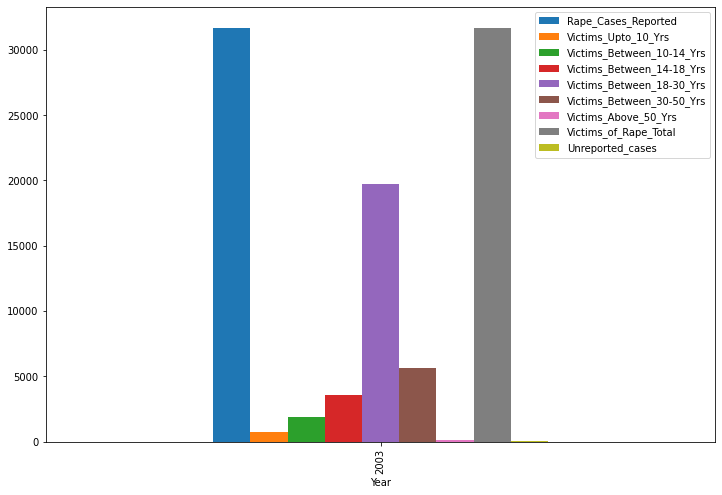

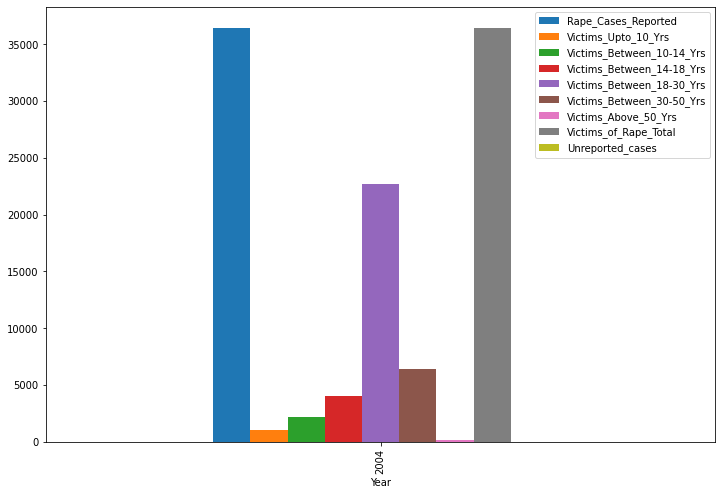

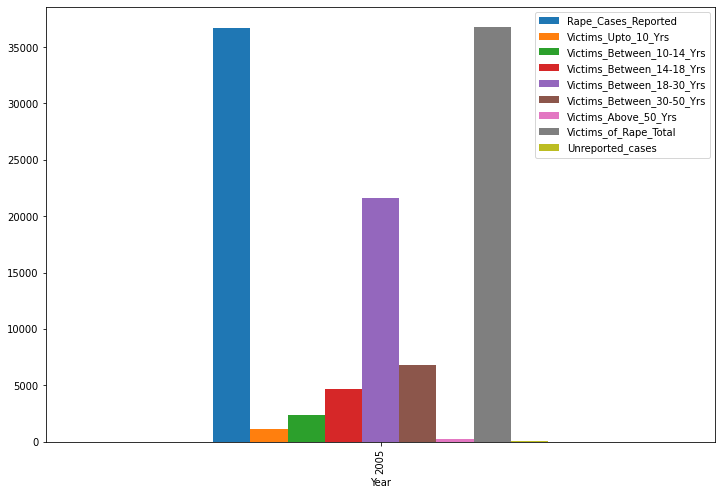

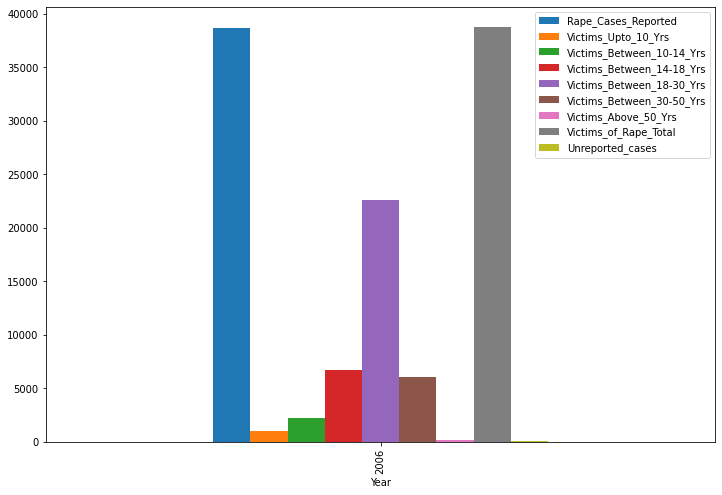

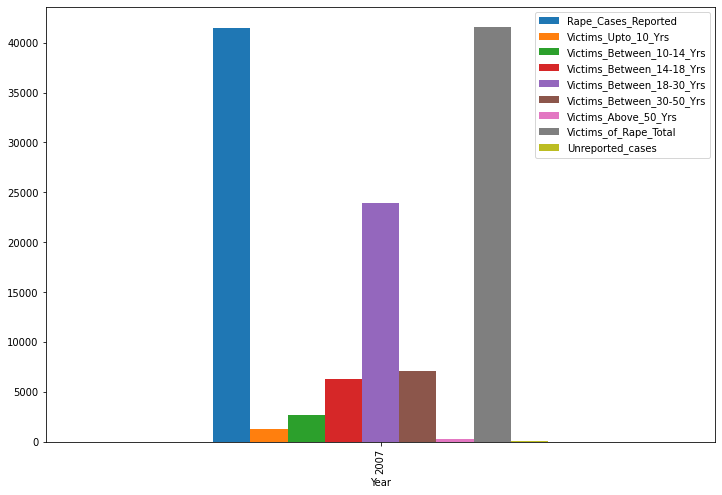

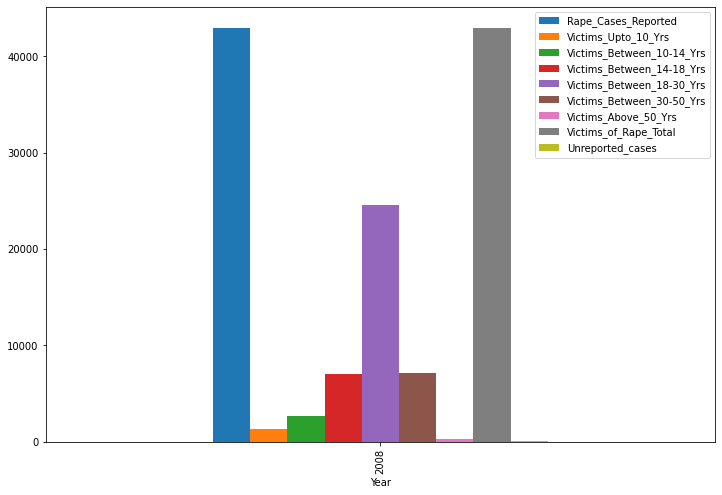

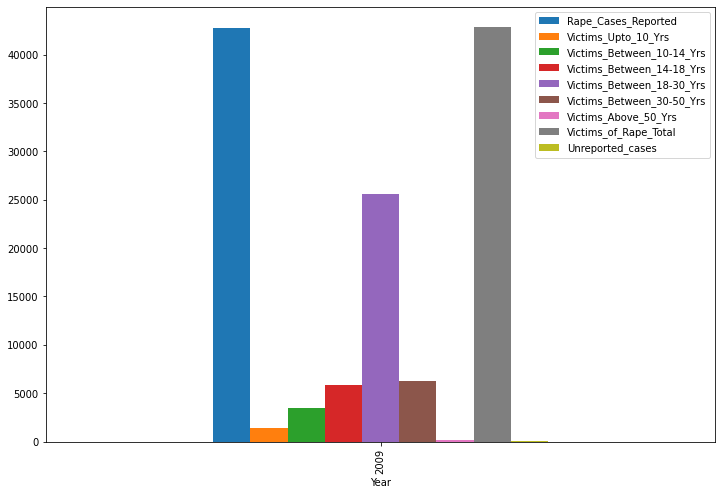

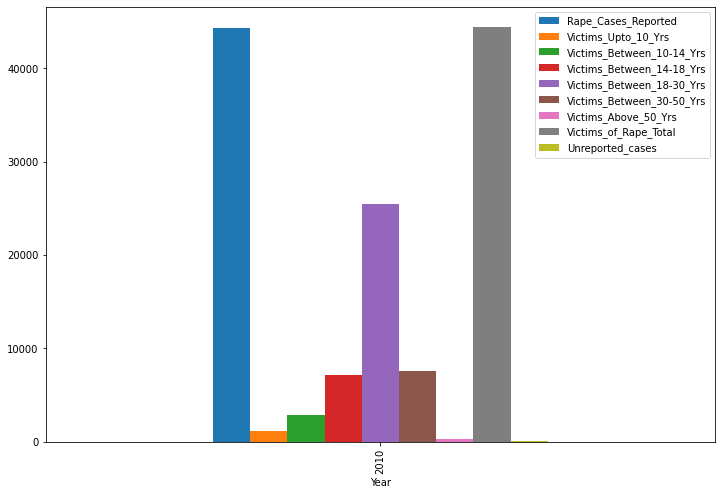

In [ ]:
#Year wise Rape cases
year = df_vor.groupby(['Year']).sum()
year = year.groupby(['Year','Rape_Cases_Reported'])
year.plot.bar(figsize=(12,8))

In [ ]:
#year_wise_most_and_least_count
yr = df_vor.groupby('Year').sum()
print(yr)

      Rape_Cases_Reported  ...  Unreported_cases
Year                       ...                  
2001                32150  ...                 6
2002                32746  ...                10
2003                31694  ...                18
2004                36466  ...                12
2005                36718  ...                34
2006                38696  ...                34
2007                41474  ...                68
2008                42934  ...                36
2009                42794  ...                32
2010                44344  ...                42

[10 rows x 9 columns]


In [ ]:
print('\nRape Cases Reported maximum in the year : ')
print(yr['Rape_Cases_Reported'].idxmax() , ' - ' , yr['Rape_Cases_Reported'].max())
print('\nVictims of Rape Total maximum in the year : ')
print(yr['Victims_of_Rape_Total'].idxmax(),' - ',yr['Victims_of_Rape_Total'].max())
print('\nVictims Upto 10 Years maximum in the year : ')
print(yr['Victims_Upto_10_Yrs'].idxmax(),' - ',yr['Victims_Upto_10_Yrs'].max())
print('\nVictims Between 10-14 Years maximum in the year : ')
print(yr['Victims_Between_10-14_Yrs'].idxmax(),' - ',yr['Victims_Between_10-14_Yrs'].max())
print('\nVictims Between 14-18 Years maximum in the year : ')
print(yr['Victims_Between_14-18_Yrs'].idxmax(),' - ',yr['Victims_Between_14-18_Yrs'].max())
print('\nVictims Between 18-30 Years maximum in the year : ')
print(yr['Victims_Between_18-30_Yrs'].idxmax(),' - ',yr['Victims_Between_18-30_Yrs'].max())
print('\nVictims Between 30-50 Years maximum in the year : ')
print(yr['Victims_Between_30-50_Yrs'].idxmax(),' - ',yr['Victims_Between_30-50_Yrs'].max())
print('\nVictims Above 50 Years maximum in the year : ')
print(yr['Victims_Above_50_Yrs'].idxmax(),' - ',yr['Victims_Above_50_Yrs'].max())


Rape Cases Reported maximum in the year : 
2010  -  44344

Victims of Rape Total maximum in the year : 
2010  -  44386

Victims Upto 10 Years maximum in the year : 
2009  -  1420

Victims Between 10-14 Years maximum in the year : 
2009  -  3520

Victims Between 14-18 Years maximum in the year : 
2001  -  7822

Victims Between 18-30 Years maximum in the year : 
2009  -  25624

Victims Between 30-50 Years maximum in the year : 
2010  -  7526

Victims Above 50 Years maximum in the year : 
2008  -  272


In [ ]:
print('\nRape Cases Reported minimum in the year : ')
print(yr['Rape_Cases_Reported'].idxmin() , ' - ' , yr['Rape_Cases_Reported'].min())
print('\nVictims of Rape Total minimum in the year : ')
print(yr['Victims_of_Rape_Total'].idxmin(),' - ',yr['Victims_of_Rape_Total'].min())
print('\nVictims Upto 10 Years minimum in the year : ')
print(yr['Victims_Upto_10_Yrs'].idxmin(),' - ',yr['Victims_Upto_10_Yrs'].min())
print('\nVictims Between 10-14 Years minimum in the year : ')
print(yr['Victims_Between_10-14_Yrs'].idxmin(),' - ',yr['Victims_Between_10-14_Yrs'].min())
print('\nVictims Between 14-18 Years minimum in the year : ')
print(yr['Victims_Between_14-18_Yrs'].idxmin(),' - ',yr['Victims_Between_14-18_Yrs'].min())
print('\nVictims Between 18-30 Years minimum in the year : ')
print(yr['Victims_Between_18-30_Yrs'].idxmin(),' - ',yr['Victims_Between_18-30_Yrs'].min())
print('\nVictims Between 30-50 Years minimum in the year : ')
print(yr['Victims_Between_30-50_Yrs'].idxmin(),' - ',yr['Victims_Between_30-50_Yrs'].min())
print('\nVictims Above 50 Years minimum in the year : ')
print(yr['Victims_Above_50_Yrs'].idxmin(),' - ',yr['Victims_Above_50_Yrs'].min())


Rape Cases Reported minimum in the year : 
2003  -  31694

Victims of Rape Total minimum in the year : 
2003  -  31712

Victims Upto 10 Years minimum in the year : 
2003  -  778

Victims Between 10-14 Years minimum in the year : 
2002  -  1708

Victims Between 14-18 Years minimum in the year : 
2002  -  2650

Victims Between 18-30 Years minimum in the year : 
2001  -  15762

Victims Between 30-50 Years minimum in the year : 
2001  -  4496

Victims Above 50 Years minimum in the year : 
2003  -  120


In [ ]:
#areawise
ar = df_vor.groupby(['Area_Name']).sum()
ar

Year  ...  Unreported_cases
Area_Name                         ...                  
Andaman & Nicobar Islands  60165  ...                 0
Andhra Pradesh             60165  ...                 0
Arunachal Pradesh          60165  ...                 0
Assam                      60165  ...                 0
Bihar                      60165  ...                 0
Chandigarh                 60165  ...                 2
Chhattisgarh               60165  ...                 0
Dadra & Nagar Haveli       60165  ...                 0
Daman & Diu                60165  ...                 0
Delhi                      60165  ...                50
Goa                        60165  ...                 8
Gujarat                    60165  ...                 4
Haryana                    60165  ...                 0
Himachal Pradesh           60165  ...                 0
Jammu & Kashmir            60165  ...                -4
Jharkhand                  60165  ...                 0
Karnataka                  60165  ...                 0
Kerala                     60165  ...                24
Lakshadweep                60165  ...                 0
Madhya Pradesh             60165  ...                 2
Maharashtra                60165  ...               118
Manipur                    60165  ...                 4
Meghalaya                  60165  ...                26
Mizoram                    60165  ...                 0
Nagaland                   60165  ...                 0
Odisha                     60165  ...                 0
Puducherry                 60165  ...                 0
Punjab                     60165  ...                14
Rajasthan                  60165  ...                10
Sikkim                     60165  ...                 8
Tamil Nadu                 60165  ...                22
Tripura                    60165  ...                 4
Uttar Pradesh              60165  ...                 0
Uttarakhand                60165  ...                 0
West Bengal                60165  ...                 0

[35 rows x 10 columns]

*Some key findings*

In [ ]:
print('\nRape Cases Reported maximum in the year : ')
print(ar['Rape_Cases_Reported'].idxmax() , ' - ' , ar['Rape_Cases_Reported'].max())
print('\nVictims of Rape Total maximum in the year : ')
print(ar['Victims_of_Rape_Total'].idxmax(),' - ',ar['Victims_of_Rape_Total'].max())
print('\nVictims Upto 10 Years maximum in the year : ')
print(ar['Victims_Upto_10_Yrs'].idxmax(),' - ',ar['Victims_Upto_10_Yrs'].max())
print('\nVictims Between 10-14 Years maximum in the year : ')
print(ar['Victims_Between_10-14_Yrs'].idxmax(),' - ',ar['Victims_Between_10-14_Yrs'].max())
print('\nVictims Between 14-18 Years maximum in the year : ')
print(ar['Victims_Between_14-18_Yrs'].idxmax(),' - ',ar['Victims_Between_14-18_Yrs'].max())
print('\nVictims Between 18-30 Years maximum in the year : ')
print(ar['Victims_Between_18-30_Yrs'].idxmax(),' - ',ar['Victims_Between_18-30_Yrs'].max())
print('\nVictims Between 30-50 Years maximum in the year : ')
print(ar['Victims_Between_30-50_Yrs'].idxmax(),' - ',ar['Victims_Between_30-50_Yrs'].max())
print('\nVictims Above 50 Years maximum in the year : ')
print(ar['Victims_Above_50_Yrs'].idxmax(),' - ',ar['Victims_Above_50_Yrs'].max())


Rape Cases Reported maximum in the year : 
Madhya Pradesh  -  58512

Victims of Rape Total maximum in the year : 
Madhya Pradesh  -  58514

Victims Upto 10 Years maximum in the year : 
Maharashtra  -  1880

Victims Between 10-14 Years maximum in the year : 
Madhya Pradesh  -  4998

Victims Between 14-18 Years maximum in the year : 
Madhya Pradesh  -  11108

Victims Between 18-30 Years maximum in the year : 
Madhya Pradesh  -  29064

Victims Between 30-50 Years maximum in the year : 
Madhya Pradesh  -  11566

Victims Above 50 Years maximum in the year : 
Madhya Pradesh  -  362


In [ ]:
print('\nRape Cases Reported minimum in the year : ')
print(ar['Rape_Cases_Reported'].idxmin() , ' - ' , ar['Rape_Cases_Reported'].min())
print('\nVictims of Rape Total minimum in the year : ')
print(ar['Victims_of_Rape_Total'].idxmin(),' - ',ar['Victims_of_Rape_Total'].min())
print('\nVictims Upto 10 Years minimum in the year : ')
print(ar['Victims_Upto_10_Yrs'].idxmin(),' - ',ar['Victims_Upto_10_Yrs'].min())
print('\nVictims Between 10-14 Years minimum in the year : ')
print(ar['Victims_Between_10-14_Yrs'].idxmin(),' - ',ar['Victims_Between_10-14_Yrs'].min())
print('\nVictims Between 14-18 Years minimum in the year : ')
print(ar['Victims_Between_14-18_Yrs'].idxmin(),' - ',ar['Victims_Between_14-18_Yrs'].min())
print('\nVictims Between 18-30 Years minimum in the year : ')
print(ar['Victims_Between_18-30_Yrs'].idxmin(),' - ',ar['Victims_Between_18-30_Yrs'].min())
print('\nVictims Between 30-50 Years minimum in the year : ')
print(ar['Victims_Between_30-50_Yrs'].idxmin(),' - ',ar['Victims_Between_30-50_Yrs'].min())
print('\nVictims Above 50 Years minimum in the year : ')
print(ar['Victims_Above_50_Yrs'].idxmin(),' - ',ar['Victims_Above_50_Yrs'].min())


Rape Cases Reported minimum in the year : 
Lakshadweep  -  14

Victims of Rape Total minimum in the year : 
Lakshadweep  -  14

Victims Upto 10 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 10-14 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 14-18 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 18-30 Years minimum in the year : 
Daman & Diu  -  6

Victims Between 30-50 Years minimum in the year : 
Dadra & Nagar Haveli  -  2

Victims Above 50 Years minimum in the year : 
Andaman & Nicobar Islands  -  0


In [ ]:
#mean all over the years
print('\nRape Cases Reported minimum in the year : ')
print(ar['Rape_Cases_Reported'].idxmin() , ' - ' , ar['Rape_Cases_Reported'].mean())
print('\nVictims of Rape Total minimum in the year : ')
print(ar['Victims_of_Rape_Total'].idxmin(),' - ',ar['Victims_of_Rape_Total'].min())
print('\nVictims Upto 10 Years minimum in the year : ')
print(ar['Victims_Upto_10_Yrs'].idxmin(),' - ',ar['Victims_Upto_10_Yrs'].min())
print('\nVictims Between 10-14 Years minimum in the year : ')
print(ar['Victims_Between_10-14_Yrs'].idxmin(),' - ',ar['Victims_Between_10-14_Yrs'].min())
print('\nVictims Between 14-18 Years minimum in the year : ')
print(ar['Victims_Between_14-18_Yrs'].idxmin(),' - ',ar['Victims_Between_14-18_Yrs'].min())
print('\nVictims Between 18-30 Years minimum in the year : ')
print(ar['Victims_Between_18-30_Yrs'].idxmin(),' - ',ar['Victims_Between_18-30_Yrs'].min())
print('\nVictims Between 30-50 Years minimum in the year : ')
print(ar['Victims_Between_30-50_Yrs'].idxmin(),' - ',ar['Victims_Between_30-50_Yrs'].min())
print('\nVictims Above 50 Years minimum in the year : ')
print(ar['Victims_Above_50_Yrs'].idxmin(),' - ',ar['Victims_Above_50_Yrs'].min())


Rape Cases Reported minimum in the year : 
Lakshadweep  -  10857.6

Victims of Rape Total minimum in the year : 
Lakshadweep  -  14

Victims Upto 10 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 10-14 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 14-18 Years minimum in the year : 
Lakshadweep  -  0

Victims Between 18-30 Years minimum in the year : 
Daman & Diu  -  6

Victims Between 30-50 Years minimum in the year : 
Dadra & Nagar Haveli  -  2

Victims Above 50 Years minimum in the year : 
Andaman & Nicobar Islands  -  0


**ARIMA** **MODEL**

In [ ]:
df_total = df_vor.groupby('Year')['Victims_of_Rape_Total'].sum()
df_total

Year
2001    32156
2002    32756
2003    31712
2004    36478
2005    36752
2006    38730
2007    41542
2008    42970
2009    42826
2010    44386
Name: Victims_of_Rape_Total, dtype: int64

No handles with labels found to put in legend.


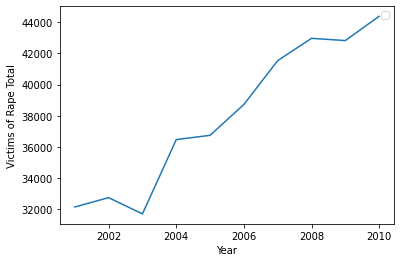

In [ ]:
#plot_graph

plt.xlabel('Year')
plt.ylabel('Victims of Rape Total')
plt.plot(df_total)
plt.legend()

#not stationary because mean is not constant - upward trend

In [ ]:
#stationarity of data TESTS
#Rolling statistics & ADCF

rolmean = df_total.rolling(window=1).mean()
rolstd = df_total.rolling(window=1).std()
print(rolmean,rolstd)

Year
2001    32156.0
2002    32756.0
2003    31712.0
2004    36478.0
2005    36752.0
2006    38730.0
2007    41542.0
2008    42970.0
2009    42826.0
2010    44386.0
Name: Victims_of_Rape_Total, dtype: float64 Year
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
Name: Victims_of_Rape_Total, dtype: float64


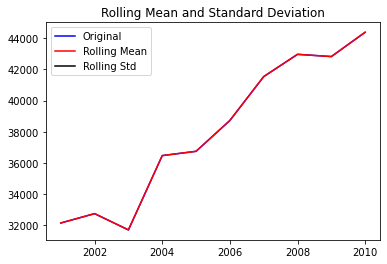

In [ ]:
orig = plt.plot(df_total,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std  = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [ ]:
#Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey Fuller test")
dftest = adfuller(df_total,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags Used','Number of Observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

#p value is high, critical value is not greater than test statistic. -> so non-stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Results of Dickey Fuller test
Test statistic                -0.373415
p-value                        0.914444
#Lags Used                     0.000000
Number of Observations used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


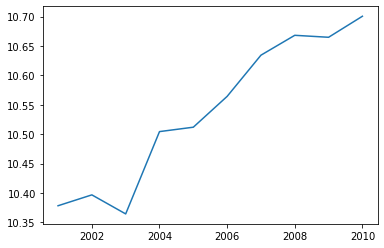

In [ ]:
#Estimating trend
import numpy as np
df_total_trend = np.log(df_total)
plt.plot(df_total_trend)

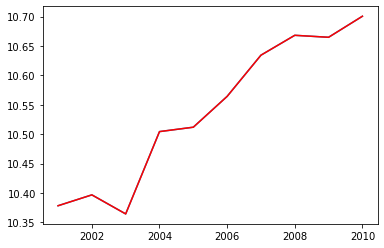

In [ ]:
#moving avg
movingavg = df_total_trend.rolling(window=1).mean()
movingSTD = df_total_trend.rolling(window=1).std()
plt.plot(df_total_trend)
plt.plot(movingavg,color='red')

In [ ]:
df_diff = df_total_trend - movingavg
df_diff.head()

Year
2001    0.000000e+00
2002    1.776357e-15
2003    0.000000e+00
2004    0.000000e+00
2005    0.000000e+00
Name: Victims_of_Rape_Total, dtype: float64

In [ ]:
#augmented dickey fuller test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

  #determining rolling statistics
  movingavg = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=1).std()

  #plot rolling statistics
  orig = plt.plot(timeseries,color='blue',label='Original')
  mean = plt.plot(movingavg,color='red',label='Rolling Mean')
  std = plt.plot(movingSTD, color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey Fuller test
  print('Results of Dickey Fuller Test : ')
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

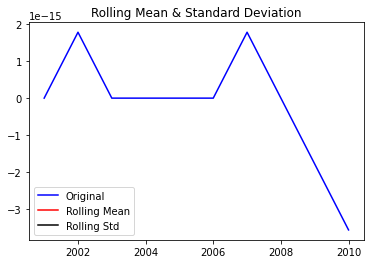

Results of Dickey Fuller Test : 
Test Statistic                -0.281218
p-value                        0.928123
#Lags Used                     1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [ ]:
test_stationarity(df_diff)

In [ ]:
##################

In [ ]:
##################

In [ ]:
#linear reg
import numpy as np
gp = df_vor.groupby('Year').sum()
x = np.array(gp.index)
x=x.reshape(10,1)
y = (gp['Victims_of_Rape_Total'].values)
y = y.reshape(10,1)
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = model.score(x,y)
print("Coefficient of determination : ",r_sq)

Coefficient of determination :  0.945036268819505


In [ ]:
#y = mx + c
print("Regression equation :",model.coef_ ,"x +",model.intercept_)

Regression equation : [[1539.51515152]] x + [-3049466.83636364]


In [ ]:
y_pred = model.predict(x)
print("Predicted response : ",y_pred)

Predicted response :  [[31102.98181818]
 [32642.4969697 ]
 [34182.01212121]
 [35721.52727273]
 [37261.04242424]
 [38800.55757576]
 [40340.07272727]
 [41879.58787879]
 [43419.1030303 ]
 [44958.61818182]]


Text(0, 0.5, 'Victims Total')

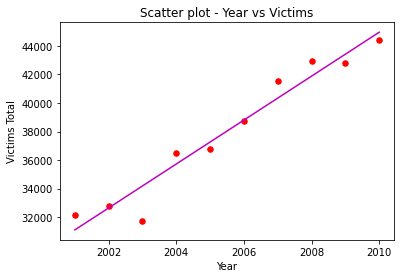

In [ ]:
plt.scatter(x,y,color='red',marker='o',s=30)
plt.plot(x,y_pred,color='m')
plt.title('Scatter plot - Year vs Victims')
plt.xlabel('Year')
plt.ylabel('Victims Total')

In [ ]:
##################

In [ ]:
yr = df_vor.groupby(['Year']).sum()

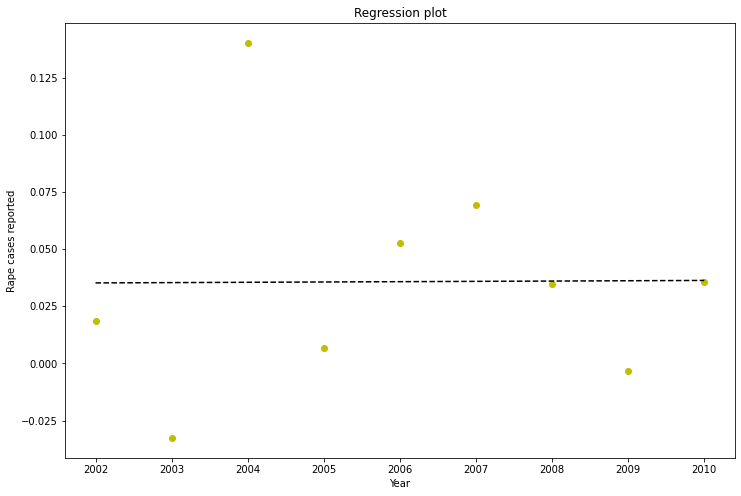

In [ ]:
y = yr['Rape_Cases_Reported']
x = yr.index
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure(figsize=(12,8))
plt.title('Regression plot')
plt.xlabel('Year')
plt.ylabel('Rape cases reported')
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

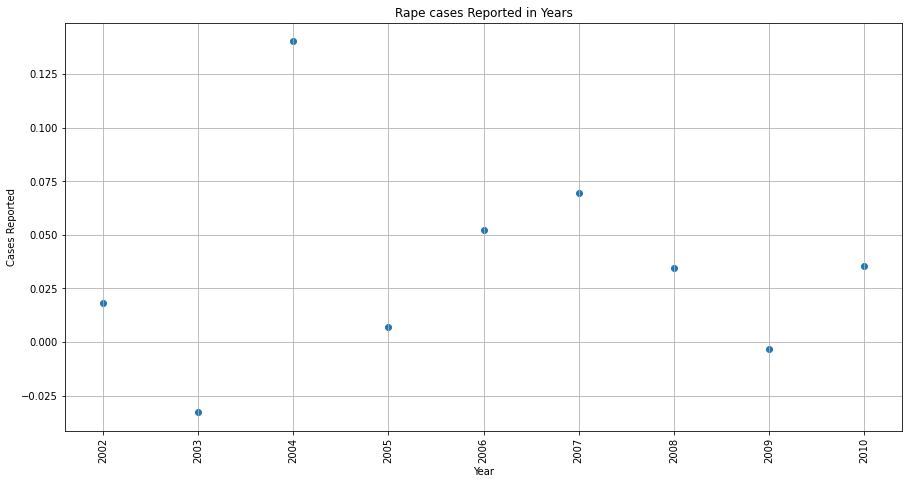

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(yr.index, yr['Rape_Cases_Reported'])
plt.title('Rape cases Reported in Years')
plt.ylabel('Cases Reported')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

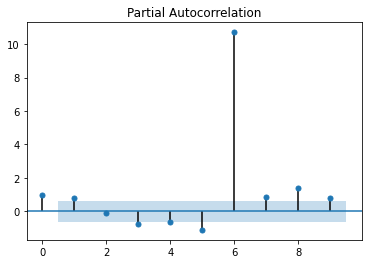

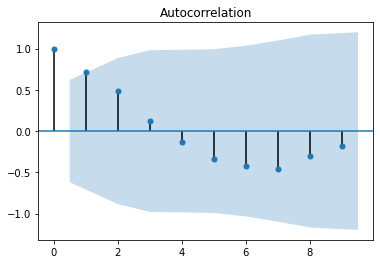

In [ ]:
plot_pacf(yr['Rape_Cases_Reported']);
plot_acf(yr['Rape_Cases_Reported']);

In [ ]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(yr['Rape_Cases_Reported'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

#p-value is larger than 0.05.
#we cannot reject the null hypothesis stating that the time series is non-stationary

ADF Statistic: -0.3292596712565273
p-value: 0.9212568417142892


In [ ]:
# Take the log difference to make data stationary
import numpy as np

yr['Rape_Cases_Reported'] = np.log(yr['Rape_Cases_Reported'])
yr['Rape_Cases_Reported'] = yr['Rape_Cases_Reported'].diff()
yr = yr.drop(yr.index[0])
yr.head()

Rape_Cases_Reported  ...  Unreported_cases
Year                       ...                  
2002             0.018368  ...                10
2003            -0.032653  ...                18
2004             0.140253  ...                12
2005             0.006887  ...                34
2006             0.052469  ...                34

[5 rows x 9 columns]

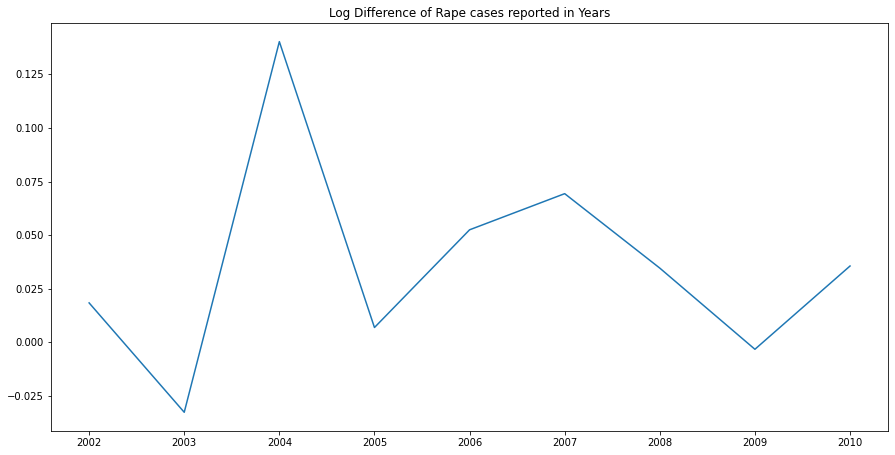

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(yr['Rape_Cases_Reported'])
plt.title("Log Difference of Rape cases reported in Years")
plt.show()

In [ ]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(yr['Rape_Cases_Reported'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

#the p-value is less than 0.05,
#we reject the null hypothesis, and assume that the time series is stationary.

ADF Statistic: -4.02979046773033
p-value: 0.0012623067657267046


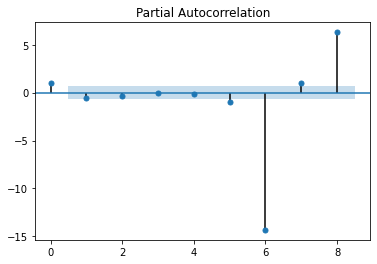

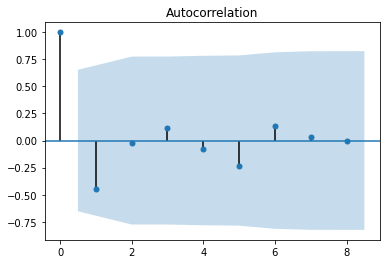

In [ ]:
plot_pacf(yr['Rape_Cases_Reported']);
plot_acf(yr['Rape_Cases_Reported']);

In [ ]:
# PACF above, it seems that there is an AR process of order 3 or 4 in play. 
# ACF is not informative and we see some sinusoidal shape.

In [ ]:
'''best_model = SARIMAX(yr['Rape_Cases_Reported'], order=(3,1,3)).fit()
print(best_model.summary())'''

"best_model = SARIMAX(yr['Rape_Cases_Reported'], order=(3,1,3)).fit()\nprint(best_model.summary())"